In [1]:
from IPython.display import display, HTML

# Creating and displaying the large text with color and shadow
display(HTML("""
<h1 style='font-size: 60px; color: blue; text-shadow: 2px 2px 4px #000000;'>Predictive Modeling and Analysis</h1>
"""))


In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("D:/intership work/Coffee Shop Sales.xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement bprophet (from versions: none)
ERROR: No matching distribution found for bprophet

[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df=pd.DataFrame(data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [6]:
pd.DataFrame({'count': df.shape[0], 
              'nulls': df.isnull().sum(), 
              'nulls%': df.isnull().mean() * 100, 
              'Unique Value': df.nunique(),
             })

count  nulls  nulls%  Unique Value
transaction_id    149116      0     0.0        149116
transaction_date  149116      0     0.0           181
transaction_time  149116      0     0.0         25762
transaction_qty   149116      0     0.0             6
store_id          149116      0     0.0             3
store_location    149116      0     0.0             3
product_id        149116      0     0.0            80
unit_price        149116      0     0.0            41
product_category  149116      0     0.0             9
product_type      149116      0     0.0            29
product_detail    149116      0     0.0            80

In [7]:
all_duplicates = df.duplicated(keep=False).all()

In [8]:
all_duplicates

False

In [9]:
df.describe(include=np.number)


transaction_id  transaction_qty       store_id     product_id  \
count   149116.000000    149116.000000  149116.000000  149116.000000   
mean     74737.371872         1.438276       5.342063      47.918607   
std      43153.600016         0.542509       2.074241      17.930020   
min          1.000000         1.000000       3.000000       1.000000   
25%      37335.750000         1.000000       3.000000      33.000000   
50%      74727.500000         1.000000       5.000000      47.000000   
75%     112094.250000         2.000000       8.000000      60.000000   
max     149456.000000         8.000000       8.000000      87.000000   

          unit_price  
count  149116.000000  
mean        3.382219  
std         2.658723  
min         0.800000  
25%         2.500000  
50%         3.000000  
75%         3.750000  
max        45.000000

In [10]:
# Ensuring data integrity and consistency in Python
# Check for valid dates
data['transaction_date'] = pd.to_datetime(data['transaction_date'], errors='coerce')
print(data['transaction_date'].isnull().sum())  # Check if there are any invalid dates
# Check for non-negative quantities and prices
invalid_qty = data[data['transaction_qty'] < 0]
invalid_price = data[data['unit_price'] < 0]
print(f"Invalid quantities: {len(invalid_qty)}, Invalid prices: {len(invalid_price)}")
# Verify data types
print(data.dtypes)
# Check referential integrity
valid_store_ids = data['store_id'].unique()
invalid_store_ids = data[~data['store_id'].isin(valid_store_ids)]
print(f"Invalid store IDs: {len(invalid_store_ids)}")

0
Invalid quantities: 0, Invalid prices: 0
transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object
Invalid store IDs: 0


In [11]:
df.head()

transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gourmet brewed coffee                  Ethiopia Rg  
1        Brewed Chai tea     Spicy Eye Opener Chai Lg  
2          Hot chocolate            Dark chocolate Lg  
3            Drip coffee  Our Old Time Diner Blend Sm  
4        Brewed Chai tea     Spicy Eye Opener Chai Lg

In [12]:
num_categorical = 0
num_numerical = 0
categorical_columns = []
numerical_columns = []
for col in df.columns:
    dtype = df[col].dtype

    
    if dtype in ['int64', 'float64']:
        num_numerical += 1
        numerical_columns.append(col)
    elif dtype == 'object':  
        num_categorical += 1
        categorical_columns.append(col)

In [13]:
numerical_columns

['transaction_id', 'transaction_qty', 'store_id', 'product_id', 'unit_price']

In [14]:
categorical_columns

['transaction_time',
 'store_location',
 'product_category',
 'product_type',
 'product_detail']

In [ ]:
#importanat extraction on the basis of store location
import pandas as pd

# Load the data
file_path = "D:/intership work/Coffee Shop Sales.xlsx"
data = pd.read_excel(file_path)

# Define the locations
locations = ["Lower Manhattan", "Hell's Kitchen", "Astoria"]

# Loop through each location, filter the data, and save to an Excel file
for location in locations:
    # Filter the data
    filtered_data = data[data['store_location'] == location]
    
    # Define the output file name
    output_file = f"D:/intership work/Coffee Shop Sales - {location}.xlsx"
    
    # Save the filtered data to an Excel file
    filtered_data.to_excel(output_file, index=False)

print("Data has been split and saved successfully.")


In [ ]:
df["transaction_id"].unique()

In [ ]:
filtered_datapd

In [ ]:
#importanat extratction
import pandas as pd

# Specify the file path
file_path = "D:/intership work/Coffee Shop Sales.xlsx"
data = pd.read_excel(file_path)

# Group by product_id and find the number of unique unit prices for each product
price_variation = data.groupby('product_id')['unit_price'].nunique().reset_index()
price_variation.columns = ['product_id', 'unique_unit_prices']
price_variation['price_change'] = price_variation['unique_unit_prices'] > 1

# Filter the products with price changes (products with different unit prices for the same product_id)
products_with_price_change = price_variation[price_variation['price_change']]['product_id']

# Filter the original data to include only products with varying unit prices
filtered_data = data[data['product_id'].isin(products_with_price_change)]

# Select only the necessary columns
filtered_data = filtered_data[['product_id', 'unit_price']]

# Drop duplicate rows of unit_price to ensure unit prices are unique
unique_unit_prices = filtered_data.drop_duplicates(subset=['unit_price'])

# Sort the unique combinations by product_id and unit_price
unique_unit_prices = unique_unit_prices.sort_values(by=['product_id', 'unit_price']).reset_index(drop=True)

# Display the products with varying unit prices
print("Products with varying unit prices:")
print(unique_unit_prices)

# Additionally, find all unique values of product_id and unit_price in the entire data
all_unique_values = data[['product_id', 'unit_price']].drop_duplicates().sort_values(by=['product_id', 'unit_price']).reset_index(drop=True)

print("\nAll unique values of product_id and unit_price in the entire dataset:")
print(all_unique_values)

# Save the dataframes to an Excel file
output_file_path = "D:/intership work/Processed Coffee Shop Sales.xlsx"
with pd.ExcelWriter(output_file_path) as writer:
    unique_unit_prices.to_excel(writer, sheet_name='Unique Unit Prices', index=False)
    all_unique_values.to_excel(writer, sheet_name='All Unique Values', index=False)

print(f"Data saved to {output_file_path}")


In [ ]:
import pandas as pd

# Load the data


# Add the total_cost column
data['Income'] = data['transaction_qty'] * data['unit_price']

# Create a dictionary to store DataFrames for each category
category_dataframes = {}

# Get the unique product categories
product_categories = data['product_category'].unique()

# Iterate through each category, filter the data, and calculate the total cost
category_counts = {}
category_total_costs = {}

for category in product_categories:
    category_df = data[data['product_category'] == category]
    category_dataframes[category] = category_df
    category_counts[category] = len(category_df)
    category_total_costs[category] = category_df['Income'].sum()

# Create a summary DataFrame
category_summary_df = pd.DataFrame({
    'Product Category': list(category_counts.keys()),
    'Total Quantity': list(category_counts.values()),
    'Total Income': list(category_total_costs.values())
})

# Display the summary DataFrame
print(category_summary_df)


In [ ]:
category_summary_df['Total Quantity'].sum()

In [ ]:
import pandas as pd



# Group by the product_category and sum the transaction_qty for each category
category_quantity_sums = data.groupby('product_category')['transaction_qty'].sum()

print(category_quantity_sums)


In [ ]:
import pandas as pd



# Create a new column for total income
data['total_income'] = data['transaction_qty'] * data['unit_price']

# Group by the product_category and sum the transaction_qty and total_income for each category
category_summary = data.groupby(['product_category','product_type','product_detail']).agg({
    'transaction_qty': 'sum',
    'total_income': 'sum'
})

print(category_summary)


In [ ]:
#important extraction on the basis category , type , product
import pandas as pd

# Load your data (assuming you have a DataFrame named data)
data = pd.read_excel('D:/intership work/Coffee Shop Sales.xlsx')

# Create a new column for total income
data['total_income'] = data['transaction_qty'] * data['unit_price']

# Group by the product_category, product_type, and product_detail and sum the transaction_qty and total_income for each category
category_summary = data.groupby(['product_category','product_type','product_detail']).agg({
    'transaction_qty': 'sum',
    'total_income': 'sum'
})

# Save the result to an Excel file
output_path = 'D:/intership work/Coffee Shop Sales Summarymmhi.xlsx'
category_summary.to_excel(output_path, sheet_name='Category Summary')

print(category_summary)


In [ ]:
#important extraction on the basis category , type , product without spaces
import pandas as pd
# Load your data (assuming you have a DataFrame named data)
data = pd.read_excel('D:/intership work/Coffee Shop Sales.xlsx')

# Create a new column for total income
data['total_income'] = data['transaction_qty'] * data['unit_price']

# Group by the product_category, product_type, and product_detail and sum the transaction_qty and total_income for each category
category_summary = data.groupby(['product_category', 'product_type', 'product_detail']).agg({
    'transaction_qty': 'sum',
    'unit_price': 'mean',  # Assuming you want the average unit price for each category
    'total_income': 'sum'
}).reset_index()

# Save the result to an Excel file
output_path = 'D:/intership work/Coffee Shop Sales Summaryss.xlsx'
category_summary.to_excel(output_path, sheet_name='Category Summary', index=False)

print(category_summary)


In [11]:
import pandas as pd

# Read the Excel file
#file_path = "D:/intership work/Coffee Shop Sales.xlsx"
#data = pd.read_excel(file_path)

# Add the total_cost column
data['total_revenue'] = data['transaction_qty'] * data['unit_price']

# Create a dictionary to store DataFrames for each category
category_dataframes = {}

# Get the unique product categories
product_categories = data['product_category'].unique()

# Iterate through each category, filter the data, and calculate the total cost
category_counts = {}
category_total_revenue = {}

for category in product_categories:
    category_df = data[data['product_category'] == category]
    category_dataframes[category] = category_df
    category_counts[category] = len(category_df)
    category_total_revenue[category] = category_df['total_revenue'].sum()

# Create a summary DataFrame
category_summary_df = pd.DataFrame({
    'Product Category': list(category_counts.keys()),
    'Quantity': list(category_counts.values()),
    'Total_Revenue': list(category_total_revenue.values())
})

# Display the summary DataFrame
category_summary_df = category_summary_df.sort_values(by='Total_Revenue', ascending=False)
category_summary_df


Product Category  Quantity  Total_Revenue
0              Coffee     58416      269952.45
1                 Tea     45449      196405.95
3              Bakery     22796       82315.64
2  Drinking Chocolate     11468       72416.00
6        Coffee beans      1753       40085.25
8             Branded       747       13607.00
5           Loose Tea      1210       11213.60
4            Flavours      6790        8408.80
7  Packaged Chocolate       487        4407.64

In [7]:
import pandas as pd
#data = pd.read_excel("D:/intership work/Coffee Shop Sales.xlsx")
df=pd.DataFrame(data)
# Convert 'transaction_date' to datetime and set it as index
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df.set_index('transaction_date', inplace=True)

# Calculate the number of unique months
num_months = len(df.index.month.unique())
print(f"The Number of months is: {num_months}")

# Calculate 'total_revenue'
df['total_revenue'] = df['transaction_qty'] * df['unit_price']

# Select numeric columns
numeric_columns = ['transaction_qty', 'unit_price', 'total_revenue']

# Resample and sum by month end
total_price_per_month = df[numeric_columns].resample('M').sum()

total_price_per_month


The Number of months is: 6


C:\Users\Abdul Majid\AppData\Local\Temp\ipykernel_14744\3203691102.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_price_per_month = df[numeric_columns].resample('M').sum()


transaction_qty  unit_price  total_revenue
transaction_date                                            
2023-01-31                  24870    59018.04       81677.74
2023-02-28                  23550    55134.34       76145.19
2023-03-31                  30406    71833.08       98834.68
2023-04-30                  36469    85709.58      118941.08
2023-05-31                  48233   113076.91      156727.76
2023-06-30                  50942   119571.08      166485.88

In [4]:
df['total_revenue'] = df['transaction_qty']*df['unit_price']

In [21]:
numeric_columns = ['transaction_qty', 'unit_price','total_revenue']  

total_price_per_month = df[numeric_columns].resample('ME').sum()
total_price_per_month

transaction_qty  unit_price  total_revenue
transaction_date                                            
2023-01-31                  24870    59018.04       81677.74
2023-02-28                  23550    55134.34       76145.19
2023-03-31                  30406    71833.08       98834.68
2023-04-30                  36469    85709.58      118941.08
2023-05-31                  48233   113076.91      156727.76
2023-06-30                  50942   119571.08      166485.88

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

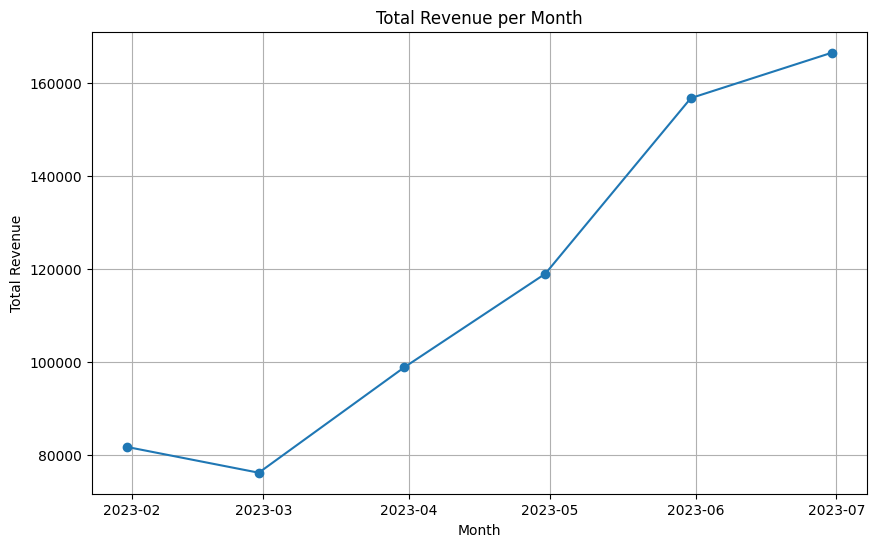

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(total_price_per_month.index, total_price_per_month['total_revenue'], marker='o')
plt.title('Total Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

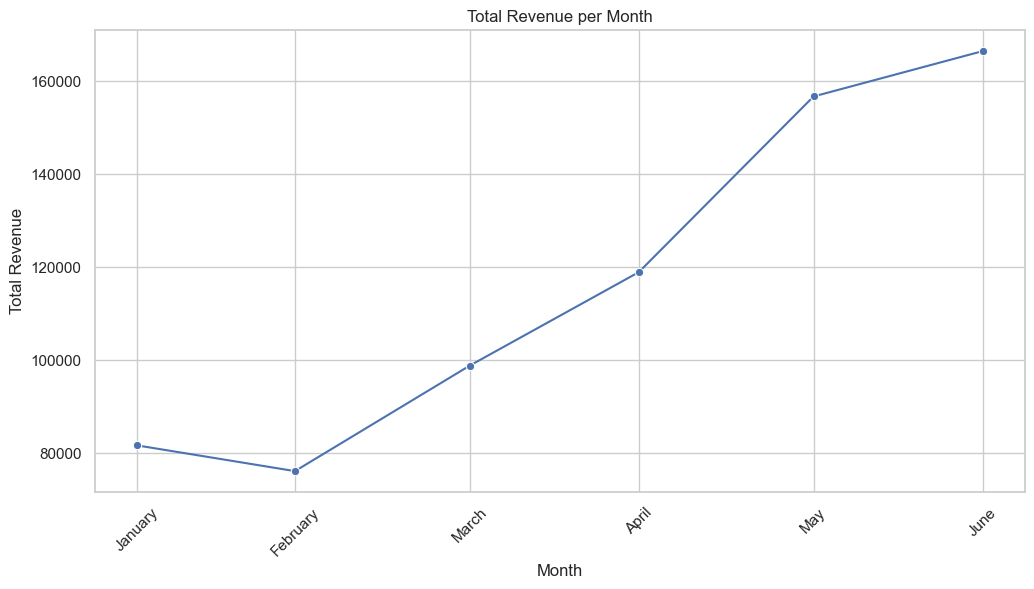

In [24]:
# Create a new column with month names
total_price_per_month['month_name'] = total_price_per_month.index.strftime('%B')

# Use Seaborn for styling
sns.set(style="whitegrid")

# Plot total revenue per month
plt.figure(figsize=(12, 6))
sns.lineplot(x=total_price_per_month.index, y=total_price_per_month['total_revenue'], marker='o')

# Customize the x-axis with month names
plt.xticks(total_price_per_month.index, total_price_per_month['month_name'], rotation=45)
plt.title('Total Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

In [30]:
df["Hours"] = df["transaction_time"].apply(lambda x : x.hour)

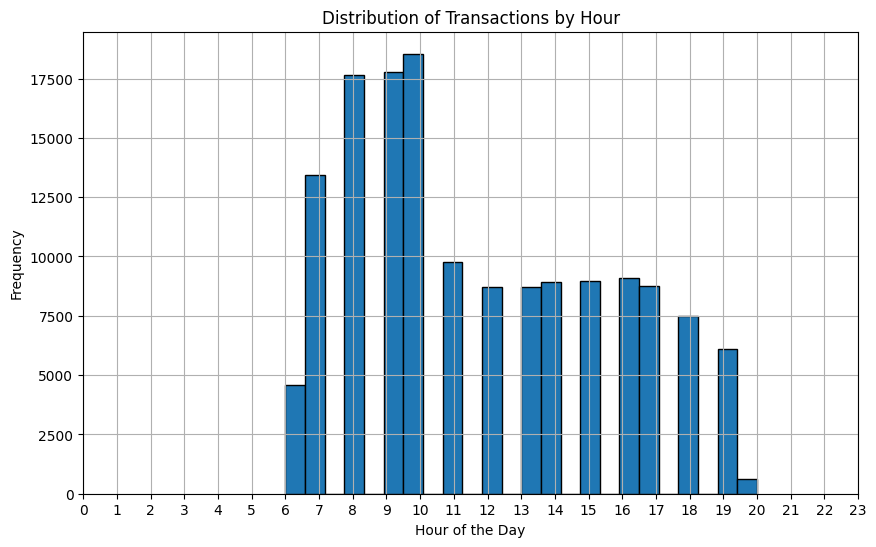

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df already contains your data
# If transaction_time is not already in datetime format, convert it


# Create a new column for hours
df["Hours"] = df["transaction_time"].apply(lambda x: x.hour)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df["Hours"], bins=24, edgecolor='black')  # 24 bins for each hour of the day
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Transactions by Hour')
plt.xticks(range(0, 24))  # Set x-axis ticks to show every hour
plt.grid(True)
plt.show()


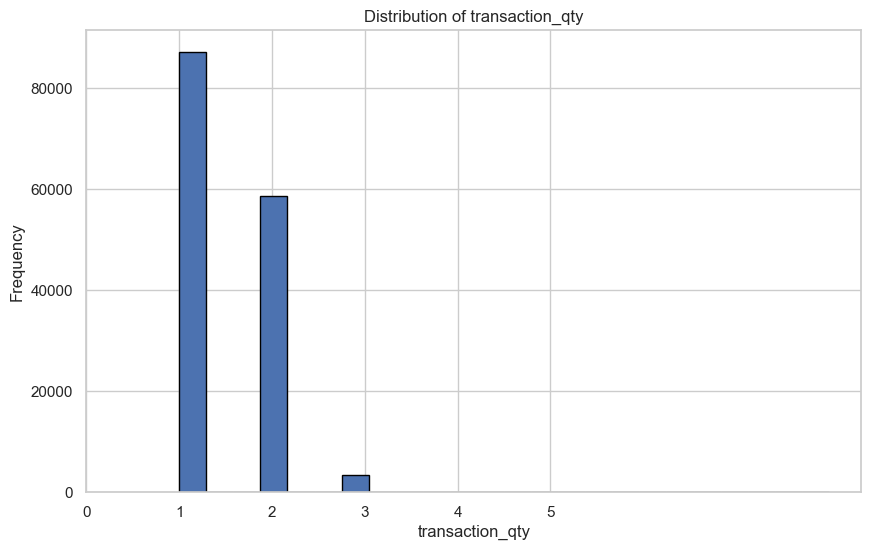

In [28]:
    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df["transaction_qty"], bins=24, edgecolor='black')  # 24 bins for each hour of the day
    plt.xlabel('transaction_qty')
    plt.ylabel('Frequency')
    plt.title('Distribution of transaction_qty')
    plt.xticks(range(0, 6))  
    plt.grid(True)
    plt.show()

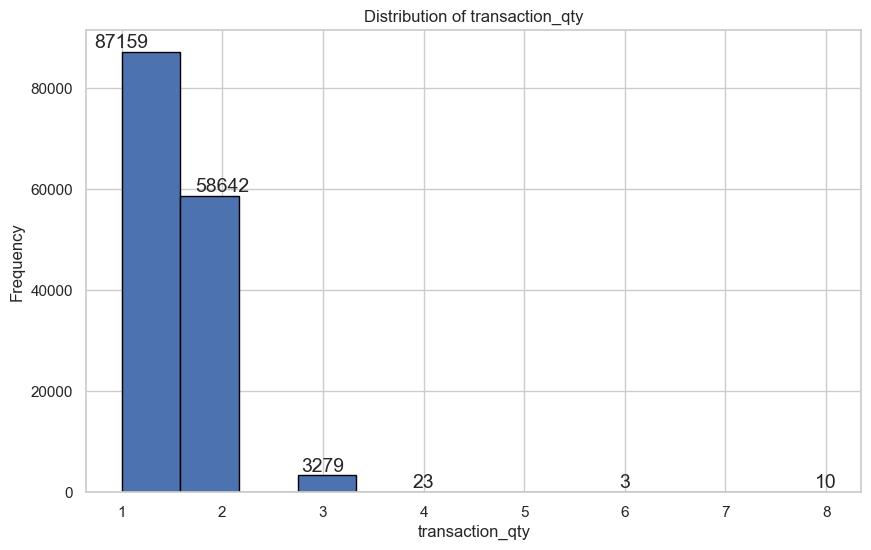

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df already contains your data

# Get the counts of transaction quantities
qty_counts = df["transaction_qty"].value_counts()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df["transaction_qty"], bins=12, edgecolor='black')  # 24 bins for transaction_qty
plt.xlabel('transaction_qty')
plt.ylabel('Frequency')
plt.title('Distribution of transaction_qty')

# Add counts above each bar
for value, count in qty_counts.items():
    plt.text(value, count, str(count), ha='center', va='bottom', fontsize=14)

plt.grid(True)
plt.show()


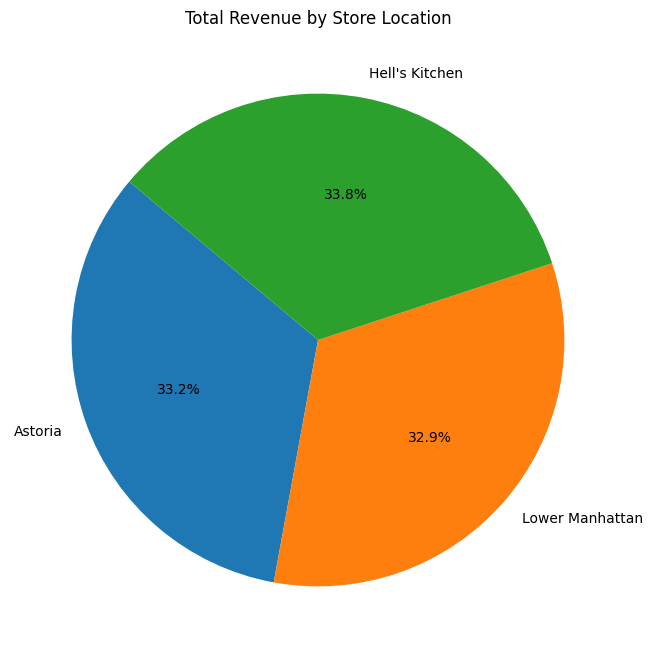

In [10]:

store_labels = {5: "Lower Manhattan", 8: "Hell's Kitchen", 3: "Astoria"}

# Group by store location and calculate total revenue
total_revenue_by_location = df.groupby('store_id')['total_revenue'].sum()

# Map the store_id to location names
total_revenue_by_location.index = total_revenue_by_location.index.map(store_labels)

# Create a pie chart for total revenue by store location
plt.figure(figsize=(8, 8))
total_revenue_by_location.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Total Revenue by Store Location')
plt.ylabel('')
plt.show()

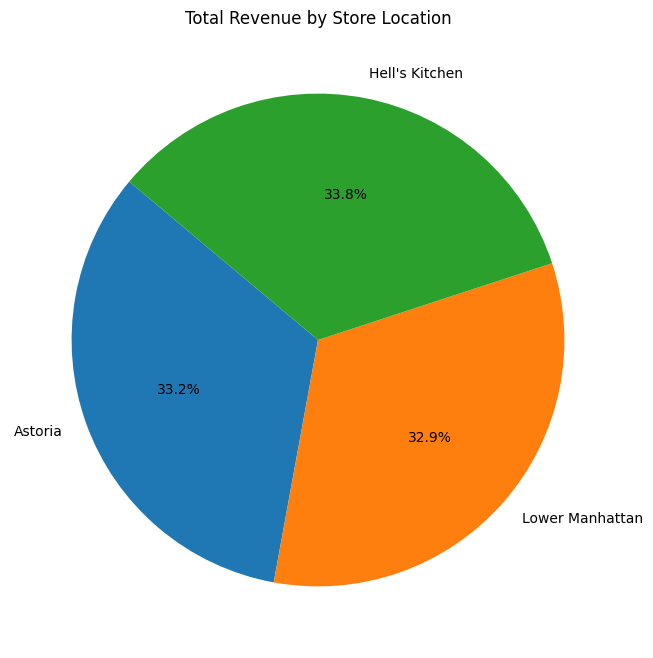

          Location  Total Revenue (k)  Percentage (%)
0          Astoria          232.24391       33.234089
1  Lower Manhattan          230.05725       32.921178
2   Hell's Kitchen          236.51117       33.844733


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (assuming you have already read your data into a DataFrame named df)
# df = pd.read_excel('D:/intership work/Coffee Shop Sales.xlsx') # adjust the file path and method as needed

# Define store labels
store_labels = {5: "Lower Manhattan", 8: "Hell's Kitchen", 3: "Astoria"}

# Group by store location and calculate total revenue
total_revenue_by_location = df.groupby('store_id')['total_revenue'].sum()

# Map the store_id to location names
total_revenue_by_location.index = total_revenue_by_location.index.map(store_labels)

# Convert total revenue to thousands (k)
total_revenue_by_location_k = total_revenue_by_location / 1000

# Create a pie chart for total revenue by store location
plt.figure(figsize=(8, 8))
total_revenue_by_location_k.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Total Revenue by Store Location')
plt.ylabel('')
plt.show()

# Create a table showing numerical values in thousands and percentages
total_revenue_by_location_k_percentage = (total_revenue_by_location_k / total_revenue_by_location_k.sum()) * 100
revenue_table = pd.DataFrame({
    'Location': total_revenue_by_location_k.index,
    'Total Revenue (k)': total_revenue_by_location_k.values,
    'Percentage (%)': total_revenue_by_location_k_percentage.values
})

print(revenue_table)


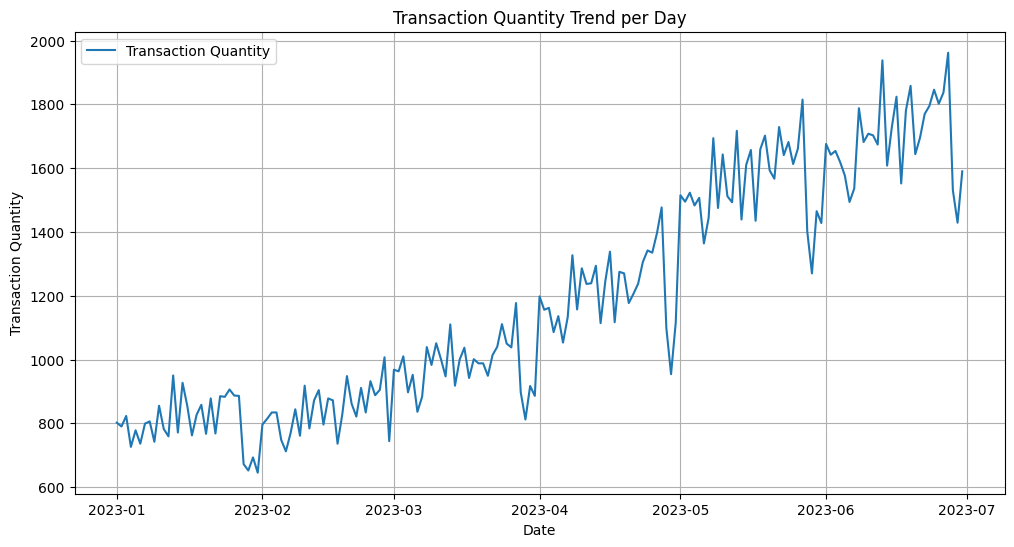

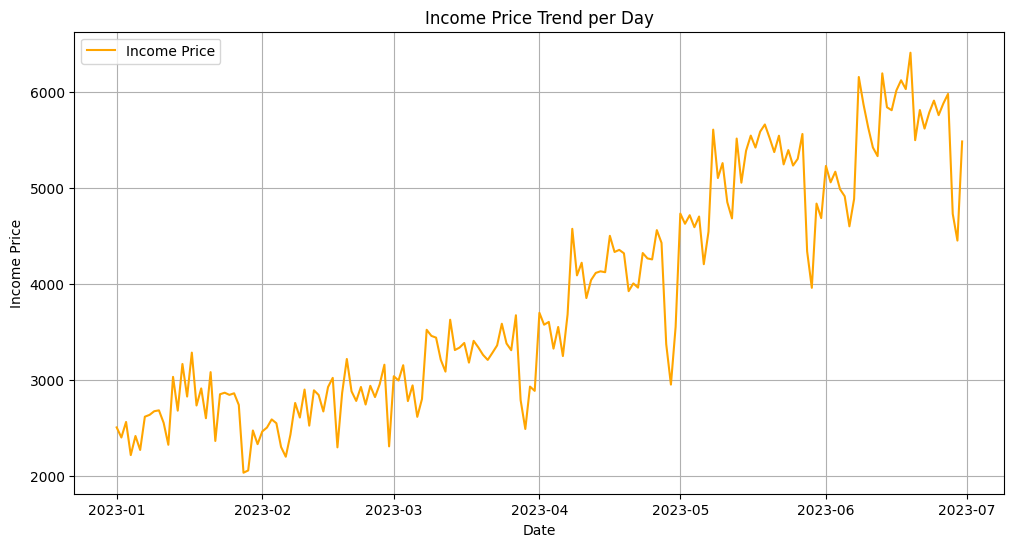

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
#data = pd.read_excel("D:/intership work/Coffee Shop Sales.xlsx")
df = pd.DataFrame(data)

# Combine 'transaction_date' and 'transaction_time' into a single datetime column
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str), errors='coerce')

# Drop rows with invalid 'transaction_datetime'
df = df.dropna(subset=['transaction_datetime'])

# Set 'transaction_datetime' as index
df.set_index('transaction_datetime', inplace=True)

# Calculate 'total_revenue'
df['total_revenue'] = df['transaction_qty'] * df['unit_price']

# Resample and sum by day, selecting only the relevant numeric columns
numeric_columns = ['transaction_qty', 'total_revenue']
daily_data = df[numeric_columns].resample('D').sum()

# Plot transaction quantity trend per day
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Transaction Quantity')
plt.title('Transaction Quantity Trend per Day')
plt.xlabel('Date')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.grid(True)
plt.show()

# Plot income price trend per day
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Income Price', color='orange')
plt.title('Income Price Trend per Day')
plt.xlabel('Date')
plt.ylabel('Income Price')
plt.legend()
plt.grid(True)
plt.show()


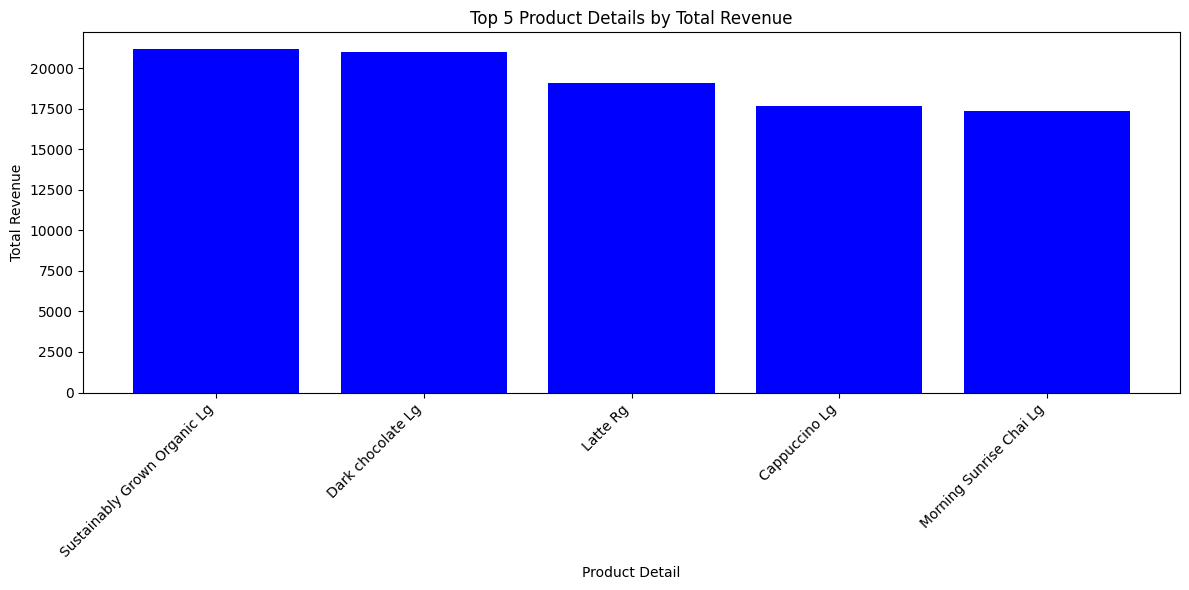

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

 #Load your data
data = pd.read_excel('D:/intership work/Coffee Shop Sales.xlsx')

# Create a new column for total income
data['total_income'] = data['transaction_qty'] * data['unit_price']

# Group by the product_category, product_type, and product_detail and sum the transaction_qty and total_income for each category
category_summary = data.groupby(['product_category', 'product_type', 'product_detail']).agg({
    'transaction_qty': 'sum',
    'unit_price': 'mean',  # Assuming you want the average unit price for each category
    'total_income': 'sum'
}).reset_index()

# Calculate total_revenue
category_summary['total_revenue'] = category_summary['transaction_qty'] * category_summary['unit_price']

# Sort by total_revenue in descending order and select the top 5 product details
top_5_products = category_summary.sort_values(by='total_revenue', ascending=False).head(5)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_5_products['product_detail'], top_5_products['total_revenue'], color='blue')
plt.title('Top 5 Product Details by Total Revenue')
plt.xlabel('Product Detail')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


      product_category        product_type                product_detail  \
62  Packaged Chocolate  Drinking Chocolate                Dark chocolate   
53           Loose Tea           Black tea                     Earl Grey   
56           Loose Tea            Chai tea         Spicy Eye Opener Chai   
39        Coffee beans         Green beans  Guatemalan Sustainably Grown   
59           Loose Tea          Herbal tea                   Lemon Grass   

    transaction_qty  unit_price  total_income  total_revenue  
62              118        6.40         755.2          755.2  
53              142        8.95        1270.9         1270.9  
56              122       10.95        1335.9         1335.9  
39              134       10.00        1340.0         1340.0  
59              152        8.95        1360.4         1360.4  


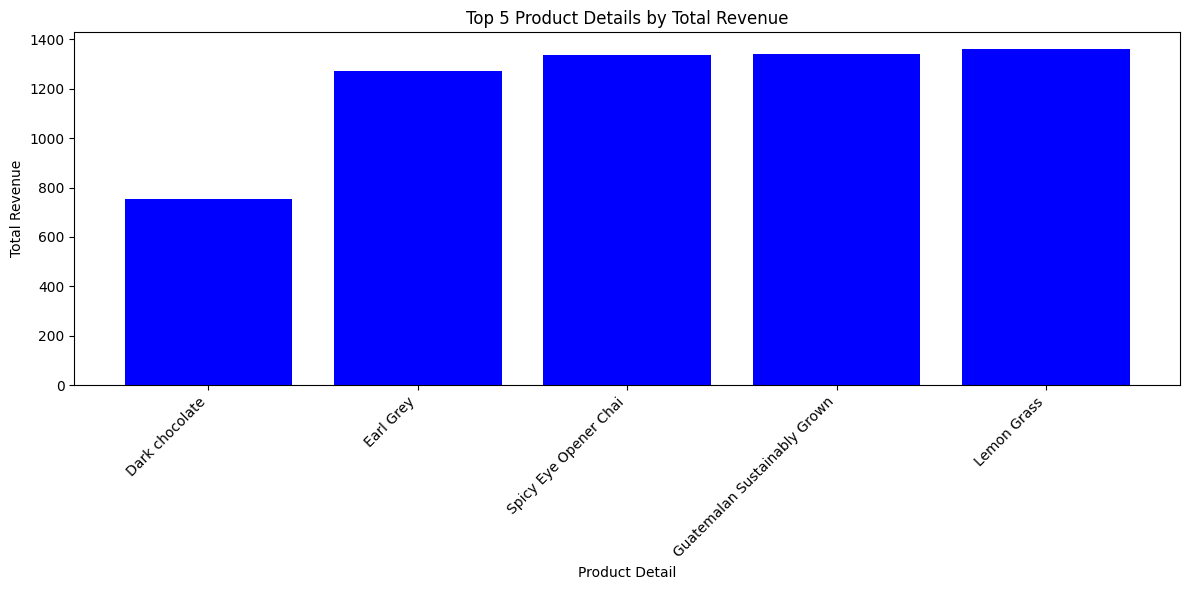

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
#data = pd.read_excel('D:/intership work/Coffee Shop Sales.xlsx')

# Create a new column for total income
data['total_income'] = data['transaction_qty'] * data['unit_price']

# Group by the product_category, product_type, and product_detail and sum the transaction_qty and total_income for each category
category_summary = data.groupby(['product_category', 'product_type', 'product_detail']).agg({
    'transaction_qty': 'sum',
    'unit_price': 'mean',  # Assuming you want the average unit price for each category
    'total_income': 'sum'
}).reset_index()

# Calculate total_revenue
category_summary['total_revenue'] = category_summary['transaction_qty'] * category_summary['unit_price']

# Sort by total_revenue in descending order and select the top 5 product details
top_5_products = category_summary.sort_values(by='total_revenue', ascending=True).head(5)

# Display the top 5 products table
print(top_5_products)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_5_products['product_detail'], top_5_products['total_revenue'], color='blue')
plt.title('Top 5 Product Details by Total Revenue')
plt.xlabel('Product Detail')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


   product_category    product_type           product_detail  transaction_qty  \
43     Coffee beans   Premium Beans                Civet Cat              260   
11          Branded        Clothing  I Need My Bean! T-shirt              221   
42     Coffee beans   Organic Beans      Organic Decaf Blend              206   
38     Coffee beans   Gourmet Beans                 Ethiopia              218   
36     Coffee beans  Espresso Beans     Primo Espresso Roast              150   

    unit_price  total_income  total_revenue  
43   45.000000       11700.0        11700.0  
11   27.886878        6163.0         6163.0  
42   22.609223        4657.5         4657.5  
38   21.000000        4578.0         4578.0  
36   20.450000        3067.5         3067.5  


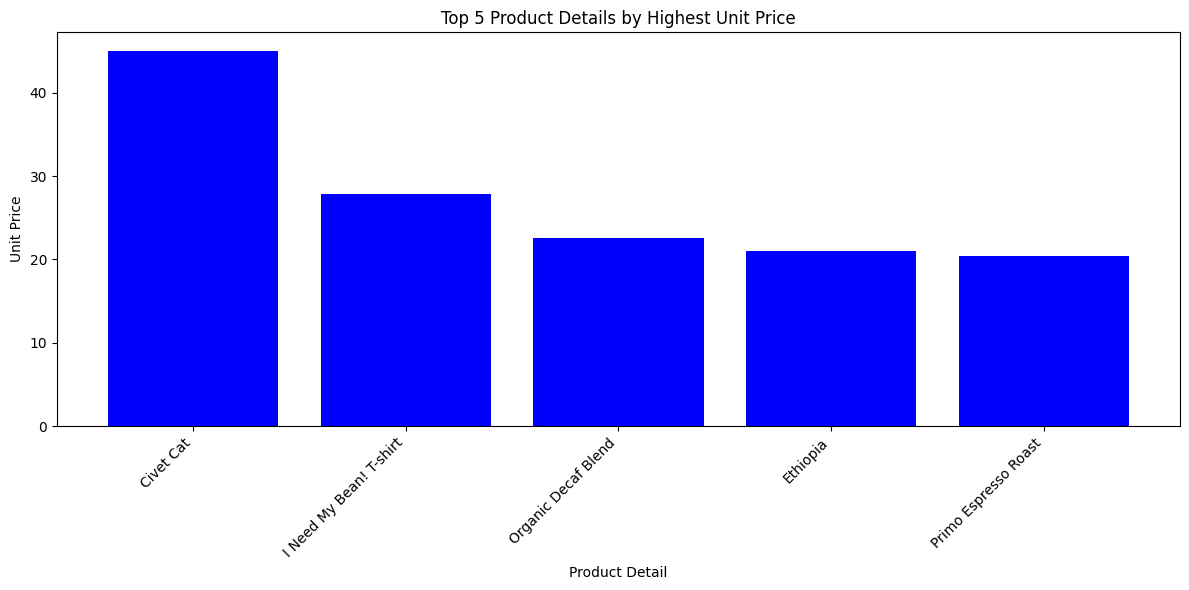

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
# data = pd.read_excel('D:/intership work/Coffee Shop Sales.xlsx')

# Create a new column for total income
data['total_income'] = data['transaction_qty'] * data['unit_price']

# Group by the product_category, product_type, and product_detail and sum the transaction_qty and total_income for each category
category_summary = data.groupby(['product_category', 'product_type', 'product_detail']).agg({
    'transaction_qty': 'sum',
    'unit_price': 'mean',  # Assuming you want the average unit price for each category
    'total_income': 'sum'
}).reset_index()

# Calculate total_revenue
category_summary['total_revenue'] = category_summary['transaction_qty'] * category_summary['unit_price']

# Sort by unit_price in descending order and select the top 5 product details
top_5_products = category_summary.sort_values(by='unit_price', ascending=False).head(5)

# Display the top 5 products table
print(top_5_products)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_5_products['product_detail'], top_5_products['unit_price'], color='blue')
plt.title('Top 5 Product Details by Highest Unit Price')
plt.xlabel('Product Detail')
plt.ylabel('Unit Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


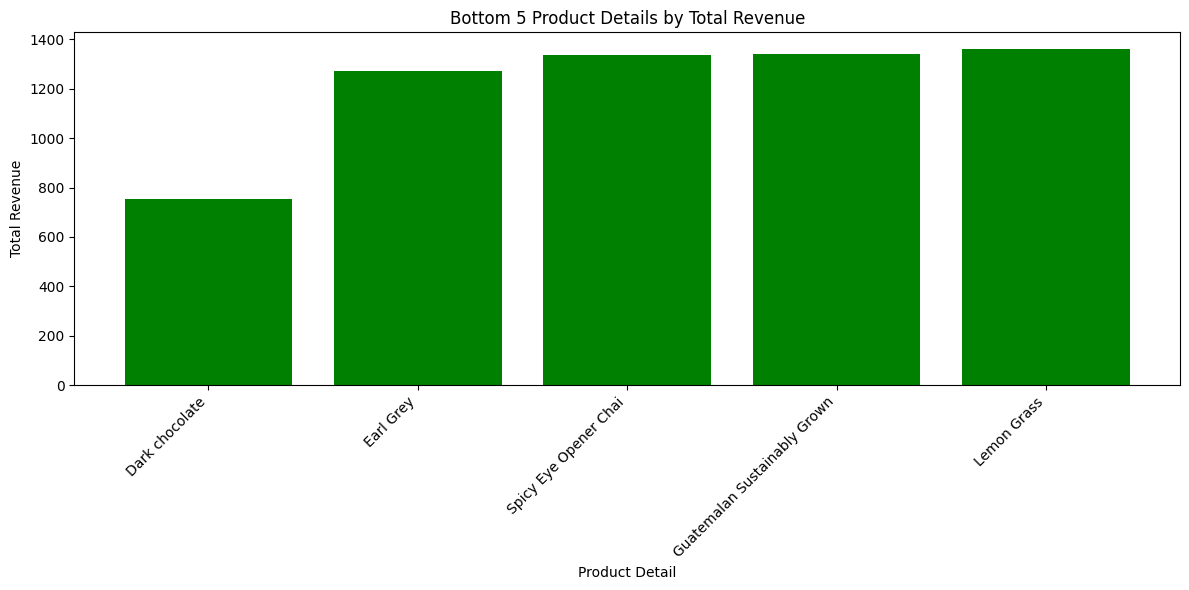

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a new column for total income
data['total_income'] = data['transaction_qty'] * data['unit_price']

# Group by the product_category, product_type, and product_detail and sum the transaction_qty and total_income for each category
category_summary = data.groupby(['product_category', 'product_type', 'product_detail']).agg({
    'transaction_qty': 'sum',
    'unit_price': 'mean',  # Assuming you want the average unit price for each category
    'total_income': 'sum'
}).reset_index()

# Calculate total_revenue
category_summary['total_revenue'] = category_summary['transaction_qty'] * category_summary['unit_price']

# Sort by total_revenue in ascending order and select the bottom 5 product details
bottom_5_products = category_summary.sort_values(by='total_revenue', ascending=True).head(5)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(bottom_5_products['product_detail'], bottom_5_products['total_revenue'], color='Green')
plt.title('Bottom 5 Product Details by Total Revenue')
plt.xlabel('Product Detail')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\Abdul Majid\AppData\Local\Temp\ipykernel_10548\3783536946.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="store_location", y="Total revenue", data=revenue, palette=palette)


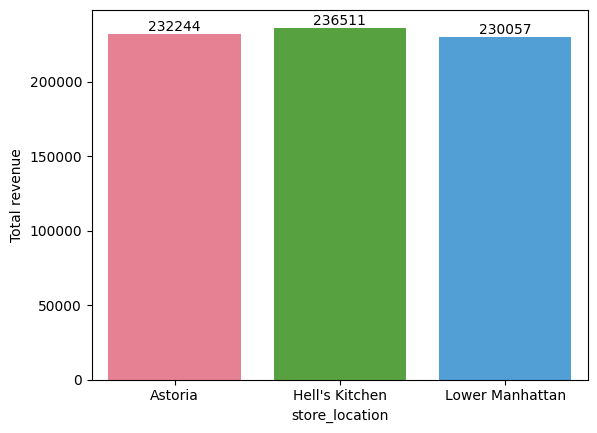

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total revenue
data["Total revenue"] = data["transaction_qty"] * data["unit_price"]

# Calculate total revenue for each store_location
revenue = data.groupby("store_location")["Total revenue"].sum().reset_index()

# Create a custom color palette
palette = sns.color_palette("husl", len(revenue))

# Create bar plot with custom colors
ax = sns.barplot(x="store_location", y="Total revenue", data=revenue, palette=palette)

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


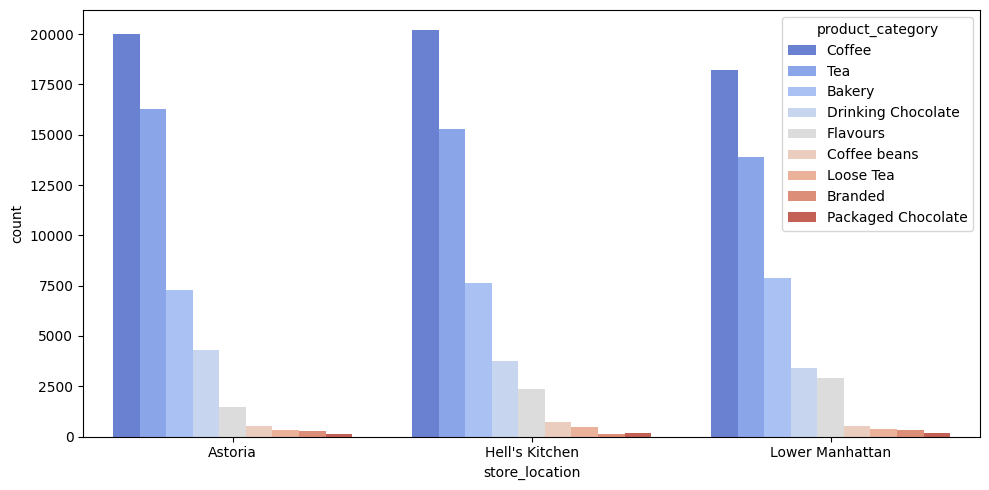

In [15]:
# Stores VS product categories

# Calculate number of product categories at each store location
popular_products = data.groupby('store_location')[['product_category']].value_counts().reset_index(name='count')

# set figure size
plt.figure(figsize=(10, 5))

# Create a bar plot 
sns.barplot(x = 'store_location', y = 'count', hue = 'product_category', data = popular_products, palette = "coolwarm")

plt.tight_layout()
plt.show()

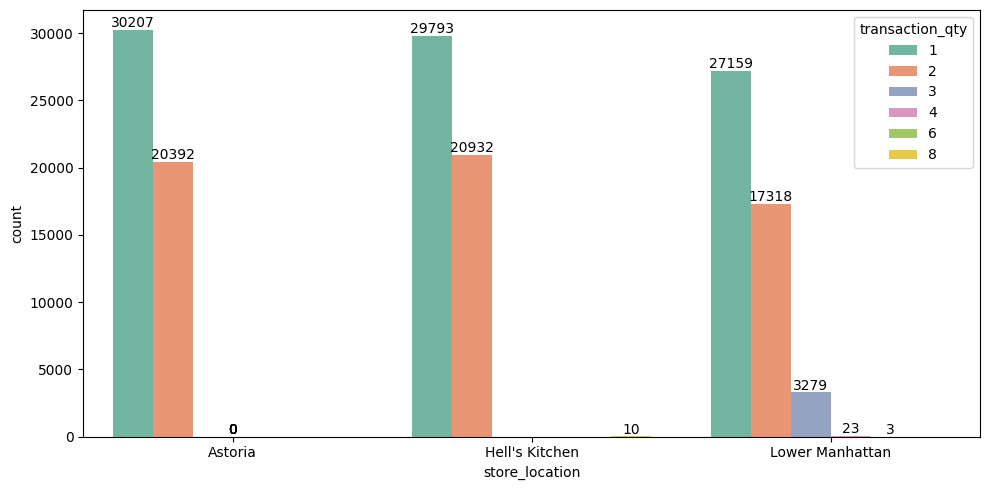

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'store_location' and 'transaction_qty', and count occurrences
grouped_data = data.groupby(['store_location', 'transaction_qty']).size().reset_index(name='count')

# Set figure size
plt.figure(figsize=(10, 5))

# Create a custom color palette
palette = sns.color_palette("Set2", n_colors=grouped_data['transaction_qty'].nunique())

# Create bar plot with the custom palette
ax = sns.barplot(x='store_location', y='count', hue='transaction_qty', data=grouped_data, palette=palette)

# Adding labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, '.0f'), 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Display plot
plt.show()


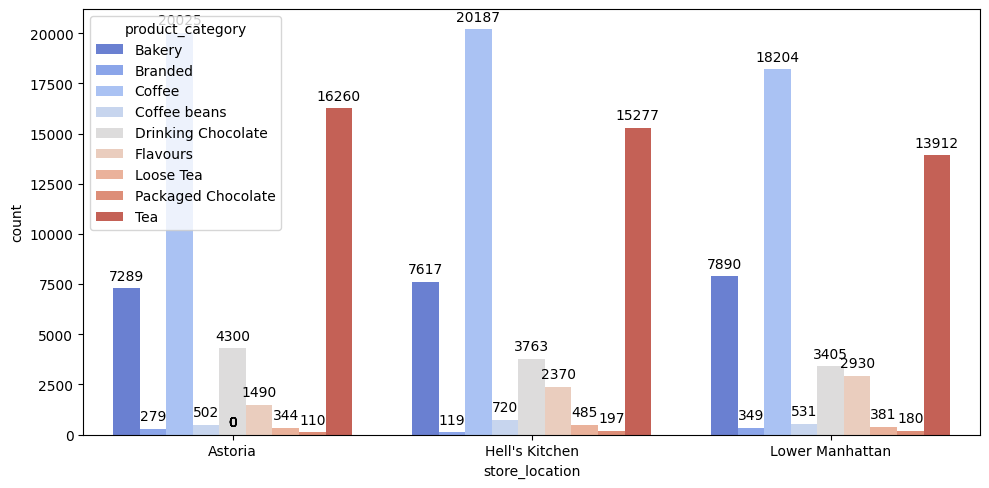

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# data = pd.read_excel('D:/intership work/Coffee Shop Sales.xlsx') # Uncomment and adjust this line if needed

# Calculate the number of product categories at each store location
popular_products = data.groupby(['store_location', 'product_category']).size().reset_index(name='count')

# Set figure size
plt.figure(figsize=(10, 5))

# Create a bar plot
barplot = sns.barplot(x='store_location', y='count', hue='product_category', data=popular_products, palette='coolwarm')

# Annotate each bar with the count
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

plt.tight_layout()
plt.show()


In [7]:
data["Hours"] = data["transaction_time"].apply(lambda x: x.hour)

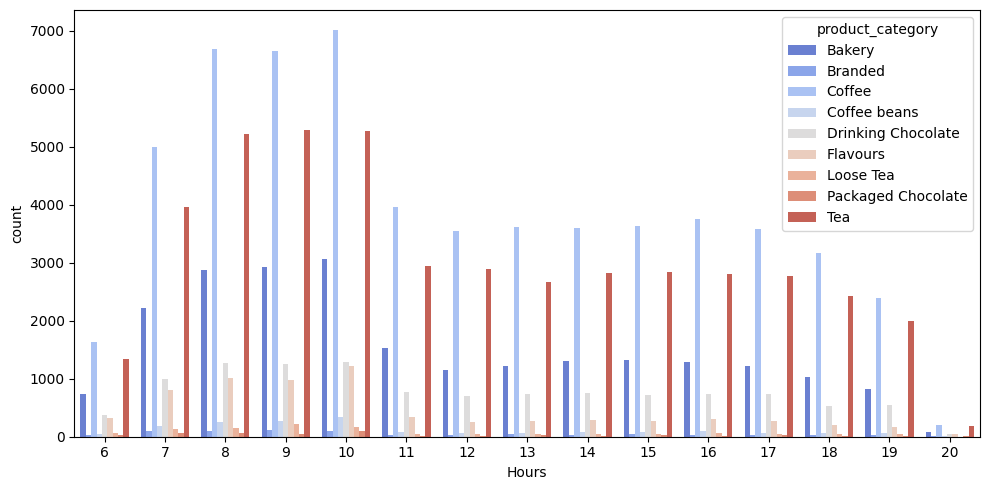

In [16]:
# Stores VS product categories
data["Hours"] = data["transaction_time"].apply(lambda x: x.hour)
# Calculate number of product categories at each store location
popular_products = data.groupby('product_category')[['Hours']].value_counts().reset_index(name='count')

# set figure size
plt.figure(figsize=(10, 5))

# Create a bar plot 
sns.barplot(x = 'Hours', y = 'count', hue = 'product_category', data = popular_products, palette = "coolwarm")

plt.tight_layout()
plt.show()

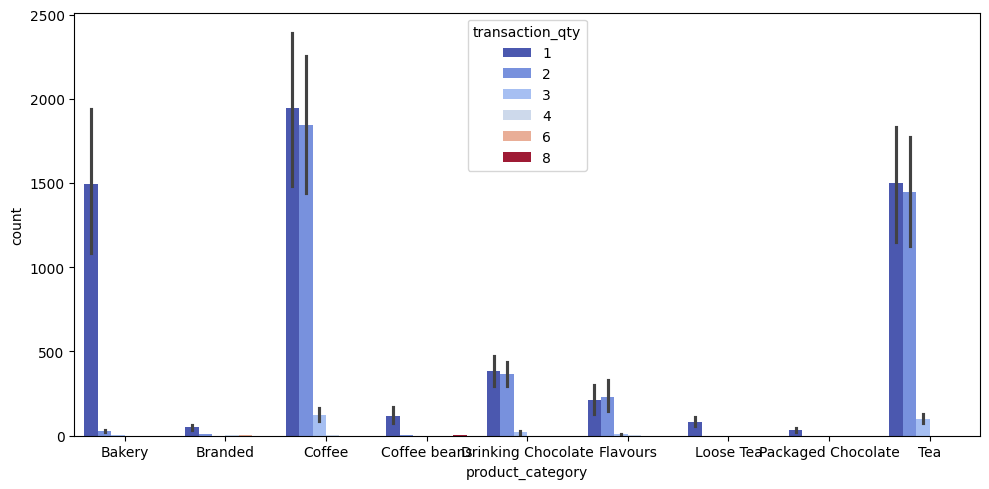

In [22]:
# Stores VS product categories
data["Hours"] = data["transaction_time"].apply(lambda x: x.hour)
# Calculate number of product categories at each store location
popular_products = data.groupby('product_category')[['transaction_qty','Hours']].value_counts().reset_index(name='count')

# set figure size
plt.figure(figsize=(10, 5))

# Create a bar plot 
sns.barplot(x = 'product_category', y = 'count', hue = 'transaction_qty', data = popular_products, palette = "coolwarm")

plt.tight_layout()
plt.show()

C:\Users\Abdul Majid\AppData\Local\Temp\ipykernel_13912\1120361027.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_type", y="revenue", data=category_revenue, palette="coolwarm")


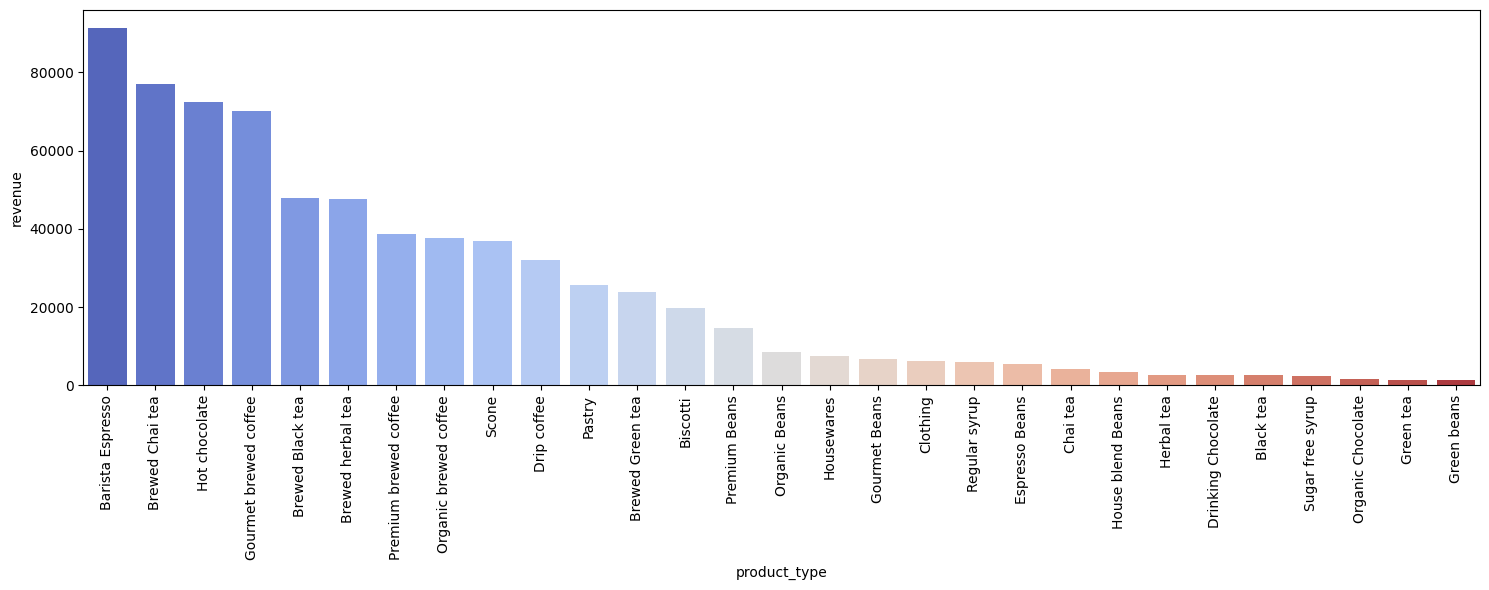


Table of Product Type and Total Revenue:
             product_type   revenue
0        Barista Espresso  91406.20
4         Brewed Chai tea  77081.95
17          Hot chocolate  72416.00
13  Gourmet brewed coffee  70034.60
3        Brewed Black tea  47932.00
6       Brewed herbal tea  47539.50
25  Premium brewed coffee  38781.15
22  Organic brewed coffee  37746.50
27                  Scone  36866.12
10            Drip coffee  31984.00
23                 Pastry  25655.99
5        Brewed Green tea  23852.50
1                Biscotti  19793.53
24          Premium Beans  14583.50
20          Organic Beans   8509.50
19             Housewares   7444.00
12          Gourmet Beans   6798.00
8                Clothing   6163.00
26          Regular syrup   6084.80
11         Espresso Beans   5560.25
7                Chai tea   4301.25
18      House blend Beans   3294.00
16             Herbal tea   2729.75
9      Drinking Chocolate   2728.04
2               Black tea   2711.85
28       Sugar free sy

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' contains your dataset and 'Total revenue' column
# Calculate grouped product_type and Total revenue
data['Total revenue'] = data['transaction_qty'] * data['unit_price']
category_revenue = data.groupby("product_type")["Total revenue"].sum().reset_index(name="revenue")

# Sort categories by revenue
category_revenue = category_revenue.sort_values(by='revenue', ascending=False)

# Set figure size
plt.figure(figsize=(15, 6))

# Create bar plot
sns.barplot(x="product_type", y="revenue", data=category_revenue, palette="coolwarm")

# Set x-axis rotation
plt.xticks(rotation=90)

plt.tight_layout()

# Show plot
plt.show()

# Display values in a table
print("\nTable of Product Type and Total Revenue:")
print(category_revenue)


C:\Users\Abdul Majid\AppData\Local\Temp\ipykernel_9308\1336197124.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='product_type', data=subset, ax=axes[i],
C:\Users\Abdul Majid\AppData\Local\Temp\ipykernel_9308\1336197124.py:28: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.barplot(x='count', y='product_type', data=subset, ax=axes[i],
C:\Users\Abdul Majid\AppData\Local\Temp\ipykernel_9308\1336197124.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='product_type', data=subset, ax=axes[i],
C:\Users\Abdul Majid\AppData\Local\Temp\ipykernel_9308\1336197124.py:28: UserWarning: The palette list has more value

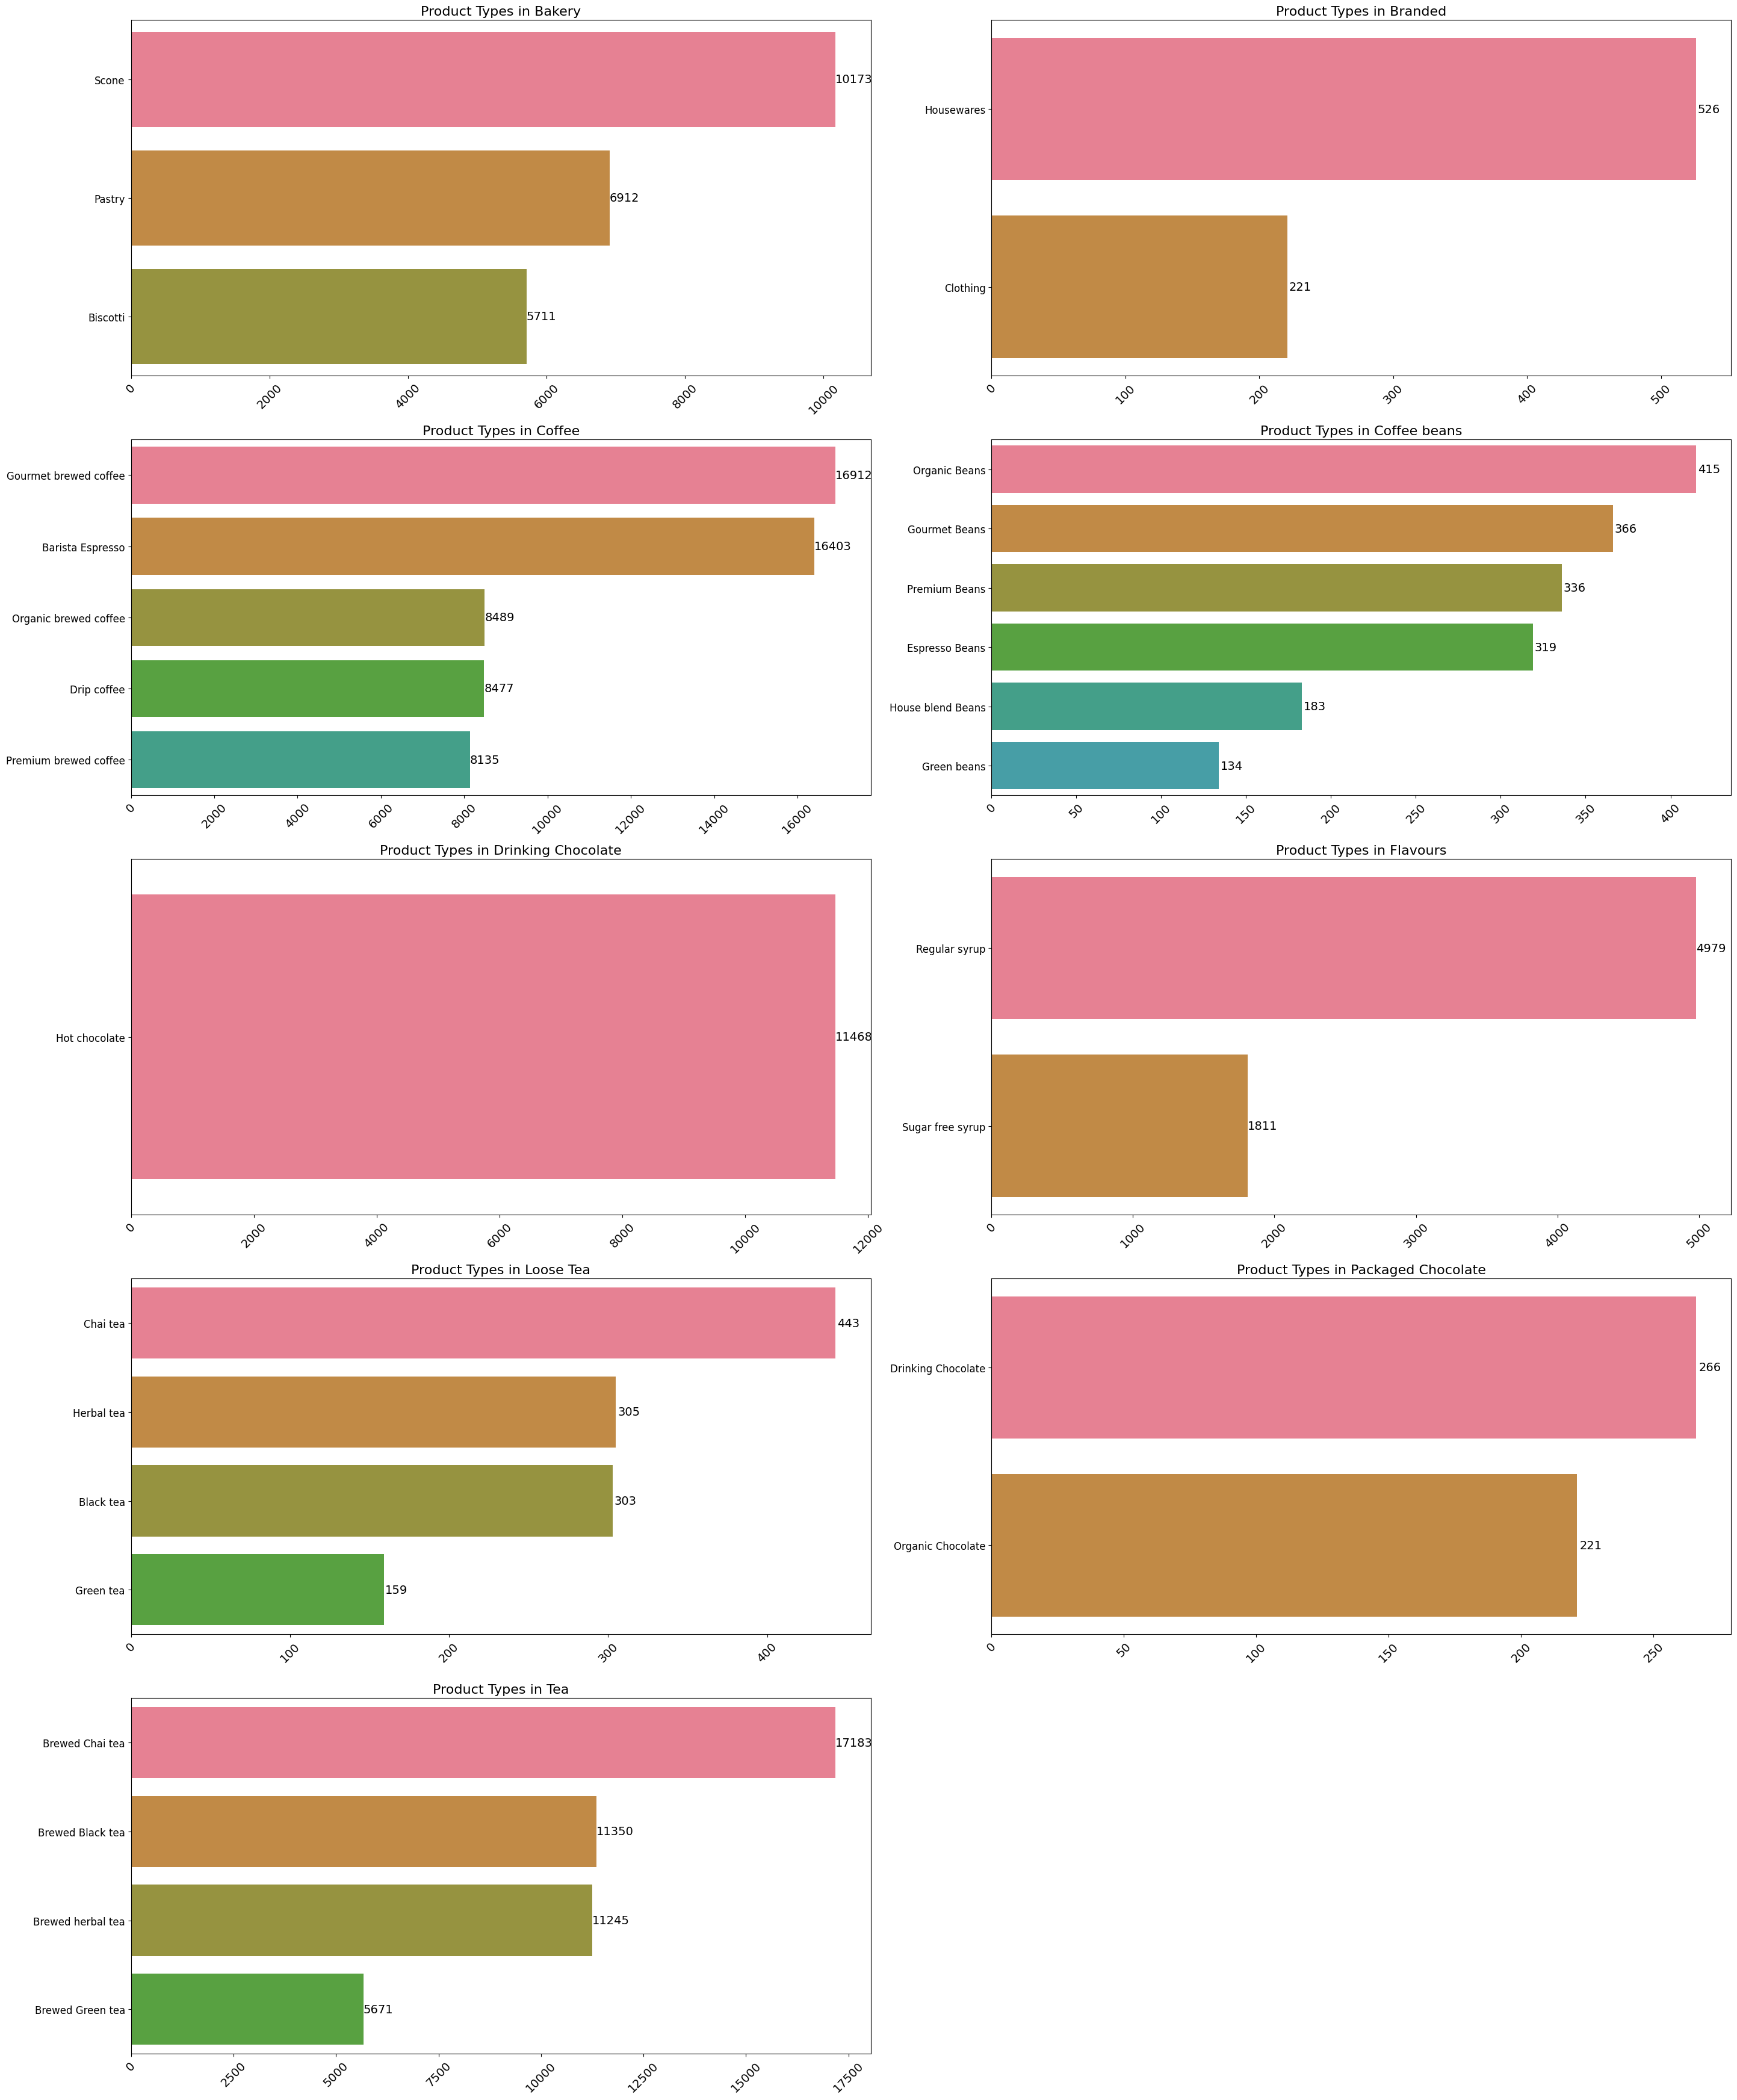

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'counts' is the DataFrame obtained from your groupby operation
counts = data.groupby(["product_category", "product_type"]).size().reset_index(name="count")

# Get unique categories
categories = counts['product_category'].unique()

# Create subplots for each category in a 5x2 grid with increased size
fig, axes = plt.subplots(5, 2, figsize=(29, 35))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Define a color palette
palette = sns.color_palette("husl", len(categories))

for i, category in enumerate(categories):
    # Filter data for each category
    subset = counts[counts['product_category'] == category]
    
    # Sort the data by 'count' column in descending order
    subset = subset.sort_values('count', ascending=False)
    
    # Create a bar plot for each category with sorted order
    sns.barplot(x='count', y='product_type', data=subset, ax=axes[i], 
                order=subset['product_type'], palette=palette)
    
    axes[i].set_title(f'Product Types in {category}', fontsize=16)
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45, labelsize=14)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].grid(False)  # Remove grid lines
    
    # Adding bar labels with increased font size
    for idx, bar in enumerate(axes[i].patches):
        axes[i].text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, subset.iloc[idx]['count'], 
                     ha='left', va='center', fontsize=14)

# Hide extra subplots if there are fewer categories than subplots
for j in range(len(categories), len(axes)):
    axes[j].axis('off')

# Adjust spacing between plots and margins
plt.subplots_adjust(hspace=0.6, wspace=0.4, left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.tight_layout()
plt.show()


C:\Users\Abdul Majid\AppData\Local\Temp\ipykernel_9308\3681227413.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='product_detail', data=subset, ax=axes[i],
C:\Users\Abdul Majid\AppData\Local\Temp\ipykernel_9308\3681227413.py:34: UserWarning: The palette list has more values (29) than needed (6), which may not be intended.
  sns.barplot(x='count', y='product_detail', data=subset, ax=axes[i],
C:\Users\Abdul Majid\AppData\Local\Temp\ipykernel_9308\3681227413.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='product_detail', data=subset, ax=axes[i],
C:\Users\Abdul Majid\AppData\Local\Temp\ipykernel_9308\3681227413.py:34: UserWarning: The palette list has mor

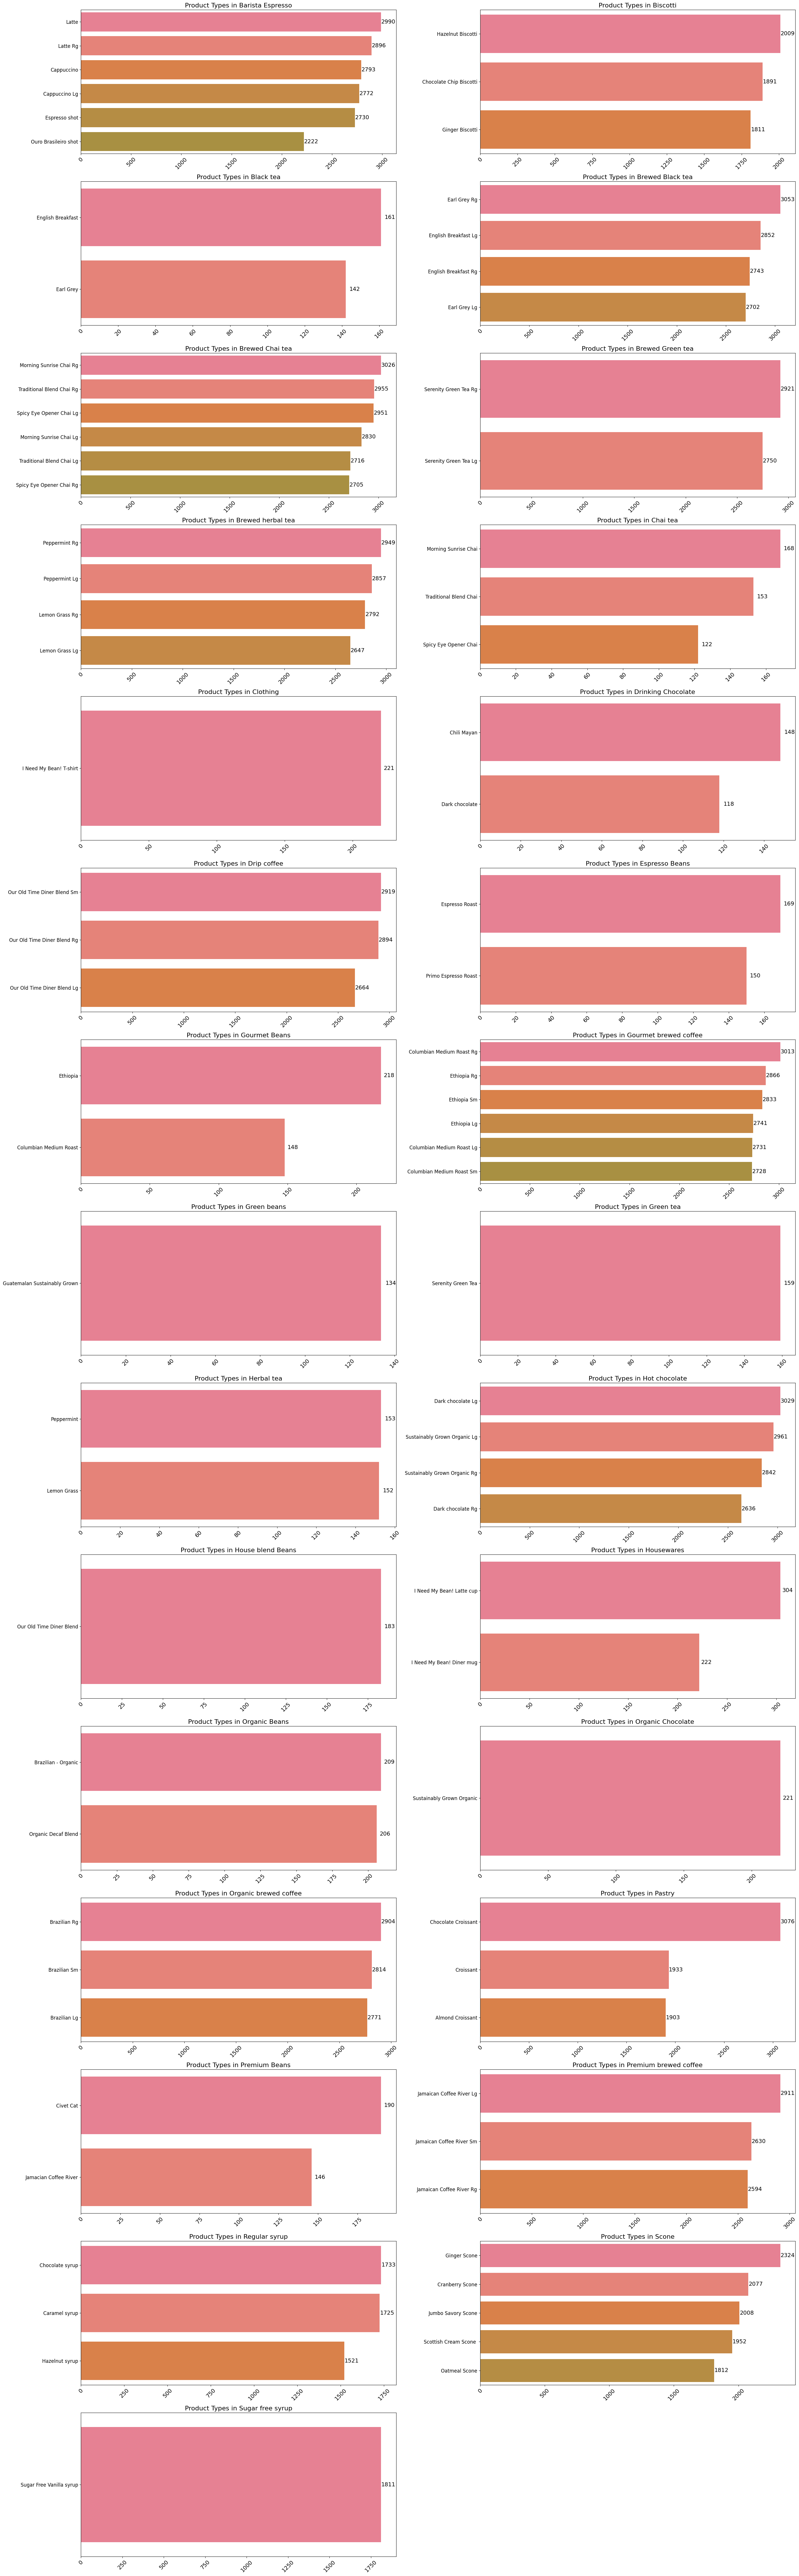

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

# Assuming 'counts' is the DataFrame obtained from your groupby operation
counts = data.groupby(["product_type", "product_detail"]).size().reset_index(name="count")

# Get unique categories
categories = counts['product_type'].unique()

# Determine the number of rows and columns needed for the subplots
n_categories = len(categories)
n_cols = 2
n_rows = math.ceil(n_categories / n_cols)

# Create subplots for each category
fig, axes = plt.subplots(n_rows, n_cols, figsize=(28, n_rows * 6))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Define a color palette
palette = sns.color_palette("husl", n_categories)

for i, category in enumerate(categories):
    # Filter data for each category
    subset = counts[counts['product_type'] == category]
    
    # Sort the data by 'count' column in descending order
    subset = subset.sort_values('count', ascending=False)
    
    # Create a bar plot for each category with sorted order
    sns.barplot(x='count', y='product_detail', data=subset, ax=axes[i], 
                order=subset['product_detail'], palette=palette)
    
    axes[i].set_title(f'Product Types in {category}', fontsize=16)
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45, labelsize=14)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].grid(False)  # Remove grid lines
    
    # Adding bar labels with a larger offset and increased font size
    for idx, bar in enumerate(axes[i].patches):
        axes[i].text(bar.get_width() + 2, bar.get_y() + bar.get_height() / 2, subset.iloc[idx]['count'], 
                     ha='left', va='center', fontsize=14)

# Hide extra subplots if there are fewer categories than subplots
for j in range(n_categories, len(axes)):
    axes[j].axis('off')

# Adjust spacing between plots and margins
plt.subplots_adjust(hspace=0.5, wspace=0.3, left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("D:/intership work/Coffee_Shop_Sales_Plot.png", dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data)

# Create sequences
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

seq_length = 30  # Sequence length of 30 days
x, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the data to fit the LSTM input shape
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2]))


In [16]:
from keras.models import Sequential
from keras.layers import LSTM, Dense



In [11]:
from sklearn.metrics import mean_squared_error

C:\Users\Abdul Majid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 340ms/step - loss: 0.0888 - val_loss: 0.0980
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0167 - val_loss: 0.0281
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0240 - val_loss: 0.0214
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0116 - val_loss: 0.0319
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0100 - val_loss: 0.0398
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0115 - val_loss: 0.0373
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0130 - val_loss: 0.0255
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0101 - val_loss: 0.0178
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0089 - val_loss: 0.0157
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0101 - val_loss: 0.0151
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0085 - val_loss: 0.0154
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0082 - val_l

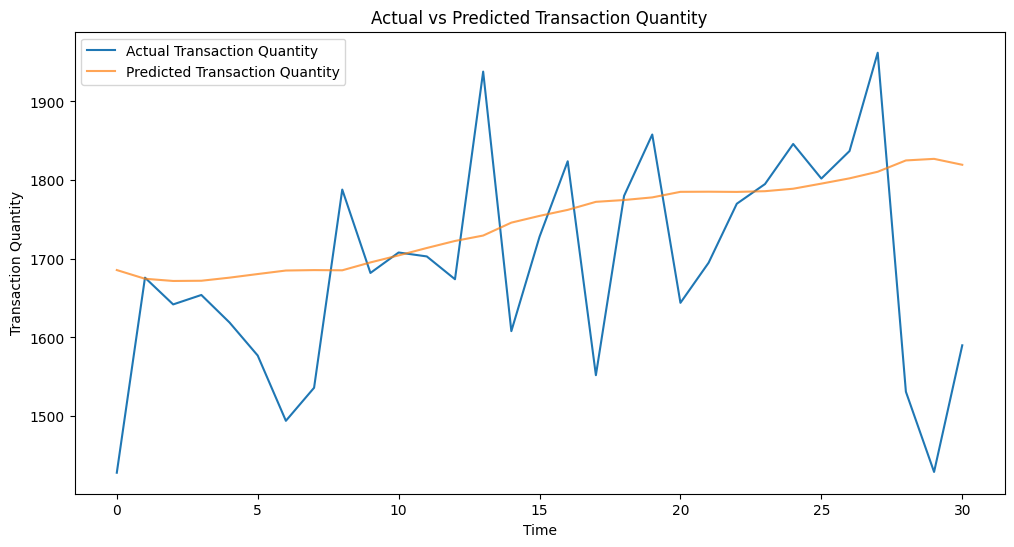

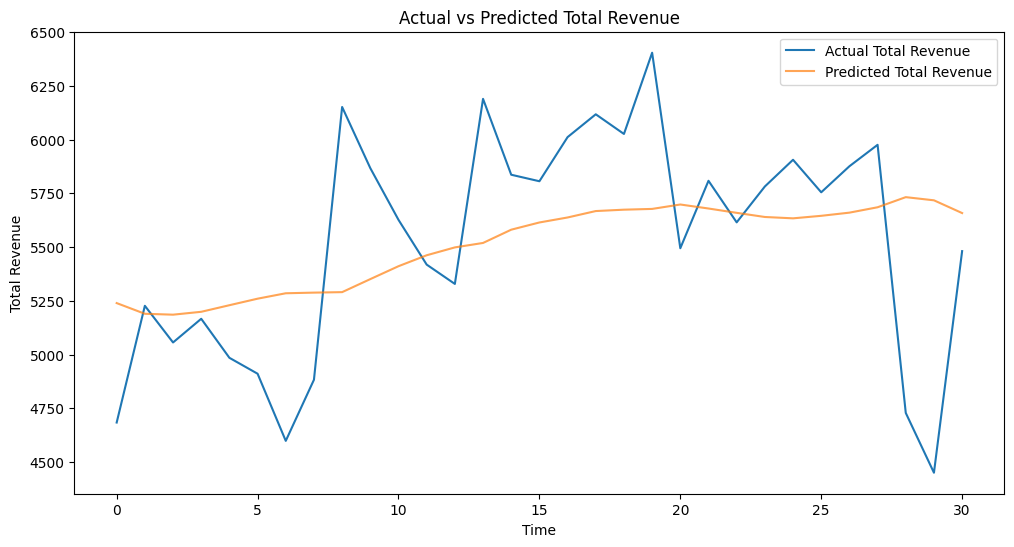

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load the data
data = pd.read_excel("D:/intership work/Coffee Shop Sales.xlsx")
df = pd.DataFrame(data)

# Combine 'transaction_date' and 'transaction_time' into a single datetime column
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str), errors='coerce')

# Drop rows with invalid 'transaction_datetime'
df = df.dropna(subset=['transaction_datetime'])

# Set 'transaction_datetime' as index
df.set_index('transaction_datetime', inplace=True)

# Calculate 'total_revenue'
df['total_revenue'] = df['transaction_qty'] * df['unit_price']

# Resample and sum by day, selecting only the relevant numeric columns
numeric_columns = ['transaction_qty', 'total_revenue']
daily_data = df[numeric_columns].resample('D').sum()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data)

# Create sequences
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

seq_length = 30  # Sequence length of 30 days
x, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the data to fit the LSTM input shape
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1]))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = model.predict(x_test)

# Inverse transform the predictions and actual values
y_test_inverse = scaler.inverse_transform(y_test)
y_pred_inverse = scaler.inverse_transform(y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs predicted values for transaction quantity and total revenue
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse[:, 0], label='Actual Transaction Quantity')
plt.plot(y_pred_inverse[:, 0], label='Predicted Transaction Quantity', alpha=0.7)
plt.title('Actual vs Predicted Transaction Quantity')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse[:, 1], label='Actual Total Revenue')
plt.plot(y_pred_inverse[:, 1], label='Predicted Total Revenue', alpha=0.7)
plt.title('Actual vs Predicted Total Revenue')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the data
#data = pd.read_excel("D:/intership work/Coffee Shop Sales.xlsx")
#df = pd.DataFrame(data)

# Combine 'transaction_date' and 'transaction_time' into a single datetime column
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str), errors='coerce')

# Drop rows with invalid 'transaction_datetime'
df = df.dropna(subset=['transaction_datetime'])

# Set 'transaction_datetime' as index
df.set_index('transaction_datetime', inplace=True)

# Calculate 'total_revenue'
df['total_revenue'] = df['transaction_qty'] * df['unit_price']

# Resample and sum by day, selecting only the relevant numeric columns
numeric_columns = ['transaction_qty', 'total_revenue']
daily_data = df[numeric_columns].resample('D').sum()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data)

# Create features and labels
seq_length = 30  # Sequence length of 30 days
X = []
y_qty = []
y_revenue = []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i + seq_length])
    y_qty.append(scaled_data[i + seq_length, 0])
    y_revenue.append(scaled_data[i + seq_length, 1])

X = np.array(X)
y_qty = np.array(y_qty)
y_revenue = np.array(y_revenue)

# Split the data into training and testing sets
X_train, X_test, y_qty_train, y_qty_test, y_revenue_train, y_revenue_test = train_test_split(X, y_qty, y_revenue, test_size=0.2, random_state=42)

# Reshape the data to 2D for Random Forest input
X_train_reshaped = X_train.reshape((X_train.shape[0], -1))
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))

# Train Random Forest Regressor for transaction quantity
rf_qty = RandomForestRegressor(n_estimators=100, random_state=42)
rf_qty.fit(X_train_reshaped, y_qty_train)

# Train Random Forest Regressor for total revenue
rf_revenue = RandomForestRegressor(n_estimators=100, random_state=42)
rf_revenue.fit(X_train_reshaped, y_revenue_train)

# Make predictions
y_qty_pred = rf_qty.predict(X_test_reshaped)
y_revenue_pred = rf_revenue.predict(X_test_reshaped)

# Inverse transform the predictions and actual values
y_qty_test_inverse = scaler.inverse_transform(np.column_stack((y_qty_test, np.zeros_like(y_qty_test))))[:, 0]
y_revenue_test_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_test), y_revenue_test)))[:, 1]
y_qty_pred_inverse = scaler.inverse_transform(np.column_stack((y_qty_pred, np.zeros_like(y_qty_pred))))[:, 0]
y_revenue_pred_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_pred), y_revenue_pred)))[:, 1]

# Calculate the mean squared error
mse_qty = mean_squared_error(y_qty_test_inverse, y_qty_pred_inverse)
mse_revenue = mean_squared_error(y_revenue_test_inverse, y_revenue_pred_inverse)
print(f'Mean Squared Error (Quantity): {mse_qty}')
print(f'Mean Squared Error (Revenue): {mse_revenue}')

# Plot the actual vs predicted values for transaction quantity and total revenue
plt.figure(figsize=(12, 6))
plt.plot(y_qty_test_inverse, label='Actual Transaction Quantity')
plt.plot(y_qty_pred_inverse, label='Predicted Transaction Quantity', alpha=0.7)
plt.title('Actual vs Predicted Transaction Quantity')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_revenue_test_inverse, label='Actual Total Revenue')
plt.plot(y_revenue_pred_inverse, label='Predicted Total Revenue', alpha=0.7)
plt.title('Actual vs Predicted Total Revenue')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()


Mean Squared Error (Quantity): 14270.794470967741
Mean Squared Error (Revenue): 123914.90701396237


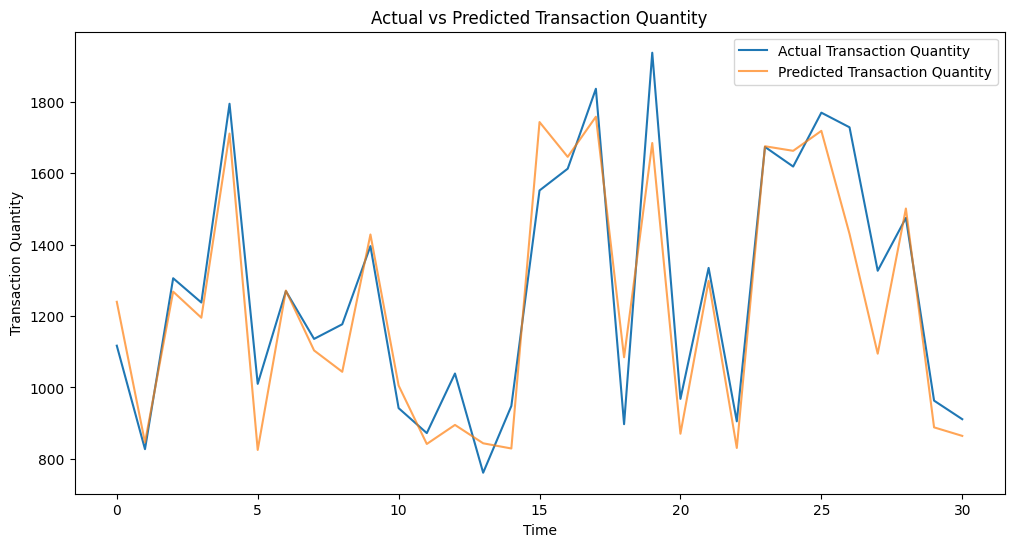

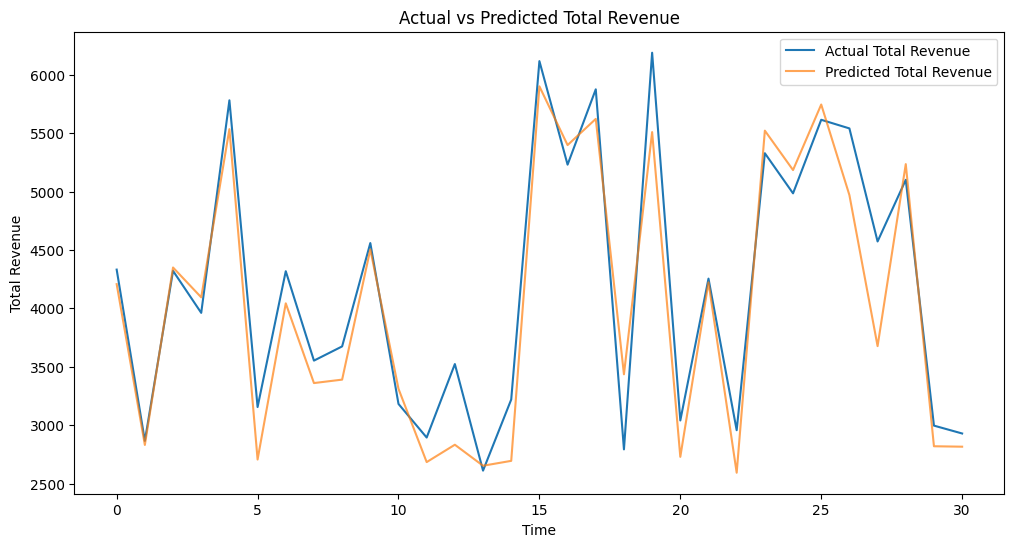

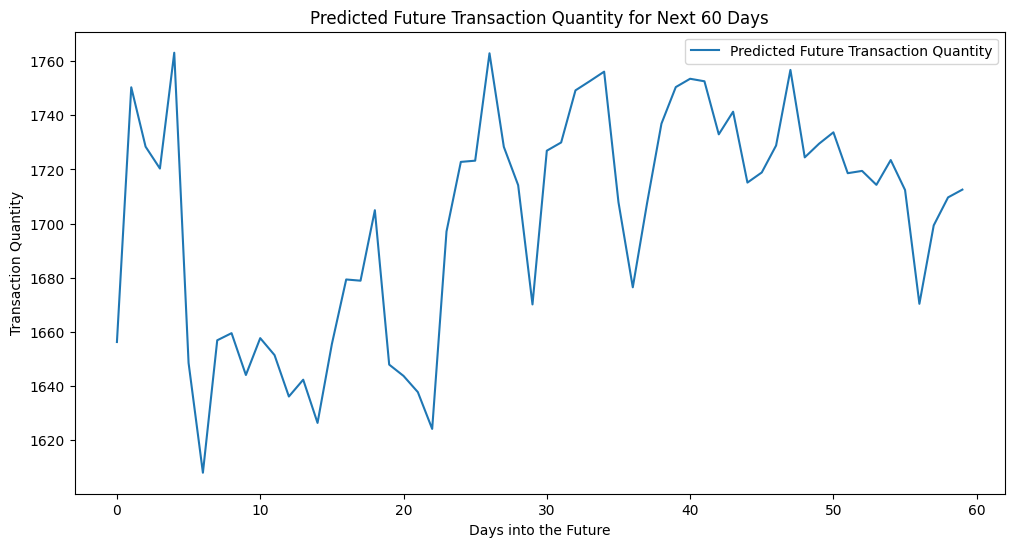

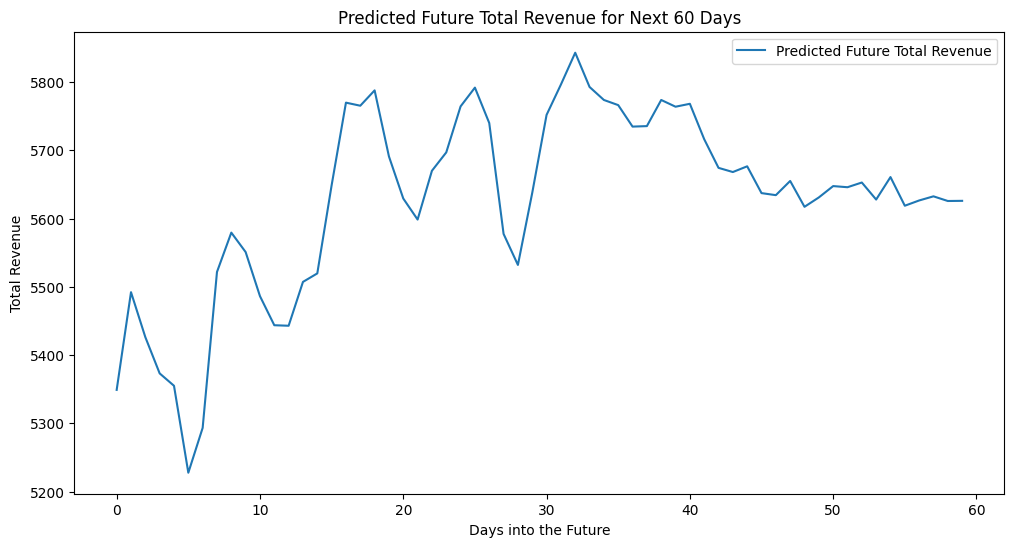

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the data
#data = pd.read_excel("D:/intership work/Coffee Shop Sales.xlsx")
#df = pd.DataFrame(data)

# Combine 'transaction_date' and 'transaction_time' into a single datetime column
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str), errors='coerce')

# Drop rows with invalid 'transaction_datetime'
df = df.dropna(subset=['transaction_datetime'])

# Set 'transaction_datetime' as index
df.set_index('transaction_datetime', inplace=True)

# Calculate 'total_revenue'
df['total_revenue'] = df['transaction_qty'] * df['unit_price']

# Resample and sum by day, selecting only the relevant numeric columns
numeric_columns = ['transaction_qty', 'total_revenue']
daily_data = df[numeric_columns].resample('D').sum()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data)

# Create features and labels
seq_length = 30  # Sequence length of 30 days
X = []
y_qty = []
y_revenue = []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i + seq_length])
    y_qty.append(scaled_data[i + seq_length, 0])
    y_revenue.append(scaled_data[i + seq_length, 1])

X = np.array(X)
y_qty = np.array(y_qty)
y_revenue = np.array(y_revenue)

# Split the data into training and testing sets
X_train, X_test, y_qty_train, y_qty_test, y_revenue_train, y_revenue_test = train_test_split(X, y_qty, y_revenue, test_size=0.2, random_state=42)

# Reshape the data to 2D for Random Forest input
X_train_reshaped = X_train.reshape((X_train.shape[0], -1))
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))

# Train Random Forest Regressor for transaction quantity
rf_qty = RandomForestRegressor(n_estimators=100, random_state=42)
rf_qty.fit(X_train_reshaped, y_qty_train)

# Train Random Forest Regressor for total revenue
rf_revenue = RandomForestRegressor(n_estimators=100, random_state=42)
rf_revenue.fit(X_train_reshaped, y_revenue_train)

# Make predictions
y_qty_pred = rf_qty.predict(X_test_reshaped)
y_revenue_pred = rf_revenue.predict(X_test_reshaped)

# Inverse transform the predictions and actual values
y_qty_test_inverse = scaler.inverse_transform(np.column_stack((y_qty_test, np.zeros_like(y_qty_test))))[:, 0]
y_revenue_test_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_test), y_revenue_test)))[:, 1]
y_qty_pred_inverse = scaler.inverse_transform(np.column_stack((y_qty_pred, np.zeros_like(y_qty_pred))))[:, 0]
y_revenue_pred_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_pred), y_revenue_pred)))[:, 1]

# Calculate the mean squared error
mse_qty = mean_squared_error(y_qty_test_inverse, y_qty_pred_inverse)
mse_revenue = mean_squared_error(y_revenue_test_inverse, y_revenue_pred_inverse)
print(f'Mean Squared Error (Quantity): {mse_qty}')
print(f'Mean Squared Error (Revenue): {mse_revenue}')

# Plot the actual vs predicted values for transaction quantity and total revenue
plt.figure(figsize=(12, 6))
plt.plot(y_qty_test_inverse, label='Actual Transaction Quantity')
plt.plot(y_qty_pred_inverse, label='Predicted Transaction Quantity', alpha=0.7)
plt.title('Actual vs Predicted Transaction Quantity')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_revenue_test_inverse, label='Actual Total Revenue')
plt.plot(y_revenue_pred_inverse, label='Predicted Total Revenue', alpha=0.7)
plt.title('Actual vs Predicted Total Revenue')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()

# Predict two months into the future
future_steps = 60  # Predicting 60 days into the future
last_sequence = scaled_data[-seq_length:]  # Start with the last available sequence

future_predictions_qty = []
future_predictions_revenue = []

for _ in range(future_steps):
    last_sequence_reshaped = last_sequence.reshape((1, -1))
    
    # Predict next day's transaction quantity and total revenue
    next_qty = rf_qty.predict(last_sequence_reshaped)[0]
    next_revenue = rf_revenue.predict(last_sequence_reshaped)[0]
    
    # Append the predictions to the future predictions list
    future_predictions_qty.append(next_qty)
    future_predictions_revenue.append(next_revenue)
    
    # Update the sequence by removing the oldest value and adding the new predictions
    next_values = np.array([next_qty, next_revenue]).reshape(1, -1)
    last_sequence = np.append(last_sequence[1:], next_values, axis=0)

# Inverse transform the future predictions
future_predictions_qty_inverse = scaler.inverse_transform(np.column_stack((future_predictions_qty, np.zeros_like(future_predictions_qty))))[:, 0]
future_predictions_revenue_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(future_predictions_revenue), future_predictions_revenue)))[:, 1]

# Plot the future predictions
plt.figure(figsize=(12, 6))
plt.plot(future_predictions_qty_inverse, label='Predicted Future Transaction Quantity')
plt.title('Predicted Future Transaction Quantity for Next 60 Days')
plt.xlabel('Days into the Future')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(future_predictions_revenue_inverse, label='Predicted Future Total Revenue')
plt.title('Predicted Future Total Revenue for Next 60 Days')
plt.xlabel('Days into the Future')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()


Mean Squared Error (Quantity): 14270.794470967741
Mean Squared Error (Revenue): 123914.90701396237


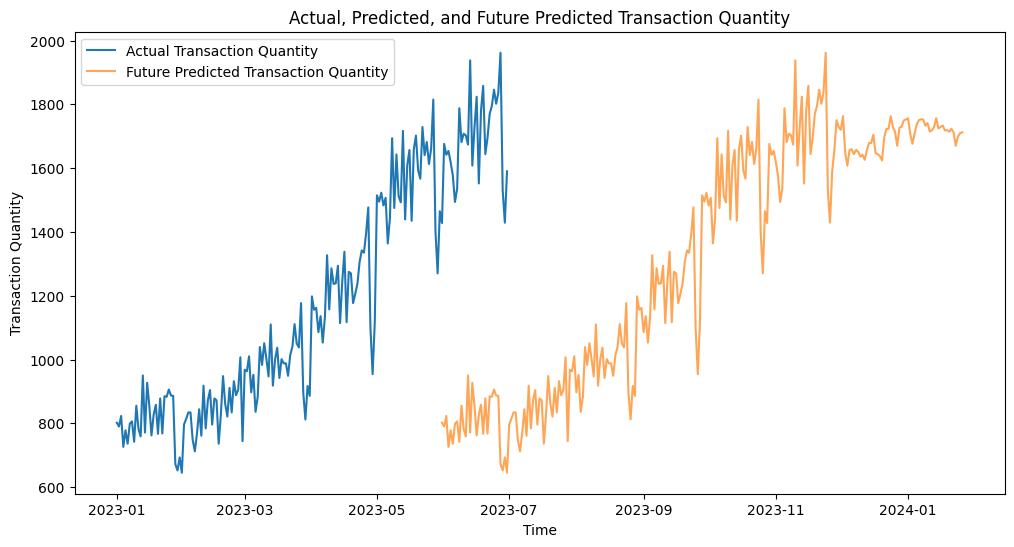

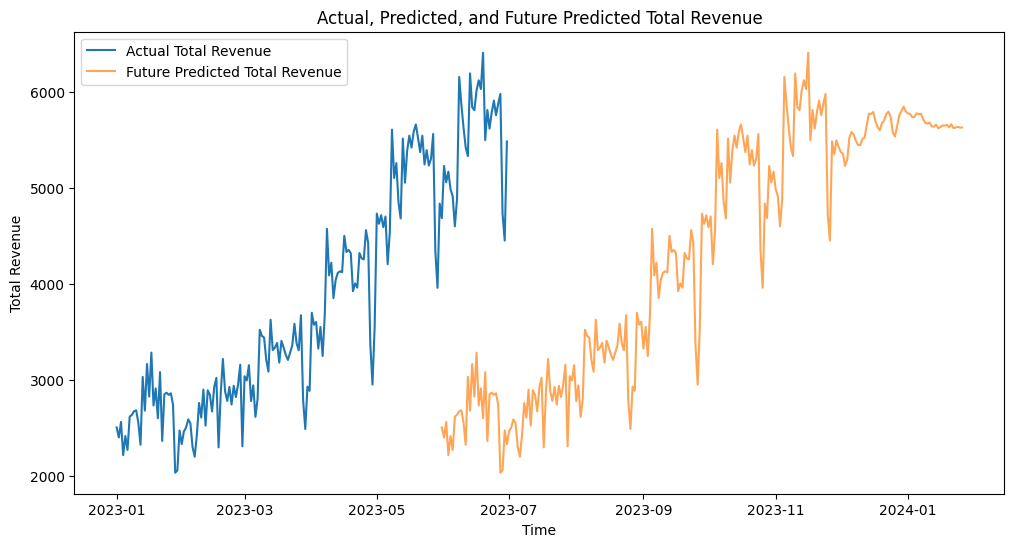

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the data
df=pd.DataFrame(data)
# Combine 'transaction_date' and 'transaction_time' into a single datetime column
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str), errors='coerce')

# Drop rows with invalid 'transaction_datetime'
df = df.dropna(subset=['transaction_datetime'])

# Set 'transaction_datetime' as index
df.set_index('transaction_datetime', inplace=True)

# Calculate 'total_revenue'
df['total_revenue'] = df['transaction_qty'] * df['unit_price']

# Resample and sum by day, selecting only the relevant numeric columns
numeric_columns = ['transaction_qty', 'total_revenue']
daily_data = df[numeric_columns].resample('D').sum()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data)

# Create features and labels
seq_length = 30  # Sequence length of 30 days
X = []
y_qty = []
y_revenue = []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i + seq_length])
    y_qty.append(scaled_data[i + seq_length, 0])
    y_revenue.append(scaled_data[i + seq_length, 1])

X = np.array(X)
y_qty = np.array(y_qty)
y_revenue = np.array(y_revenue)

# Split the data into training and testing sets
X_train, X_test, y_qty_train, y_qty_test, y_revenue_train, y_revenue_test = train_test_split(X, y_qty, y_revenue, test_size=0.2, random_state=42)

# Reshape the data to 2D for Random Forest input
X_train_reshaped = X_train.reshape((X_train.shape[0], -1))
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))

# Train Random Forest Regressor for transaction quantity
rf_qty = RandomForestRegressor(n_estimators=100, random_state=42)
rf_qty.fit(X_train_reshaped, y_qty_train)

# Train Random Forest Regressor for total revenue
rf_revenue = RandomForestRegressor(n_estimators=100, random_state=42)
rf_revenue.fit(X_train_reshaped, y_revenue_train)

# Make predictions
y_qty_pred = rf_qty.predict(X_test_reshaped)
y_revenue_pred = rf_revenue.predict(X_test_reshaped)

# Inverse transform the predictions and actual values
y_qty_test_inverse = scaler.inverse_transform(np.column_stack((y_qty_test, np.zeros_like(y_qty_test))))[:, 0]
y_revenue_test_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_test), y_revenue_test)))[:, 1]
y_qty_pred_inverse = scaler.inverse_transform(np.column_stack((y_qty_pred, np.zeros_like(y_qty_pred))))[:, 0]
y_revenue_pred_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_pred), y_revenue_pred)))[:, 1]

# Calculate the mean squared error
mse_qty = mean_squared_error(y_qty_test_inverse, y_qty_pred_inverse)
mse_revenue = mean_squared_error(y_revenue_test_inverse, y_revenue_pred_inverse)
print(f'Mean Squared Error (Quantity): {mse_qty}')
print(f'Mean Squared Error (Revenue): {mse_revenue}')

# Predict two months into the future
future_steps = 60  # Predicting 60 days into the future
last_sequence = scaled_data[-seq_length:]  # Start with the last available sequence

future_predictions_qty = []
future_predictions_revenue = []

for _ in range(future_steps):
    last_sequence_reshaped = last_sequence.reshape((1, -1))
    
    # Predict next day's transaction quantity and total revenue
    next_qty = rf_qty.predict(last_sequence_reshaped)[0]
    next_revenue = rf_revenue.predict(last_sequence_reshaped)[0]
    
    # Append the predictions to the future predictions list
    future_predictions_qty.append(next_qty)
    future_predictions_revenue.append(next_revenue)
    
    # Update the sequence by removing the oldest value and adding the new predictions
    next_values = np.array([next_qty, next_revenue]).reshape(1, -1)
    last_sequence = np.append(last_sequence[1:], next_values, axis=0)

# Inverse transform the future predictions
future_predictions_qty_inverse = scaler.inverse_transform(np.column_stack((future_predictions_qty, np.zeros_like(future_predictions_qty))))[:, 0]
future_predictions_revenue_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(future_predictions_revenue), future_predictions_revenue)))[:, 1]

# Combine the indices for plotting
historical_length = len(daily_data)
combined_index = pd.date_range(start=daily_data.index[-len(y_qty_test_inverse)], periods=historical_length + future_steps)

# Combine the actual, predicted, and future predicted values into a single series
combined_qty = np.concatenate([daily_data['transaction_qty'].values, future_predictions_qty_inverse])
combined_revenue = np.concatenate([daily_data['total_revenue'].values, future_predictions_revenue_inverse])

# Plot the actual, predicted, and future predicted values for transaction quantity
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Actual Transaction Quantity')
#plt.plot(daily_data.index[-len(y_qty_test_inverse):], y_qty_pred_inverse, label='Predicted Transaction Quantity', alpha=0.7)
plt.plot(combined_index, combined_qty, label='Future Predicted Transaction Quantity', alpha=0.7)
plt.title('Actual, Predicted, and Future Predicted Transaction Quantity')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.savefig('D:/Actual_and_Future_Predicted_Transaction_Quantity_random_forest.png')
plt.show()

# Plot the actual, predicted, and future predicted values for total revenue
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Actual Total Revenue')
#plt.plot(daily_data.index[-len(y_revenue_test_inverse):], y_revenue_pred_inverse, label='Predicted Total Revenue', alpha=0.7)
plt.plot(combined_index, combined_revenue, label='Future Predicted Total Revenue', alpha=0.7)
plt.title('Actual, Predicted, and Future Predicted Total Revenue')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
plt.savefig('D:/Actual_and_Future_Predicted_Total_Revenue_random_forest.png')
plt.show()






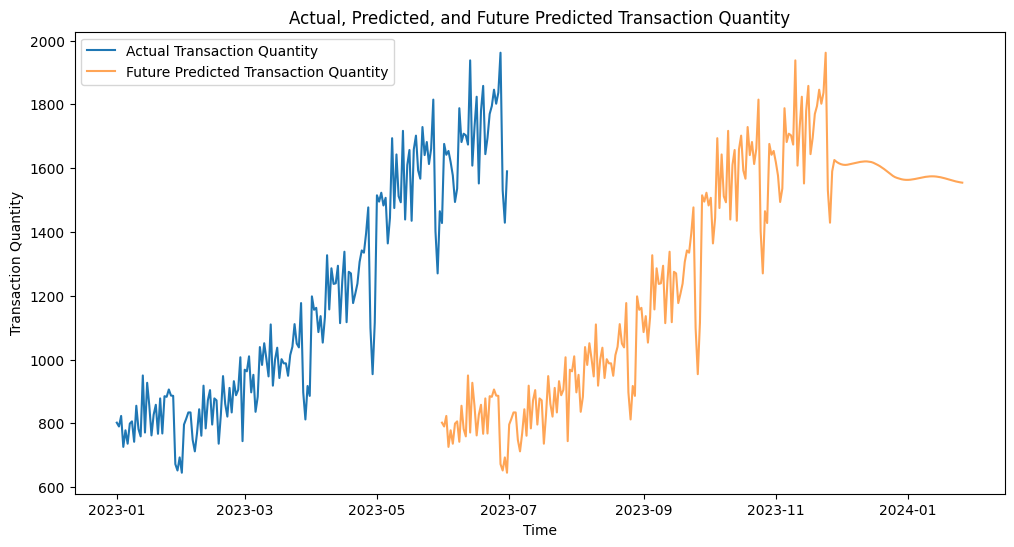

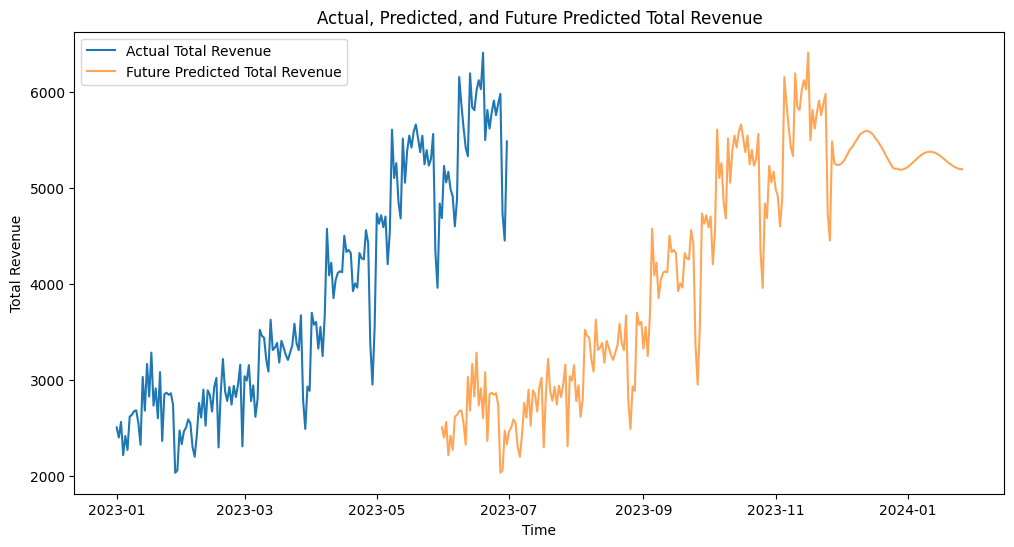

In [8]:
# Plot the actual, predicted, and future predicted values for transaction quantity
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Actual Transaction Quantity')
#plt.plot(daily_data.index[-len(y_qty_test_inverse):], y_qty_pred_inverse, label='Predicted Transaction Quantity', alpha=0.7)
plt.plot(combined_index, combined_qty, label='Future Predicted Transaction Quantity', alpha=0.7)
plt.title('Actual, Predicted, and Future Predicted Transaction Quantity')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.savefig('D:/Actual_and_Future_Predicted_Transaction_Quantity.png')
plt.show()

# Plot the actual, predicted, and future predicted values for total revenue
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Actual Total Revenue')
#plt.plot(daily_data.index[-len(y_revenue_test_inverse):], y_revenue_pred_inverse, label='Predicted Total Revenue', alpha=0.7)
plt.plot(combined_index, combined_revenue, label='Future Predicted Total Revenue', alpha=0.7)
plt.title('Actual, Predicted, and Future Predicted Total Revenue')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
plt.savefig('D:/Actual_and_Future_Predicted_Total_Revenue.png')
plt.show()

Epoch 1/100


C:\Users\Abdul Majid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - loss: 0.2082 - val_loss: 0.0926
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0560 - val_loss: 0.0084
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0139 - val_loss: 0.0241
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0324 - val_loss: 0.0107
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0152 - val_loss: 0.0074
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0113 - val_loss: 0.0128
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0142 - val_loss: 0.0130
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0137 - val_loss: 0.0090
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0118 - val_loss: 0.0061
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0104 - val_loss: 0.0059
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0107 - val_loss: 0.0058
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0112 - val_loss: 0.0056


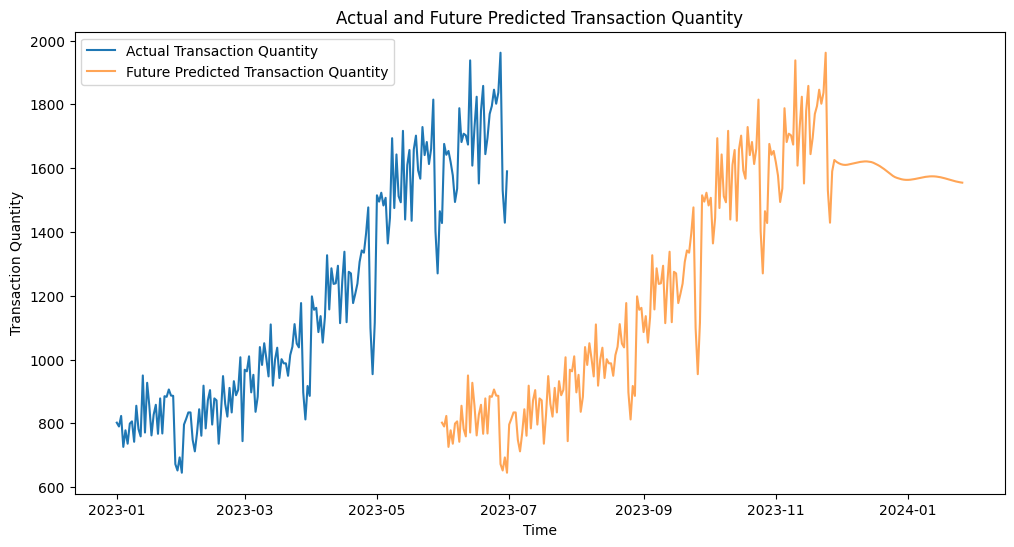

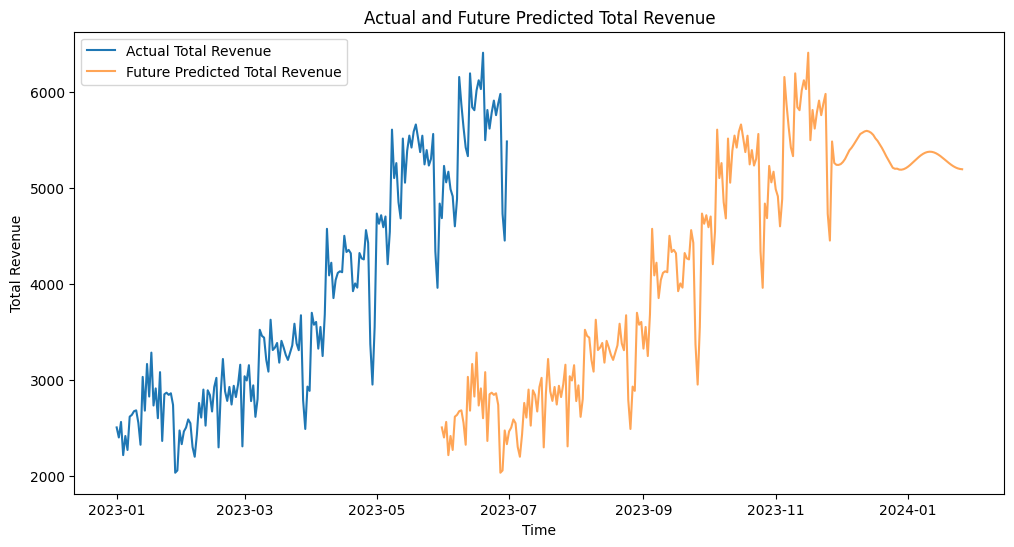

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the data and preprocess as before
df = pd.DataFrame(data)  # Assuming 'data' is your dataset
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str), errors='coerce')
df = df.dropna(subset=['transaction_datetime'])
df.set_index('transaction_datetime', inplace=True)
df['total_revenue'] = df['transaction_qty'] * df['unit_price']
daily_data = df[['transaction_qty', 'total_revenue']].resample('D').sum()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data)

# Prepare data for LSTM
seq_length = 30
X, y_qty, y_revenue = [], [], []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i + seq_length])
    y_qty.append(scaled_data[i + seq_length, 0])
    y_revenue.append(scaled_data[i + seq_length, 1])

X = np.array(X)
y_qty = np.array(y_qty)
y_revenue = np.array(y_revenue)

# Split the data into training and testing sets
X_train, X_test, y_qty_train, y_qty_test, y_revenue_train, y_revenue_test = train_test_split(X, y_qty, y_revenue, test_size=0.2, random_state=42)

# Define the LSTM model for predicting quantity
model_qty = Sequential()
model_qty.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model_qty.add(Dense(1))  # Output layer for quantity prediction
model_qty.compile(optimizer='adam', loss='mse')

# Train the model for quantity prediction
history_qty = model_qty.fit(X_train, y_qty_train, epochs=100, batch_size=32, validation_data=(X_test, y_qty_test), verbose=1)

# Predict using the trained quantity model
y_qty_pred = model_qty.predict(X_test)

# Define the LSTM model for predicting revenue
model_revenue = Sequential()
model_revenue.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model_revenue.add(Dense(1))  # Output layer for revenue prediction
model_revenue.compile(optimizer='adam', loss='mse')

# Train the model for revenue prediction
history_revenue = model_revenue.fit(X_train, y_revenue_train, epochs=100, batch_size=32, validation_data=(X_test, y_revenue_test), verbose=1)

# Predict using the trained revenue model
y_revenue_pred = model_revenue.predict(X_test)

# Inverse transform the predictions and actual values
y_qty_test_inverse = scaler.inverse_transform(np.column_stack((y_qty_test, np.zeros_like(y_qty_test))))[:, 0]
y_qty_pred_inverse = scaler.inverse_transform(np.column_stack((y_qty_pred[:,0], np.zeros_like(y_qty_pred[:,0]))))[:, 0]
y_revenue_test_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_test), y_revenue_test)))[:, 1]
y_revenue_pred_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_pred), y_revenue_pred)))[:, 1]

# Calculate the mean squared error
mse_qty = mean_squared_error(y_qty_test_inverse, y_qty_pred_inverse)
mse_revenue = mean_squared_error(y_revenue_test_inverse, y_revenue_pred_inverse)
print(f'Mean Squared Error (Quantity): {mse_qty}')
print(f'Mean Squared Error (Revenue): {mse_revenue}')

# Predict future values for both quantity and revenue
future_steps = 60
last_sequence = scaled_data[-seq_length:]
future_predictions_qty = []
future_predictions_revenue = []

for _ in range(future_steps):
    last_sequence_reshaped = last_sequence.reshape((1, seq_length, 2))
    
    # Predict next day's quantity and revenue
    next_qty = model_qty.predict(last_sequence_reshaped)[0, 0]
    next_revenue = model_revenue.predict(last_sequence_reshaped)[0, 0]
    
    # Append the predictions to the future predictions lists
    future_predictions_qty.append(next_qty)
    future_predictions_revenue.append(next_revenue)
    
    # Update the sequence by removing the oldest value and adding the new predictions
    next_values = np.array([next_qty, next_revenue]).reshape(1, -1)
    last_sequence = np.append(last_sequence[1:], next_values, axis=0)

# Inverse transform the future predictions
future_predictions_inverse = scaler.inverse_transform(np.array([future_predictions_qty, future_predictions_revenue]).T)
future_predictions_qty_inverse = future_predictions_inverse[:, 0]
future_predictions_revenue_inverse = future_predictions_inverse[:, 1]

# Combine the indices for plotting
historical_length = len(daily_data)
combined_index = pd.date_range(start=daily_data.index[-len(y_qty_test_inverse)], periods=historical_length + future_steps)

# Combine the actual, predicted, and future predicted values into a single series
combined_qty = np.concatenate([daily_data['transaction_qty'].values, future_predictions_qty_inverse])
combined_revenue = np.concatenate([daily_data['total_revenue'].values, future_predictions_revenue_inverse])

# Plot the actual, predicted, and future predicted values for transaction quantity
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Actual Transaction Quantity')
plt.plot(combined_index, combined_qty, label='Future Predicted Transaction Quantity', alpha=0.7)
plt.title('Actual and Future Predicted Transaction Quantity')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.show()

# Plot the actual, predicted, and future predicted values for total revenue
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Actual Total Revenue')
plt.plot(combined_index, combined_revenue, label='Future Predicted Total Revenue', alpha=0.7)
plt.title('Actual and Future Predicted Total Revenue')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()



19:13:08 - cmdstanpy - INFO - Chain [1] start processing
19:13:08 - cmdstanpy - INFO - Chain [1] done processing
19:13:09 - cmdstanpy - INFO - Chain [1] start processing
19:13:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (Quantity): 56057.28583786498
Root Mean Squared Error (Quantity): 236.76419880941668
Mean Squared Error (Revenue): 718766.143722394
Root Mean Squared Error (Revenue): 847.800768885234


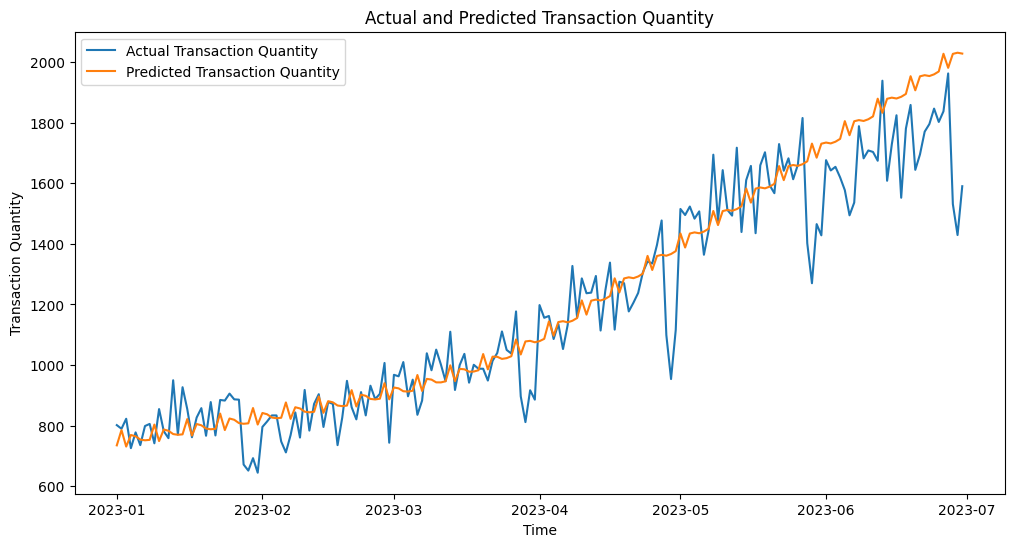

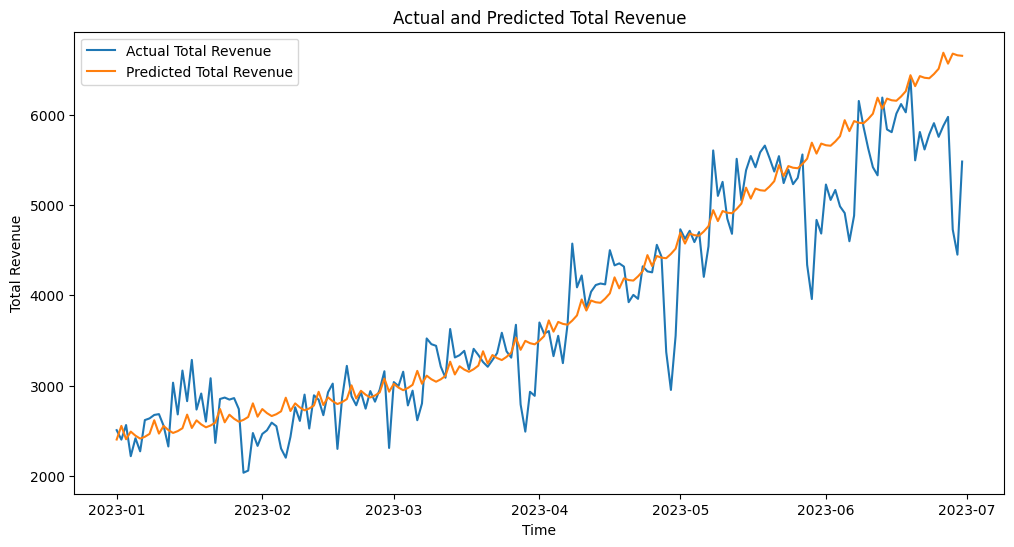

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# Load the data and preprocess
df = pd.DataFrame(data)  # Assuming 'data' is your dataset
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str), errors='coerce')
df = df.dropna(subset=['transaction_datetime'])
df.set_index('transaction_datetime', inplace=True)
df['total_revenue'] = df['transaction_qty'] * df['unit_price']
daily_data = df[['transaction_qty', 'total_revenue']].resample('D').sum()

# Split the data into training and testing sets
train_size = int(len(daily_data) * 0.8)
train_data = daily_data[:train_size]
test_data = daily_data[train_size:]

# Prepare the data for Prophet
prophet_train_qty = train_data.reset_index()[['transaction_datetime', 'transaction_qty']].rename(columns={'transaction_datetime': 'ds', 'transaction_qty': 'y'})
prophet_train_revenue = train_data.reset_index()[['transaction_datetime', 'total_revenue']].rename(columns={'transaction_datetime': 'ds', 'total_revenue': 'y'})

# Initialize and fit the Prophet models
model_qty = Prophet()
model_qty.fit(prophet_train_qty)

model_revenue = Prophet()
model_revenue.fit(prophet_train_revenue)

# Make future predictions
future_dates_qty = model_qty.make_future_dataframe(periods=len(test_data))
forecast_qty = model_qty.predict(future_dates_qty)

future_dates_revenue = model_revenue.make_future_dataframe(periods=len(test_data))
forecast_revenue = model_revenue.predict(future_dates_revenue)

# Extract the predicted values for the test period
forecast_qty_test = forecast_qty.set_index('ds').loc[test_data.index]['yhat']
forecast_revenue_test = forecast_revenue.set_index('ds').loc[test_data.index]['yhat']

# Calculate MSE and RMSE for transaction quantity
mse_qty = mean_squared_error(test_data['transaction_qty'], forecast_qty_test)
rmse_qty = np.sqrt(mse_qty)
print(f'Mean Squared Error (Quantity): {mse_qty}')
print(f'Root Mean Squared Error (Quantity): {rmse_qty}')

# Calculate MSE and RMSE for total revenue
mse_revenue = mean_squared_error(test_data['total_revenue'], forecast_revenue_test)
rmse_revenue = np.sqrt(mse_revenue)
print(f'Mean Squared Error (Revenue): {mse_revenue}')
print(f'Root Mean Squared Error (Revenue): {rmse_revenue}')

# Plot the results for transaction quantity
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Actual Transaction Quantity')
plt.plot(forecast_qty['ds'], forecast_qty['yhat'], label='Predicted Transaction Quantity')
plt.title('Actual and Predicted Transaction Quantity')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.savefig('D:/ Prophet_Transaction_quantity.png')
plt.show()

# Plot the results for total revenue
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Actual Total Revenue')
plt.plot(forecast_revenue['ds'], forecast_revenue['yhat'], label='Predicted Total Revenue')
plt.title('Actual and Predicted Total Revenue')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
plt.savefig('D:/prophet_Total_Revenue.png')
plt.show()


20:29:38 - cmdstanpy - INFO - Chain [1] start processing
20:29:38 - cmdstanpy - INFO - Chain [1] done processing
20:29:39 - cmdstanpy - INFO - Chain [1] start processing
20:29:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (Quantity): 56057.28583786498
Root Mean Squared Error (Quantity): 236.76419880941668
Mean Squared Error (Revenue): 718766.143722394
Root Mean Squared Error (Revenue): 847.800768885234


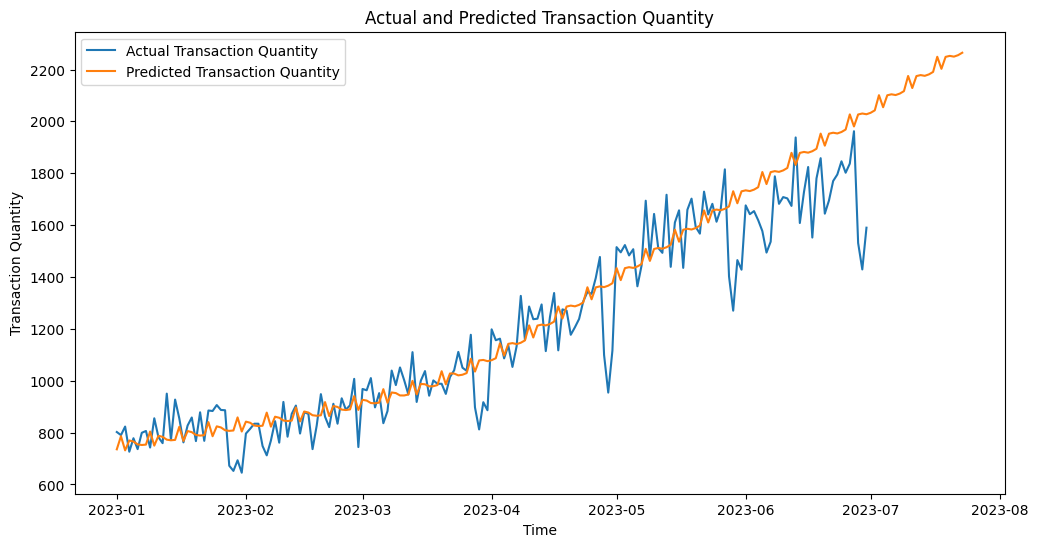

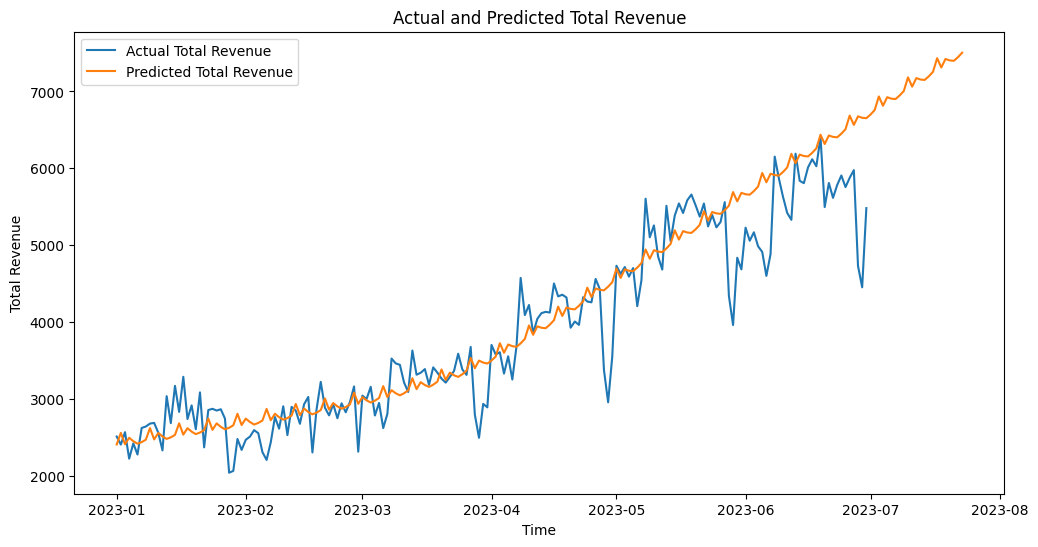

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# Load the data and preprocess
df = pd.DataFrame(data)  # Assuming 'data' is your dataset
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str), errors='coerce')
df = df.dropna(subset=['transaction_datetime'])
df.set_index('transaction_datetime', inplace=True)
df['total_revenue'] = df['transaction_qty'] * df['unit_price']
daily_data = df[['transaction_qty', 'total_revenue']].resample('D').sum()

# Split the data into training and testing sets
train_size = int(len(daily_data) * 0.8)
train_data = daily_data[:train_size]
test_data = daily_data[train_size:]

# Prepare the data for Prophet
prophet_train_qty = train_data.reset_index()[['transaction_datetime', 'transaction_qty']].rename(columns={'transaction_datetime': 'ds', 'transaction_qty': 'y'})
prophet_train_revenue = train_data.reset_index()[['transaction_datetime', 'total_revenue']].rename(columns={'transaction_datetime': 'ds', 'total_revenue': 'y'})

# Initialize and fit the Prophet models
model_qty = Prophet()
model_qty.fit(prophet_train_qty)

model_revenue = Prophet()
model_revenue.fit(prophet_train_revenue)

# Make future predictions for two months (approximately 60 days)
future_dates_qty = model_qty.make_future_dataframe(periods=60)
forecast_qty = model_qty.predict(future_dates_qty)

future_dates_revenue = model_revenue.make_future_dataframe(periods=60)
forecast_revenue = model_revenue.predict(future_dates_revenue)

# Extract the predicted values for the test period
forecast_qty_test = forecast_qty.set_index('ds').loc[test_data.index]['yhat']
forecast_revenue_test = forecast_revenue.set_index('ds').loc[test_data.index]['yhat']

# Calculate MSE and RMSE for transaction quantity
mse_qty = mean_squared_error(test_data['transaction_qty'], forecast_qty_test)
rmse_qty = np.sqrt(mse_qty)
print(f'Mean Squared Error (Quantity): {mse_qty}')
print(f'Root Mean Squared Error (Quantity): {rmse_qty}')

# Calculate MSE and RMSE for total revenue
mse_revenue = mean_squared_error(test_data['total_revenue'], forecast_revenue_test)
rmse_revenue = np.sqrt(mse_revenue)
print(f'Mean Squared Error (Revenue): {mse_revenue}')
print(f'Root Mean Squared Error (Revenue): {rmse_revenue}')

# Plot the results for transaction quantity
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Actual Transaction Quantity')
plt.plot(forecast_qty['ds'], forecast_qty['yhat'], label='Predicted Transaction Quantity')
plt.title('Actual and Predicted Transaction Quantity')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.savefig('D:/ Prophet_Transaction_quantity.png')
plt.show()

# Plot the results for total revenue
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Actual Total Revenue')
plt.plot(forecast_revenue['ds'], forecast_revenue['yhat'], label='Predicted Total Revenue')
plt.title('Actual and Predicted Total Revenue')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
plt.savefig('D:/prophet_Total_Revenue.png')
plt.show()


Epoch 1/200


C:\Users\Abdul Majid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.1205 - val_loss: 0.0204
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0387 - val_loss: 0.0086
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0164 - val_loss: 0.0143
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0153 - val_loss: 0.0134
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0132 - val_loss: 0.0058
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0118 - val_loss: 0.0060
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0110 - val_loss: 0.0060
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0089 - val_loss: 0.0080
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0099 - val_loss: 0.0074
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0086 - val_loss: 0.0065
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0089 - val_loss: 0.0058
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0093 - val_loss: 0.0059
E

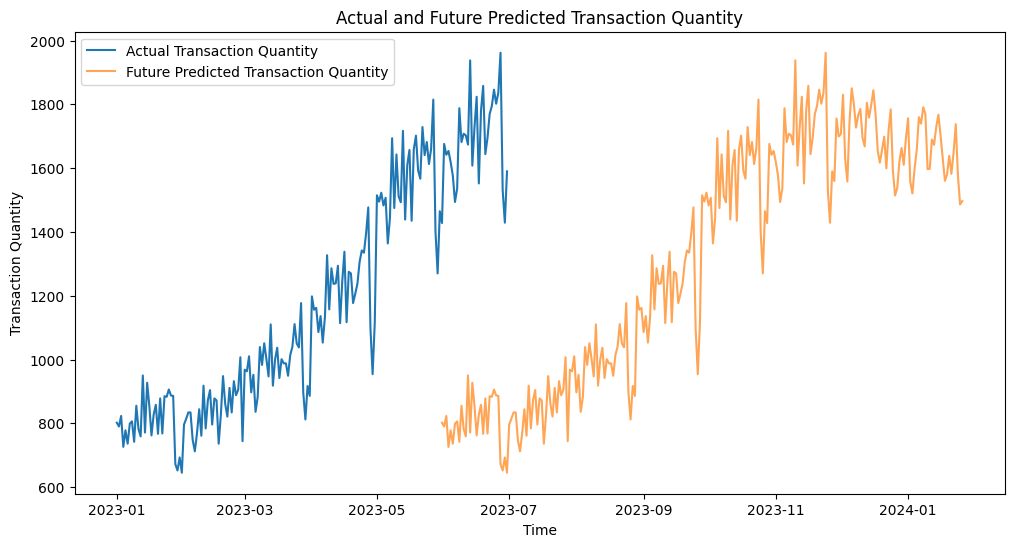

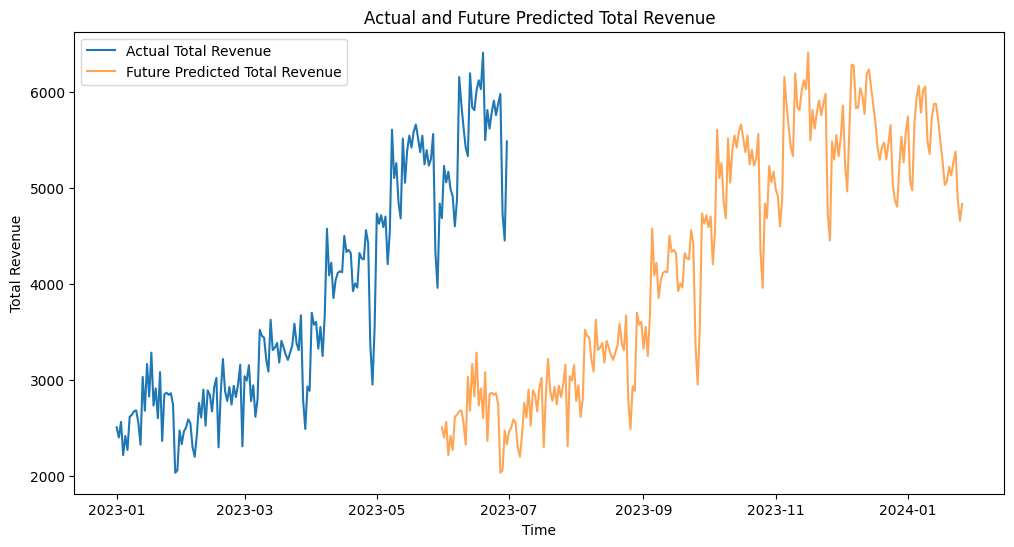

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense

# Load the data and preprocess as before
df = pd.DataFrame(data)  # Assuming 'data' is your dataset
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str), errors='coerce')
df = df.dropna(subset=['transaction_datetime'])
df.set_index('transaction_datetime', inplace=True)
df['total_revenue'] = df['transaction_qty'] * df['unit_price']
daily_data = df[['transaction_qty', 'total_revenue']].resample('D').sum()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data)

# Prepare data for ConvLSTM
seq_length = 30
X, y_qty, y_revenue = [], [], []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i + seq_length])
    y_qty.append(scaled_data[i + seq_length, 0])
    y_revenue.append(scaled_data[i + seq_length, 1])

X = np.array(X)
y_qty = np.array(y_qty)
y_revenue = np.array(y_revenue)

# Split the data into training and testing sets
X_train, X_test, y_qty_train, y_qty_test, y_revenue_train, y_revenue_test = train_test_split(X, y_qty, y_revenue, test_size=0.2, random_state=42)

# Define the ConvLSTM model for predicting quantity
model_qty = Sequential()
model_qty.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length, X_train.shape[2])))
model_qty.add(MaxPooling1D(pool_size=2))
model_qty.add(Flatten())
model_qty.add(Dense(50, activation='relu'))
model_qty.add(Dense(1))  # Output layer for quantity prediction
model_qty.compile(optimizer='adam', loss='mse')

# Train the model for quantity prediction
history_qty = model_qty.fit(X_train, y_qty_train, epochs=200, batch_size=32, validation_data=(X_test, y_qty_test), verbose=1)

# Predict using the trained quantity model
y_qty_pred = model_qty.predict(X_test)

# Define the ConvLSTM model for predicting revenue
model_revenue = Sequential()
model_revenue.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length, X_train.shape[2])))
model_revenue.add(MaxPooling1D(pool_size=2))
model_revenue.add(Flatten())
model_revenue.add(Dense(50, activation='relu'))
model_revenue.add(Dense(1))  # Output layer for revenue prediction
model_revenue.compile(optimizer='adam', loss='mse')

# Train the model for revenue prediction
history_revenue = model_revenue.fit(X_train, y_revenue_train, epochs=200, batch_size=32, validation_data=(X_test, y_revenue_test), verbose=1)

# Predict using the trained revenue model
y_revenue_pred = model_revenue.predict(X_test)

# Inverse transform the predictions and actual values
y_qty_test_inverse = scaler.inverse_transform(np.column_stack((y_qty_test, np.zeros_like(y_qty_test))))[:, 0]
y_qty_pred_inverse = scaler.inverse_transform(np.column_stack((y_qty_pred[:, 0], np.zeros_like(y_qty_pred[:, 0]))))[:, 0]
y_revenue_test_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_test), y_revenue_test)))[:, 1]
y_revenue_pred_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_pred), y_revenue_pred)))[:, 1]

# Calculate the mean squared error
mse_qty = mean_squared_error(y_qty_test_inverse, y_qty_pred_inverse)
mse_revenue = mean_squared_error(y_revenue_test_inverse, y_revenue_pred_inverse)
print(f'Mean Squared Error (Quantity): {mse_qty}')
print(f'Mean Squared Error (Revenue): {mse_revenue}')

# Predict future values for both quantity and revenue
future_steps = 60
last_sequence = scaled_data[-seq_length:]
future_predictions_qty = []
future_predictions_revenue = []

for _ in range(future_steps):
    last_sequence_reshaped = last_sequence.reshape((1, seq_length, 2))
    
    # Predict next day's quantity and revenue
    next_qty = model_qty.predict(last_sequence_reshaped)[0, 0]
    next_revenue = model_revenue.predict(last_sequence_reshaped)[0, 0]
    
    # Append the predictions to the future predictions lists
    future_predictions_qty.append(next_qty)
    future_predictions_revenue.append(next_revenue)
    
    # Update the sequence by removing the oldest value and adding the new predictions
    next_values = np.array([next_qty, next_revenue]).reshape(1, -1)
    last_sequence = np.append(last_sequence[1:], next_values, axis=0)

# Inverse transform the future predictions
future_predictions_inverse = scaler.inverse_transform(np.array([future_predictions_qty, future_predictions_revenue]).T)
future_predictions_qty_inverse = future_predictions_inverse[:, 0]
future_predictions_revenue_inverse = future_predictions_inverse[:, 1]

# Combine the indices for plotting
historical_length = len(daily_data)
combined_index = pd.date_range(start=daily_data.index[-len(y_qty_test_inverse)], periods=historical_length + future_steps)

# Combine the actual, predicted, and future predicted values into a single series
combined_qty = np.concatenate([daily_data['transaction_qty'].values, future_predictions_qty_inverse])
combined_revenue = np.concatenate([daily_data['total_revenue'].values, future_predictions_revenue_inverse])

# Plot the actual, predicted, and future predicted values for transaction quantity
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Actual Transaction Quantity')
plt.plot(combined_index, combined_qty, label='Future Predicted Transaction Quantity', alpha=0.7)
plt.title('Actual and Future Predicted Transaction Quantity')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.savefig('D:/Conv1D_Total_Quantity.png')
plt.show()

# Plot the actual, predicted, and future predicted values for total revenue
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Actual Total Revenue')
plt.plot(combined_index, combined_revenue, label='Future Predicted Total Revenue', alpha=0.7)
plt.title('Actual and Future Predicted Total Revenue')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
plt.savefig('D:/Conv1D_Total_Revenue.png')
plt.show()


Mean Squared Error (Quantity): 16601.77974204836
Mean Squared Error (Revenue): 133618.03983542265


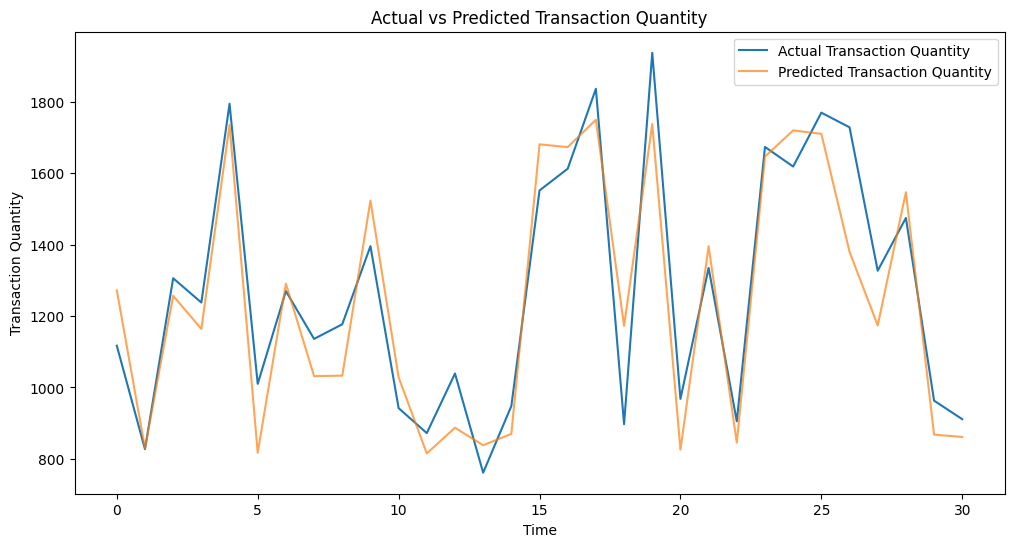

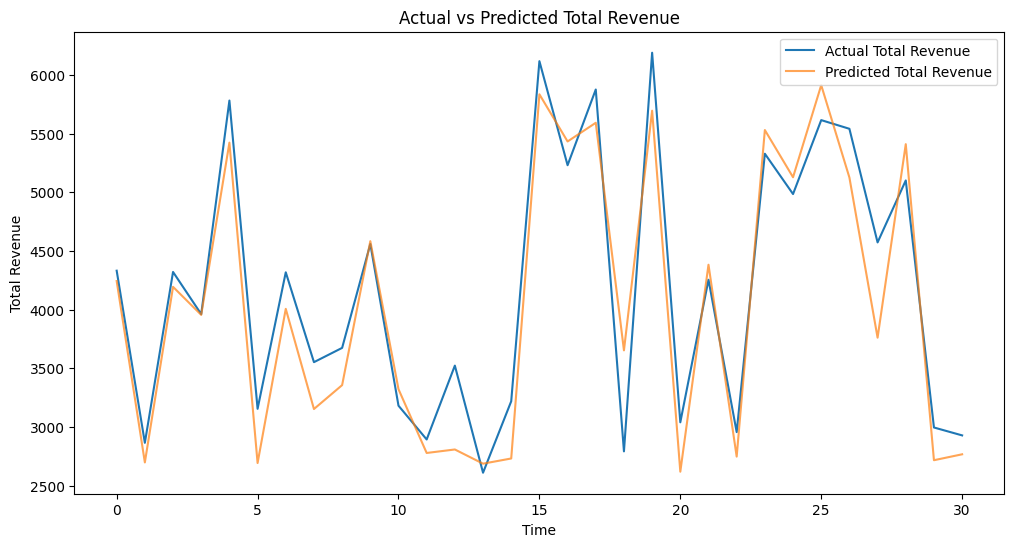

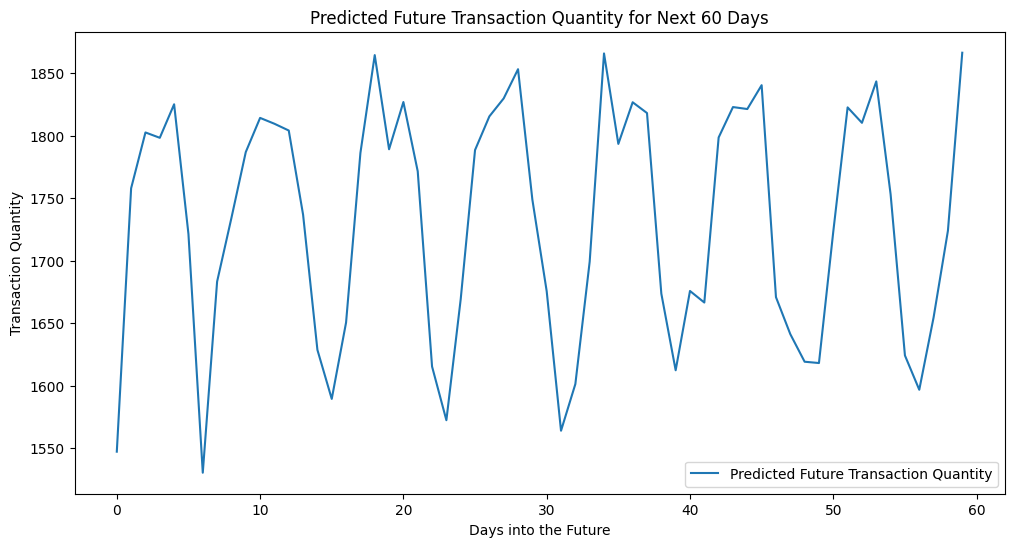

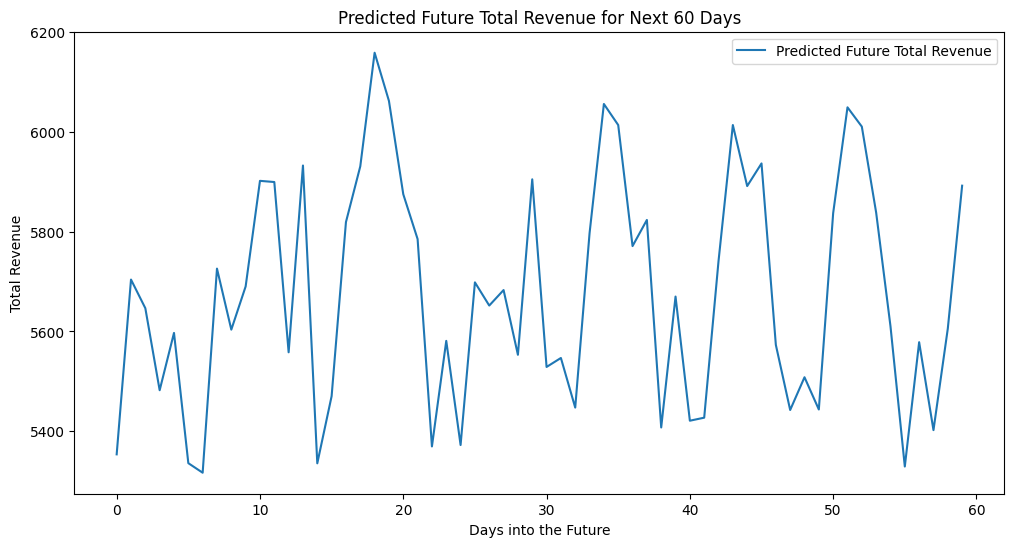

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Load the data
#data = pd.read_excel("D:/intership work/Coffee Shop Sales.xlsx")
#df = pd.DataFrame(data)

# Combine 'transaction_date' and 'transaction_time' into a single datetime column
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str), errors='coerce')

# Drop rows with invalid 'transaction_datetime'
df = df.dropna(subset=['transaction_datetime'])

# Set 'transaction_datetime' as index
df.set_index('transaction_datetime', inplace=True)

# Calculate 'total_revenue'
df['total_revenue'] = df['transaction_qty'] * df['unit_price']

# Resample and sum by day, selecting only the relevant numeric columns
numeric_columns = ['transaction_qty', 'total_revenue']
daily_data = df[numeric_columns].resample('D').sum()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data)

# Create features and labels
seq_length = 30  # Sequence length of 30 days
X = []
y_qty = []
y_revenue = []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i + seq_length])
    y_qty.append(scaled_data[i + seq_length, 0])
    y_revenue.append(scaled_data[i + seq_length, 1])

X = np.array(X)
y_qty = np.array(y_qty)
y_revenue = np.array(y_revenue)

# Split the data into training and testing sets
X_train, X_test, y_qty_train, y_qty_test, y_revenue_train, y_revenue_test = train_test_split(X, y_qty, y_revenue, test_size=0.2, random_state=42)

# Reshape the data to 2D for Gradient Boosting input
X_train_reshaped = X_train.reshape((X_train.shape[0], -1))
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))

# Train Gradient Boosting Regressor for transaction quantity
gb_qty = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_qty.fit(X_train_reshaped, y_qty_train)

# Train Gradient Boosting Regressor for total revenue
gb_revenue = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_revenue.fit(X_train_reshaped, y_revenue_train)

# Make predictions
y_qty_pred = gb_qty.predict(X_test_reshaped)
y_revenue_pred = gb_revenue.predict(X_test_reshaped)

# Inverse transform the predictions and actual values
y_qty_test_inverse = scaler.inverse_transform(np.column_stack((y_qty_test, np.zeros_like(y_qty_test))))[:, 0]
y_revenue_test_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_test), y_revenue_test)))[:, 1]
y_qty_pred_inverse = scaler.inverse_transform(np.column_stack((y_qty_pred, np.zeros_like(y_qty_pred))))[:, 0]
y_revenue_pred_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_pred), y_revenue_pred)))[:, 1]

# Calculate the mean squared error
mse_qty = mean_squared_error(y_qty_test_inverse, y_qty_pred_inverse)
mse_revenue = mean_squared_error(y_revenue_test_inverse, y_revenue_pred_inverse)
print(f'Mean Squared Error (Quantity): {mse_qty}')
print(f'Mean Squared Error (Revenue): {mse_revenue}')

# Plot the actual vs predicted values for transaction quantity and total revenue
plt.figure(figsize=(12, 6))
plt.plot(y_qty_test_inverse, label='Actual Transaction Quantity')
plt.plot(y_qty_pred_inverse, label='Predicted Transaction Quantity', alpha=0.7)
plt.title('Actual vs Predicted Transaction Quantity')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_revenue_test_inverse, label='Actual Total Revenue')
plt.plot(y_revenue_pred_inverse, label='Predicted Total Revenue', alpha=0.7)
plt.title('Actual vs Predicted Total Revenue')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()

# Predict two months into the future
future_steps = 60  # Predicting 60 days into the future
last_sequence = scaled_data[-seq_length:]  # Start with the last available sequence

future_predictions_qty = []
future_predictions_revenue = []

for _ in range(future_steps):
    last_sequence_reshaped = last_sequence.reshape((1, -1))
    
    # Predict next day's transaction quantity and total revenue
    next_qty = gb_qty.predict(last_sequence_reshaped)[0]
    next_revenue = gb_revenue.predict(last_sequence_reshaped)[0]
    
    # Append the predictions to the future predictions list
    future_predictions_qty.append(next_qty)
    future_predictions_revenue.append(next_revenue)
    
    # Update the sequence by removing the oldest value and adding the new predictions
    next_values = np.array([next_qty, next_revenue]).reshape(1, -1)
    last_sequence = np.append(last_sequence[1:], next_values, axis=0)

# Inverse transform the future predictions
future_predictions_qty_inverse = scaler.inverse_transform(np.column_stack((future_predictions_qty, np.zeros_like(future_predictions_qty))))[:, 0]
future_predictions_revenue_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(future_predictions_revenue), future_predictions_revenue)))[:, 1]

# Plot the future predictions
plt.figure(figsize=(12, 6))
plt.plot(future_predictions_qty_inverse, label='Predicted Future Transaction Quantity')
plt.title('Predicted Future Transaction Quantity for Next 60 Days')
plt.xlabel('Days into the Future')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(future_predictions_revenue_inverse, label='Predicted Future Total Revenue')
plt.title('Predicted Future Total Revenue for Next 60 Days')
plt.xlabel('Days into the Future')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()


C:\Users\Abdul Majid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - loss: 0.1649 - val_loss: 0.0467
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0514 - val_loss: 0.0227
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0200 - val_loss: 0.0171
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0174 - val_loss: 0.0229
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0177 - val_loss: 0.0126
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0104 - val_loss: 0.0128
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0111 - val_loss: 0.0135
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0097 - val_loss: 0.0111
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0081 - val_loss: 0.0125
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0092 - val_loss: 0.0120
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0093 - val_loss: 0.0106
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0088 - val_l

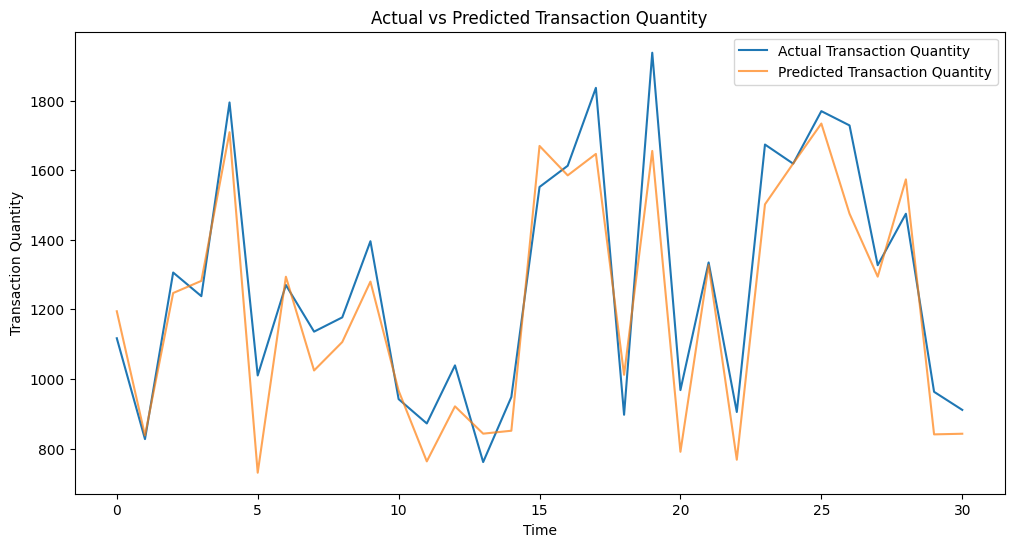

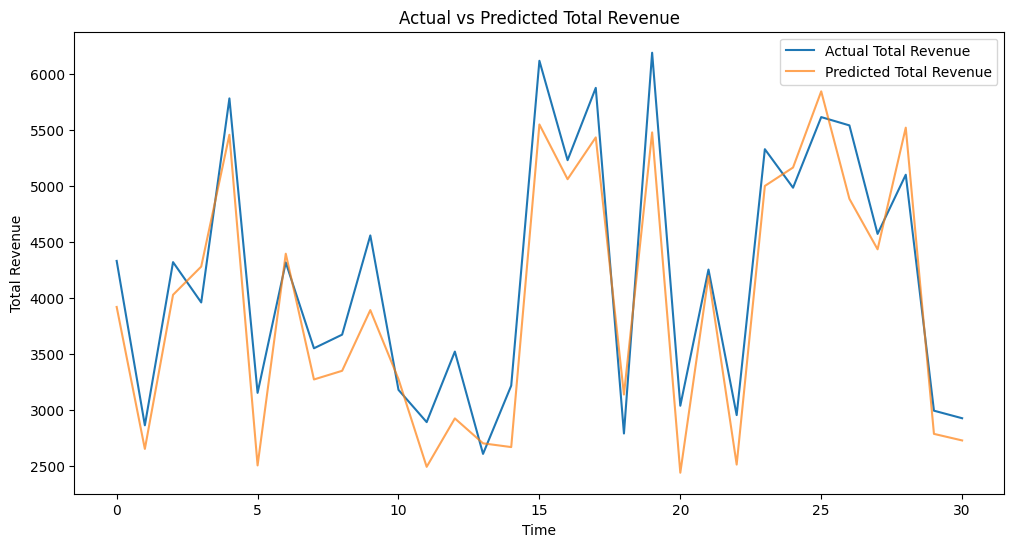

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━

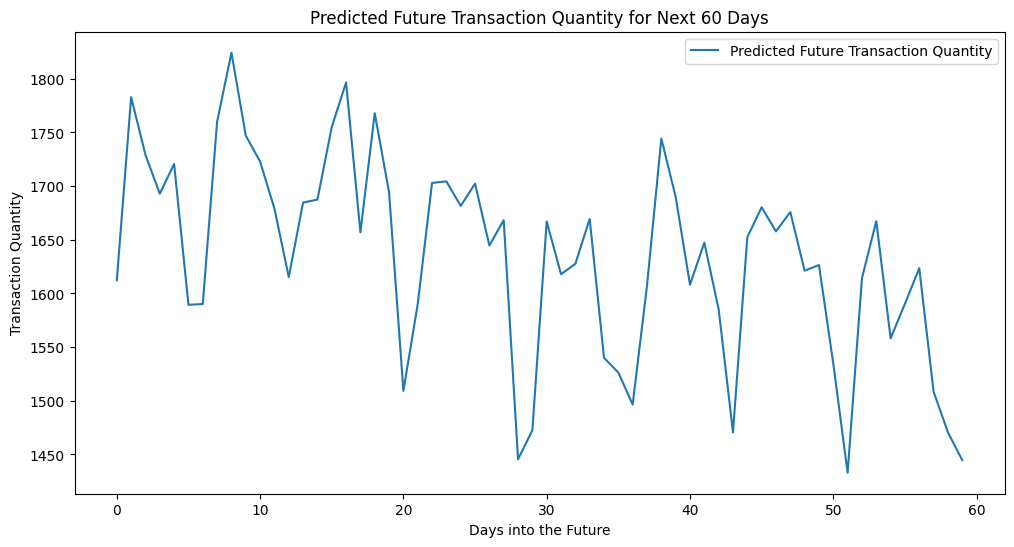

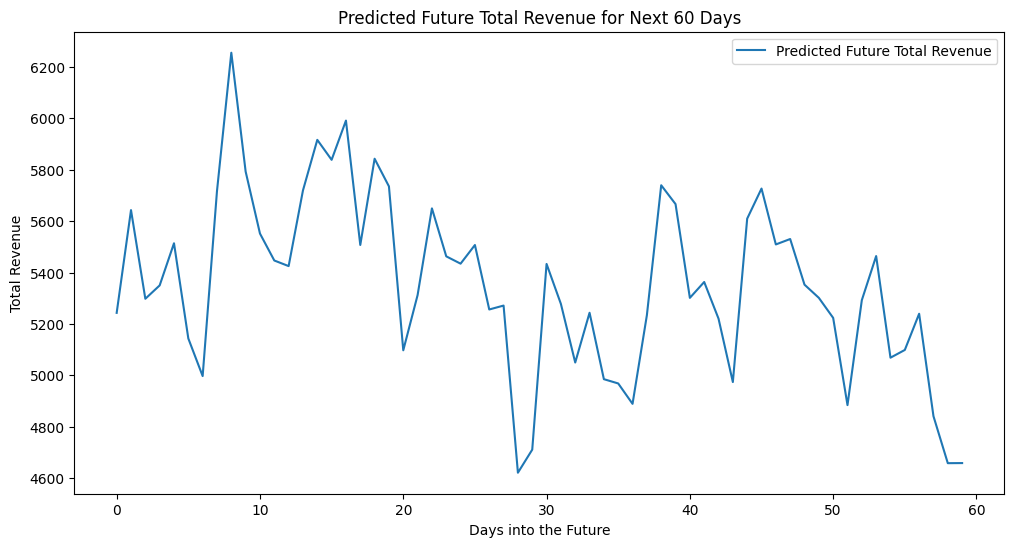

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split

# Load the data
#data = pd.read_excel("D:/intership work/Coffee Shop Sales.xlsx")
#df = pd.DataFrame(data)

# Combine 'transaction_date' and 'transaction_time' into a single datetime column
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str), errors='coerce')

# Drop rows with invalid 'transaction_datetime'
df = df.dropna(subset=['transaction_datetime'])

# Set 'transaction_datetime' as index
df.set_index('transaction_datetime', inplace=True)

# Calculate 'total_revenue'
df['total_revenue'] = df['transaction_qty'] * df['unit_price']

# Resample and sum by day, selecting only the relevant numeric columns
numeric_columns = ['transaction_qty', 'total_revenue']
daily_data = df[numeric_columns].resample('D').sum()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data)

# Create features and labels
seq_length = 30  # Sequence length of 30 days
X = []
y_qty = []
y_revenue = []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i + seq_length])
    y_qty.append(scaled_data[i + seq_length, 0])
    y_revenue.append(scaled_data[i + seq_length, 1])

X = np.array(X)
y_qty = np.array(y_qty)
y_revenue = np.array(y_revenue)

# Split the data into training and testing sets
X_train, X_test, y_qty_train, y_qty_test, y_revenue_train, y_revenue_test = train_test_split(X, y_qty, y_revenue, test_size=0.2, random_state=42)

# Reshape the data to 3D for CNN input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(2))  # Two outputs: transaction_qty and total_revenue

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, np.column_stack((y_qty_train, y_revenue_train)), epochs=150, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test_inverse = scaler.inverse_transform(np.column_stack((y_qty_test, y_revenue_test)))
y_pred_inverse = scaler.inverse_transform(y_pred)

# Calculate the mean squared error
mse_qty = mean_squared_error(y_test_inverse[:, 0], y_pred_inverse[:, 0])
mse_revenue = mean_squared_error(y_test_inverse[:, 1], y_pred_inverse[:, 1])
print(f'Mean Squared Error (Quantity): {mse_qty}')
print(f'Mean Squared Error (Revenue): {mse_revenue}')

# Plot the actual vs predicted values for transaction quantity and total revenue
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse[:, 0], label='Actual Transaction Quantity')
plt.plot(y_pred_inverse[:, 0], label='Predicted Transaction Quantity', alpha=0.7)
plt.title('Actual vs Predicted Transaction Quantity')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse[:, 1], label='Actual Total Revenue')
plt.plot(y_pred_inverse[:, 1], label='Predicted Total Revenue', alpha=0.7)
plt.title('Actual vs Predicted Total Revenue')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()

# Predict two months into the future
future_steps = 60  # Predicting 60 days into the future
last_sequence = scaled_data[-seq_length:]  # Start with the last available sequence

future_predictions = []

for _ in range(future_steps):
    last_sequence_reshaped = last_sequence.reshape((1, seq_length, 2))
    
    # Predict next day's transaction quantity and total revenue
    next_prediction = model.predict(last_sequence_reshaped)[0]
    
    # Append the predictions to the future predictions list
    future_predictions.append(next_prediction)
    
    # Update the sequence by removing the oldest value and adding the new predictions
    last_sequence = np.append(last_sequence[1:], next_prediction.reshape(1, -1), axis=0)

future_predictions = np.array(future_predictions)

# Inverse transform the future predictions
future_predictions_inverse = scaler.inverse_transform(future_predictions)

# Plot the future predictions
plt.figure(figsize=(12, 6))
plt.plot(future_predictions_inverse[:, 0], label='Predicted Future Transaction Quantity')
plt.title('Predicted Future Transaction Quantity for Next 60 Days')
plt.xlabel('Days into the Future')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(future_predictions_inverse[:, 1], label='Predicted Future Total Revenue')
plt.title('Predicted Future Total Revenue for Next 60 Days')
plt.xlabel('Days into the Future')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()


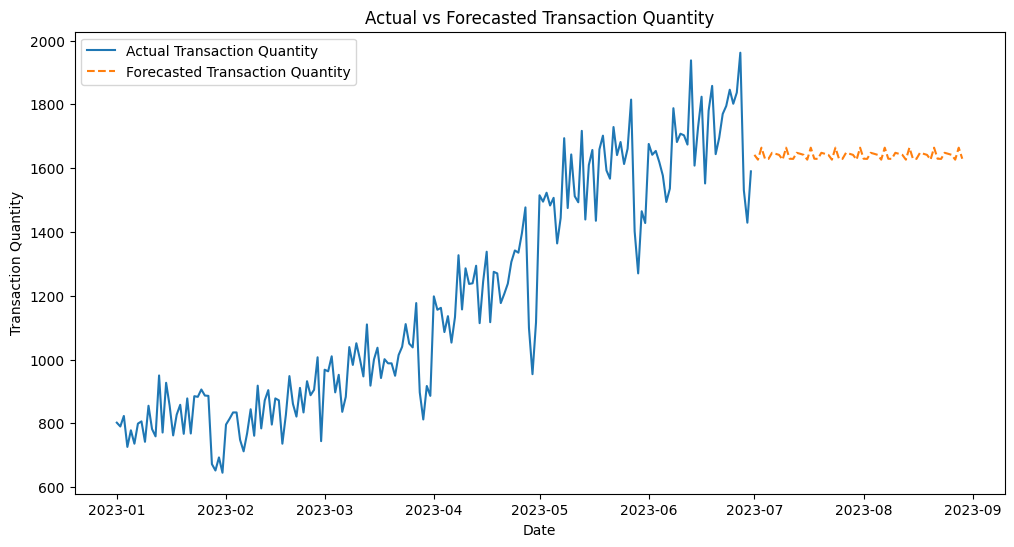

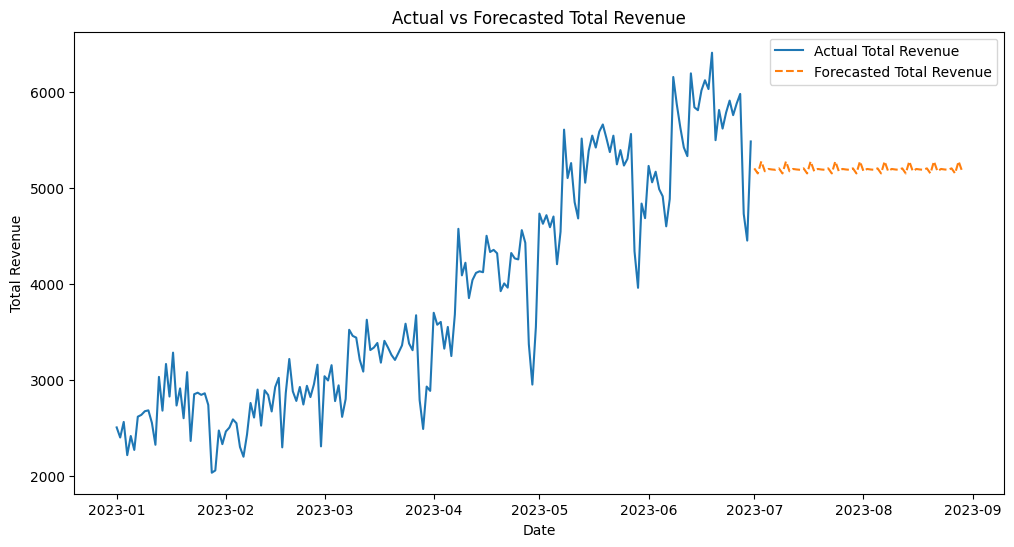

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data (assuming 'data' is your dataset)
df = pd.DataFrame(data)

# Combine 'transaction_date' and 'transaction_time' into a single datetime column
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str), errors='coerce')

# Drop rows with invalid 'transaction_datetime'
df = df.dropna(subset=['transaction_datetime'])

# Set 'transaction_datetime' as index
df.set_index('transaction_datetime', inplace=True)

# Calculate 'total_revenue'
df['total_revenue'] = df['transaction_qty'] * df['unit_price']

# Resample and sum by day, selecting only the relevant numeric columns
numeric_columns = ['transaction_qty', 'total_revenue']
daily_data = df[numeric_columns].resample('D').sum()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data)

# Apply Exponential Smoothing (ETS) for transaction quantity
qty_ets = ExponentialSmoothing(daily_data['transaction_qty'], seasonal='add').fit()

# Apply Exponential Smoothing (ETS) for total revenue
revenue_ets = ExponentialSmoothing(daily_data['total_revenue'], seasonal='add').fit()

# Forecast future steps (e.g., 60 days)
future_steps = 60
future_qty_ets = qty_ets.forecast(future_steps)
future_revenue_ets = revenue_ets.forecast(future_steps)

# Plotting example: Replace with your specific plotting code as needed
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Actual Transaction Quantity')
plt.plot(future_qty_ets.index, future_qty_ets.values, label='Forecasted Transaction Quantity', linestyle='--')
plt.title('Actual vs Forecasted Transaction Quantity')
plt.xlabel('Date')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Actual Total Revenue')
plt.plot(future_revenue_ets.index, future_revenue_ets.values, label='Forecasted Total Revenue', linestyle='--')
plt.title('Actual vs Forecasted Total Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()


Mean Squared Error (Quantity): 21169.735890293385
Root Mean Squared Error (Quantity): 145.49823328925126
Mean Squared Error (Revenue): 306149.7550929039
Root Mean Squared Error (Revenue): 553.3080110507202


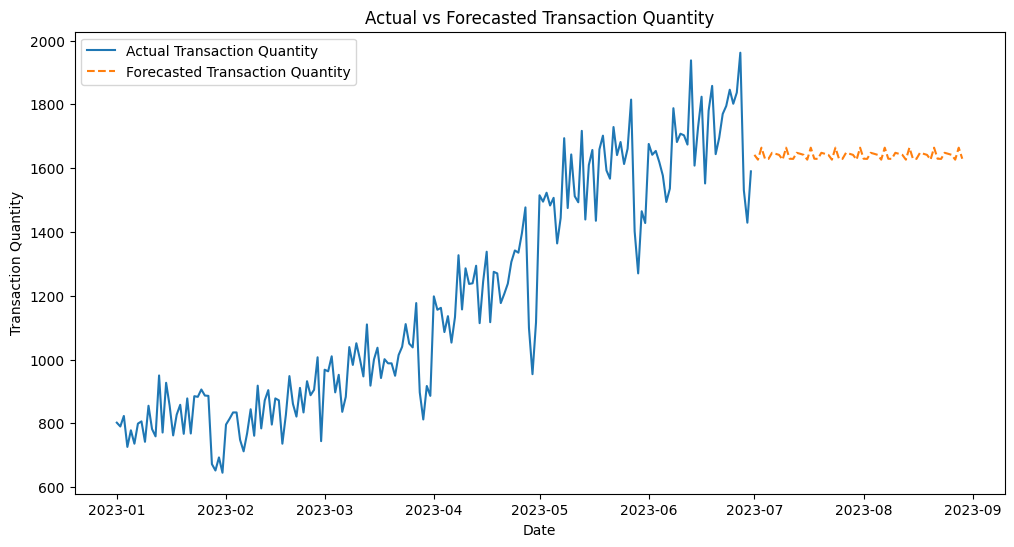

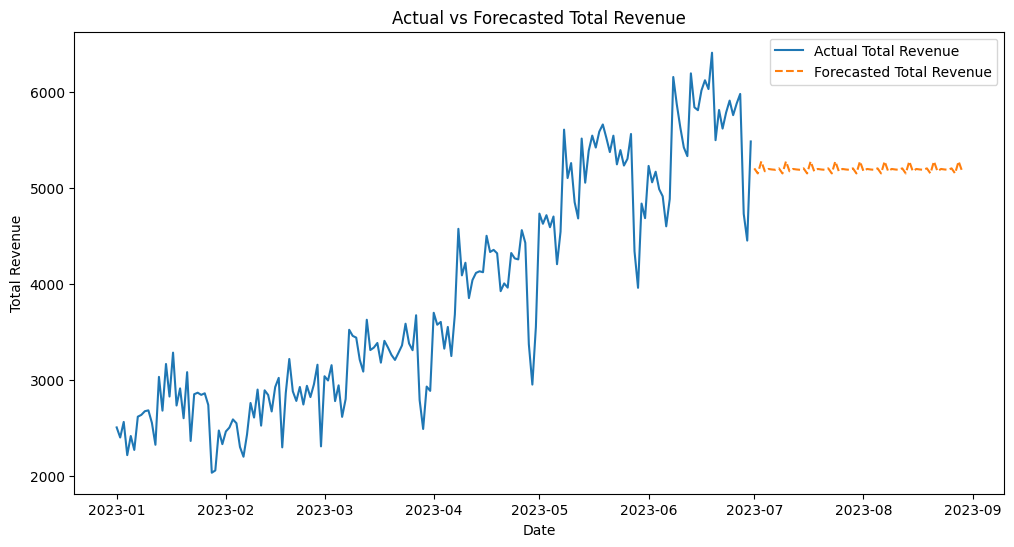

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data (assuming 'data' is your dataset)
df = pd.DataFrame(data)

# Combine 'transaction_date' and 'transaction_time' into a single datetime column
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str), errors='coerce')

# Drop rows with invalid 'transaction_datetime'
df = df.dropna(subset=['transaction_datetime'])

# Set 'transaction_datetime' as index
df.set_index('transaction_datetime', inplace=True)

# Calculate 'total_revenue'
df['total_revenue'] = df['transaction_qty'] * df['unit_price']

# Resample and sum by day, selecting only the relevant numeric columns
numeric_columns = ['transaction_qty', 'total_revenue']
daily_data = df[numeric_columns].resample('D').sum()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data)

# Apply Exponential Smoothing (ETS) for transaction quantity
qty_ets = ExponentialSmoothing(daily_data['transaction_qty'], seasonal='add').fit()

# Apply Exponential Smoothing (ETS) for total revenue
revenue_ets = ExponentialSmoothing(daily_data['total_revenue'], seasonal='add').fit()

# Forecast future steps (e.g., 60 days)
future_steps = 60
future_qty_ets = qty_ets.forecast(future_steps)
future_revenue_ets = revenue_ets.forecast(future_steps)

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for transaction quantity
y_qty_actual = daily_data['transaction_qty'].iloc[-future_steps:]
mse_qty = mean_squared_error(y_qty_actual, future_qty_ets)
rmse_qty = np.sqrt(mse_qty)

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for total revenue
y_revenue_actual = daily_data['total_revenue'].iloc[-future_steps:]
mse_revenue = mean_squared_error(y_revenue_actual, future_revenue_ets)
rmse_revenue = np.sqrt(mse_revenue)

# Print MSE and RMSE
print(f'Mean Squared Error (Quantity): {mse_qty}')
print(f'Root Mean Squared Error (Quantity): {rmse_qty}')
print(f'Mean Squared Error (Revenue): {mse_revenue}')
print(f'Root Mean Squared Error (Revenue): {rmse_revenue}')

# Plotting example: Replace with your specific plotting code as needed
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Actual Transaction Quantity')
plt.plot(future_qty_ets.index, future_qty_ets.values, label='Forecasted Transaction Quantity', linestyle='--')
plt.title('Actual vs Forecasted Transaction Quantity')
plt.xlabel('Date')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.savefig('D:/Expoenetial_quantity.png')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Actual Total Revenue')
plt.plot(future_revenue_ets.index, future_revenue_ets.values, label='Forecasted Total Revenue', linestyle='--')
plt.title('Actual vs Forecasted Total Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend()
plt.savefig('D:/Expoenetial_Total_Revenue.png')
plt.show()


C:\Users\Abdul Majid\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Abdul Majid\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error (Quantity): 84243.66728448606
Root Mean Squared Error (Quantity): 290.2475965180178
Mean Squared Error (Revenue): 326094.57861158455
Root Mean Squared Error (Revenue): 571.0469145451926


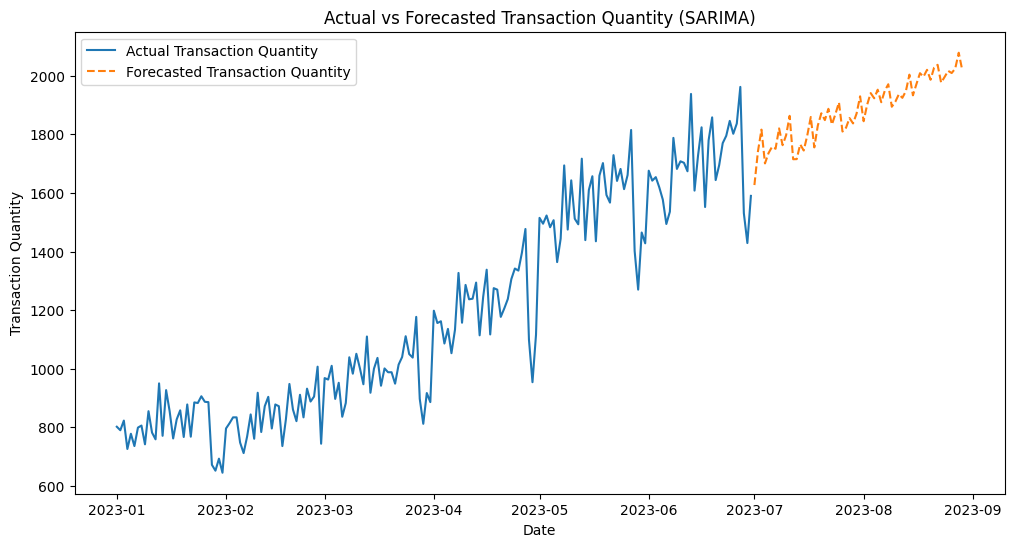

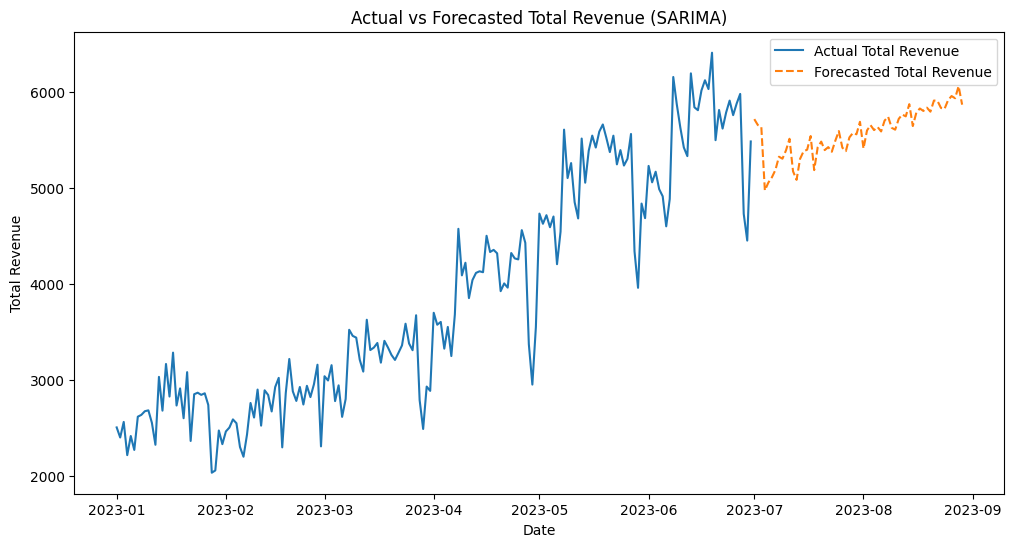

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data (assuming 'data' is your dataset)
df = pd.DataFrame(data)

# Combine 'transaction_date' and 'transaction_time' into a single datetime column
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str), errors='coerce')

# Drop rows with invalid 'transaction_datetime'
df = df.dropna(subset=['transaction_datetime'])

# Set 'transaction_datetime' as index
df.set_index('transaction_datetime', inplace=True)

# Calculate 'total_revenue'
df['total_revenue'] = df['transaction_qty'] * df['unit_price']

# Resample and sum by day, selecting only the relevant numeric columns
numeric_columns = ['transaction_qty', 'total_revenue']
daily_data = df[numeric_columns].resample('D').sum()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data)

# Train SARIMA model for transaction quantity
order = (2, 1, 2)  # Example order for SARIMA
seasonal_order = (2, 1, 2, 7)  # Example seasonal order for SARIMA
sarima_qty = SARIMAX(daily_data['transaction_qty'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False).fit()

# Train SARIMA model for total revenue
sarima_revenue = SARIMAX(daily_data['total_revenue'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False).fit()

# Forecast future steps (e.g., 60 days)
future_steps = 60
future_qty_sarima = sarima_qty.forecast(steps=future_steps)
future_revenue_sarima = sarima_revenue.forecast(steps=future_steps)

# Calculate MSE and RMSE for SARIMA forecasted values
y_qty_true = daily_data['transaction_qty'][-future_steps:]
y_revenue_true = daily_data['total_revenue'][-future_steps:]

mse_qty = mean_squared_error(y_qty_true, future_qty_sarima)
rmse_qty = np.sqrt(mse_qty)

mse_revenue = mean_squared_error(y_revenue_true, future_revenue_sarima)
rmse_revenue = np.sqrt(mse_revenue)

print(f'Mean Squared Error (Quantity): {mse_qty}')
print(f'Root Mean Squared Error (Quantity): {rmse_qty}')

print(f'Mean Squared Error (Revenue): {mse_revenue}')
print(f'Root Mean Squared Error (Revenue): {rmse_revenue}')

# Plotting example: Replace with your specific plotting code as needed
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Actual Transaction Quantity')
plt.plot(future_qty_sarima.index, future_qty_sarima, label='Forecasted Transaction Quantity', linestyle='--')
plt.title('Actual vs Forecasted Transaction Quantity (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.savefig('D:/SARIMAX_quantity.png')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Actual Total Revenue')
plt.plot(future_revenue_sarima.index, future_revenue_sarima, label='Forecasted Total Revenue', linestyle='--')
plt.title('Actual vs Forecasted Total Revenue (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend()
plt.savefig('D:/SARIMAX_Total_revenew.png')
plt.show()


Mean Squared Error (Quantity): 17474.40969151126
Mean Squared Error (Revenue): 114387.2271277155


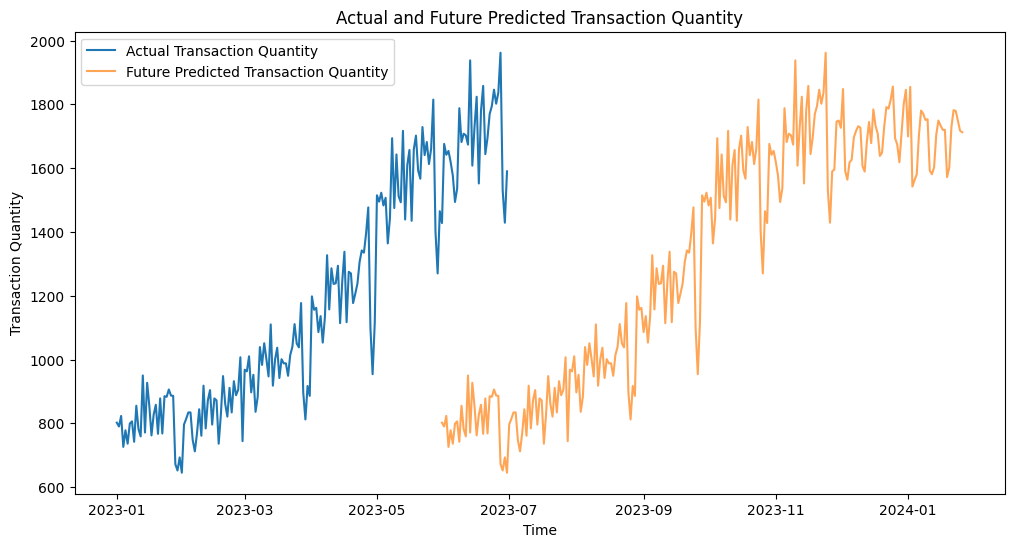

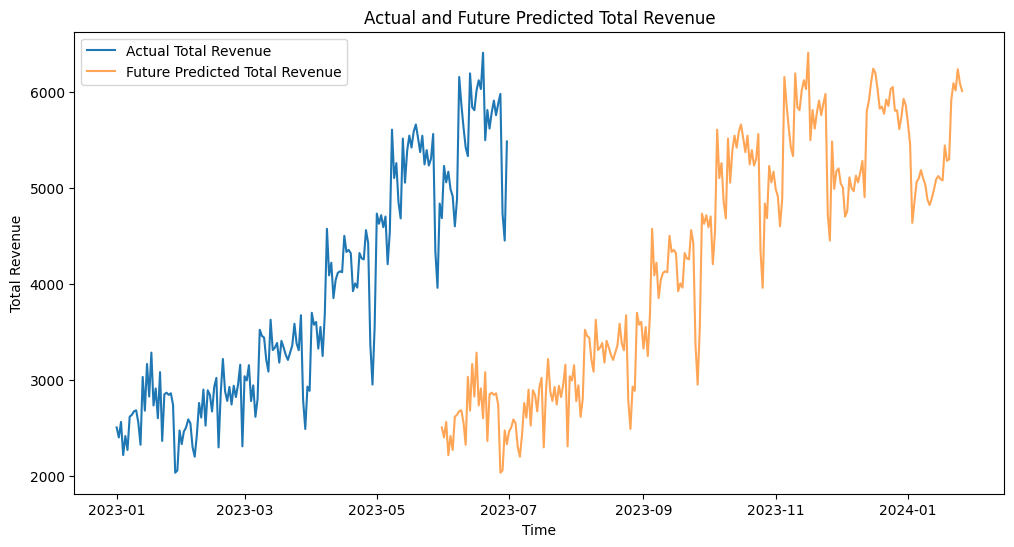

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Load the data and preprocess as before
df = pd.DataFrame(data)  # Assuming 'data' is your dataset
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str), errors='coerce')
df = df.dropna(subset=['transaction_datetime'])
df.set_index('transaction_datetime', inplace=True)
df['total_revenue'] = df['transaction_qty'] * df['unit_price']
daily_data = df[['transaction_qty', 'total_revenue']].resample('D').sum()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data)

# Prepare data for Gradient Boosting
seq_length = 30
X, y_qty, y_revenue = [], [], []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i + seq_length])
    y_qty.append(scaled_data[i + seq_length, 0])
    y_revenue.append(scaled_data[i + seq_length, 1])

X = np.array(X)
y_qty = np.array(y_qty)
y_revenue = np.array(y_revenue)

# Flatten the X data for Gradient Boosting
X_flat = X.reshape(X.shape[0], -1)

# Split the data into training and testing sets
X_train, X_test, y_qty_train, y_qty_test, y_revenue_train, y_revenue_test = train_test_split(X_flat, y_qty, y_revenue, test_size=0.2, random_state=42)

# Define and train the Gradient Boosting model for predicting quantity
model_qty = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model_qty.fit(X_train, y_qty_train)

# Predict using the trained quantity model
y_qty_pred = model_qty.predict(X_test)

# Define and train the Gradient Boosting model for predicting revenue
model_revenue = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model_revenue.fit(X_train, y_revenue_train)

# Predict using the trained revenue model
y_revenue_pred = model_revenue.predict(X_test)

# Inverse transform the predictions and actual values
y_qty_test_inverse = scaler.inverse_transform(np.column_stack((y_qty_test, np.zeros_like(y_qty_test))))[:, 0]
y_qty_pred_inverse = scaler.inverse_transform(np.column_stack((y_qty_pred, np.zeros_like(y_qty_pred))))[:, 0]
y_revenue_test_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_test), y_revenue_test)))[:, 1]
y_revenue_pred_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_pred), y_revenue_pred)))[:, 1]

# Calculate the mean squared error
mse_qty = mean_squared_error(y_qty_test_inverse, y_qty_pred_inverse)
mse_revenue = mean_squared_error(y_revenue_test_inverse, y_revenue_pred_inverse)
print(f'Mean Squared Error (Quantity): {mse_qty}')
print(f'Mean Squared Error (Revenue): {mse_revenue}')

# Predict future values for both quantity and revenue
future_steps = 60
last_sequence = scaled_data[-seq_length:]
future_predictions_qty = []
future_predictions_revenue = []

for _ in range(future_steps):
    last_sequence_flat = last_sequence.reshape(1, -1)
    
    # Predict next day's quantity and revenue
    next_qty = model_qty.predict(last_sequence_flat)[0]
    next_revenue = model_revenue.predict(last_sequence_flat)[0]
    
    # Append the predictions to the future predictions lists
    future_predictions_qty.append(next_qty)
    future_predictions_revenue.append(next_revenue)
    
    # Update the sequence by removing the oldest value and adding the new predictions
    next_values = np.array([next_qty, next_revenue]).reshape(1, -1)
    last_sequence = np.append(last_sequence[1:], next_values, axis=0)

# Inverse transform the future predictions
future_predictions_inverse = scaler.inverse_transform(np.array([future_predictions_qty, future_predictions_revenue]).T)
future_predictions_qty_inverse = future_predictions_inverse[:, 0]
future_predictions_revenue_inverse = future_predictions_inverse[:, 1]

# Combine the indices for plotting
historical_length = len(daily_data)
combined_index = pd.date_range(start=daily_data.index[-len(y_qty_test_inverse)], periods=historical_length + future_steps)

# Combine the actual, predicted, and future predicted values into a single series
combined_qty = np.concatenate([daily_data['transaction_qty'].values, future_predictions_qty_inverse])
combined_revenue = np.concatenate([daily_data['total_revenue'].values, future_predictions_revenue_inverse])

# Plot the actual, predicted, and future predicted values for transaction quantity
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Actual Transaction Quantity')
plt.plot(combined_index, combined_qty, label='Future Predicted Transaction Quantity', alpha=0.7)
plt.title('Actual and Future Predicted Transaction Quantity')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.savefig('D:/GradientBoos_Quantity.png')
plt.show()

# Plot the actual, predicted, and future predicted values for total revenue
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Actual Total Revenue')
plt.plot(combined_index, combined_revenue, label='Future Predicted Total Revenue', alpha=0.7)
plt.title('Actual and Future Predicted Total Revenue')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
plt.savefig('D:/GradientBoos_Total_revenew.png')
plt.show()


C:\Users\Abdul Majid\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Abdul Majid\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Squared Error (Quantity): 23659.356692695408
Root Mean Squared Error (Quantity): 153.81598321596948
Mean Squared Error (Revenue): 672838.6773764688
Root Mean Squared Error (Revenue): 820.2674425920297


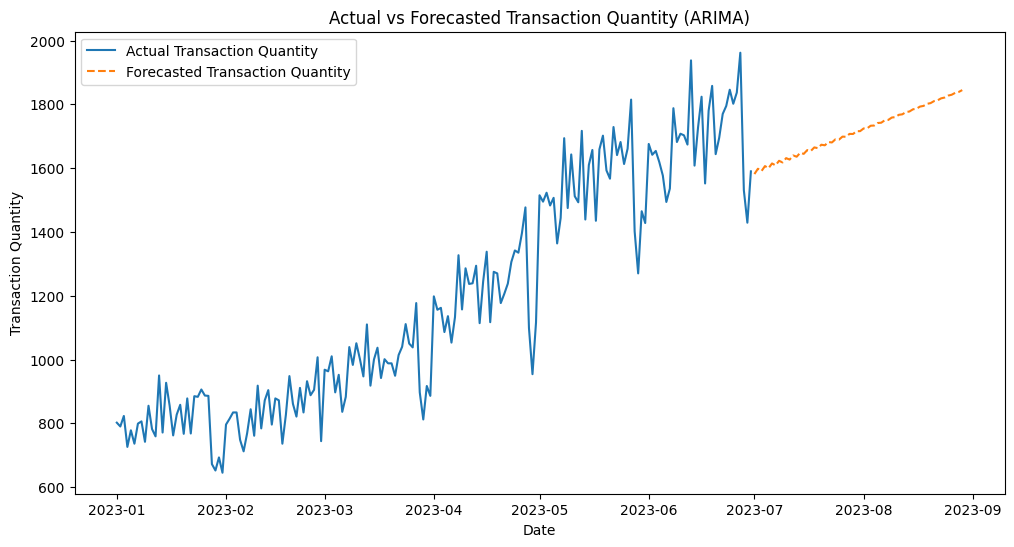

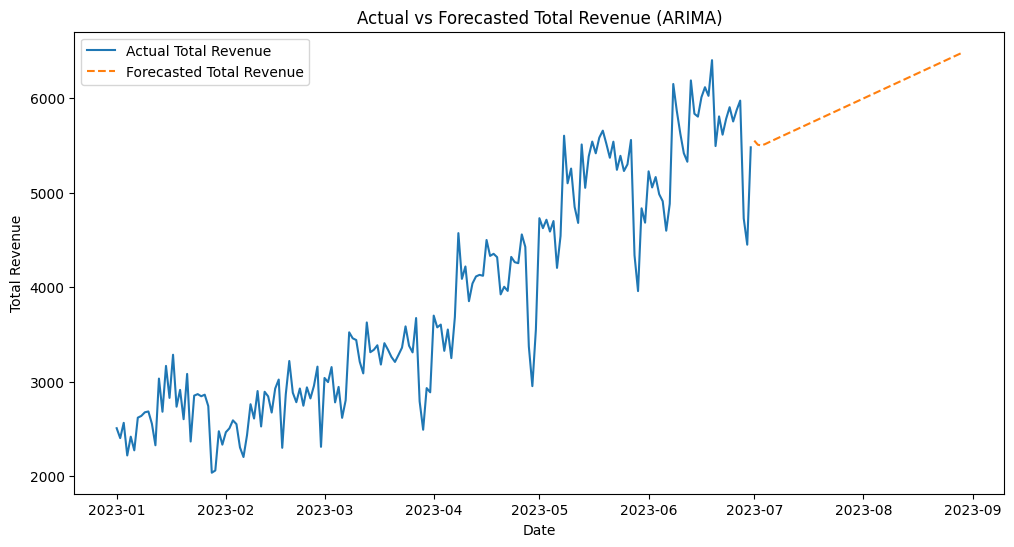

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Load the data (assuming 'data' is your dataset)
df = pd.DataFrame(data)

# Combine 'transaction_date' and 'transaction_time' into a single datetime column
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str), errors='coerce')

# Drop rows with invalid 'transaction_datetime'
df = df.dropna(subset=['transaction_datetime'])

# Set 'transaction_datetime' as index
df.set_index('transaction_datetime', inplace=True)

# Calculate 'total_revenue'
df['total_revenue'] = df['transaction_qty'] * df['unit_price']

# Resample and sum by day, selecting only the relevant numeric columns
numeric_columns = ['transaction_qty', 'total_revenue']
daily_data = df[numeric_columns].resample('D').sum()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data)

# Train ARIMA model for transaction quantity
order_qty = (1, 2, 2)  # Example order for ARIMA
arima_qty = ARIMA(daily_data['transaction_qty'], order=order_qty).fit()

# Train ARIMA model for total revenue
order_revenue = (2, 2, 2)  # Example order for ARIMA
arima_revenue = ARIMA(daily_data['total_revenue'], order=order_revenue).fit()

# Forecast future steps (e.g., 60 days)
future_steps = 60
future_qty_arima = arima_qty.forecast(steps=future_steps)
future_revenue_arima = arima_revenue.forecast(steps=future_steps)

# Calculate MSE and RMSE for ARIMA forecasted values
y_qty_true = daily_data['transaction_qty'][-future_steps:]
y_revenue_true = daily_data['total_revenue'][-future_steps:]

mse_qty = mean_squared_error(y_qty_true, future_qty_arima)
rmse_qty = np.sqrt(mse_qty)

mse_revenue = mean_squared_error(y_revenue_true, future_revenue_arima)
rmse_revenue = np.sqrt(mse_revenue)

print(f'Mean Squared Error (Quantity): {mse_qty}')
print(f'Root Mean Squared Error (Quantity): {rmse_qty}')

print(f'Mean Squared Error (Revenue): {mse_revenue}')
print(f'Root Mean Squared Error (Revenue): {rmse_revenue}')

# Plotting example: Replace with your specific plotting code as needed
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Actual Transaction Quantity')
plt.plot(future_qty_arima.index, future_qty_arima, label='Forecasted Transaction Quantity', linestyle='--')
plt.title('Actual vs Forecasted Transaction Quantity (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.savefig('D:/ARIMA_quantity.png')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Actual Total Revenue')
plt.plot(future_revenue_arima.index, future_revenue_arima, label='Forecasted Total Revenue', linestyle='--')
plt.title('Actual vs Forecasted Total Revenue (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend()
plt.savefig('D:/ARIMA_total_revenue.png')
plt.show()


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the data and preprocess as before
df = pd.DataFrame(data)  # Assuming 'data' is your dataset
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str), errors='coerce')
df = df.dropna(subset=['transaction_datetime'])
df.set_index('transaction_datetime', inplace=True)
df['total_revenue'] = df['transaction_qty'] * df['unit_price']
daily_data = df[['transaction_qty', 'total_revenue']].resample('D').sum()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data)

# Prepare data for Linear Regression
X = np.arange(len(scaled_data)).reshape(-1, 1)
y_qty = scaled_data[:, 0]
y_revenue = scaled_data[:, 1]

# Split the data into training and testing sets
X_train, X_test, y_qty_train, y_qty_test, y_revenue_train, y_revenue_test = train_test_split(X, y_qty, y_revenue, test_size=0.2, random_state=42)

# Define Gradient Descent function
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m = len(y)
    theta = np.zeros(X.shape[1] + 1)
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term
    for epoch in range(epochs):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= learning_rate * gradients
    return theta

# Train the model for quantity prediction
theta_qty = gradient_descent(X_train, y_qty_train)

# Train the model for revenue prediction
theta_revenue = gradient_descent(X_train, y_revenue_train)

# Predict using the trained quantity model
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]  # Add bias term
y_qty_pred = X_test_b.dot(theta_qty)
y_revenue_pred = X_test_b.dot(theta_revenue)

# Inverse transform the predictions and actual values
y_qty_test_inverse = scaler.inverse_transform(np.column_stack((y_qty_test, np.zeros_like(y_qty_test))))[:, 0]
y_qty_pred_inverse = scaler.inverse_transform(np.column_stack((y_qty_pred, np.zeros_like(y_qty_pred))))[:, 0]
y_revenue_test_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_test), y_revenue_test)))[:, 1]
y_revenue_pred_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_pred), y_revenue_pred)))[:, 1]

# Calculate the mean squared error
mse_qty = mean_squared_error(y_qty_test_inverse, y_qty_pred_inverse)
mse_revenue = mean_squared_error(y_revenue_test_inverse, y_revenue_pred_inverse)
print(f'Mean Squared Error (Quantity): {mse_qty}')
print(f'Mean Squared Error (Revenue): {mse_revenue}')

# Predict future values for both quantity and revenue
future_steps = 60
future_indices = np.arange(len(X), len(X) + future_steps).reshape(-1, 1)
future_indices_b = np.c_[np.ones((len(future_indices), 1)), future_indices]

future_qty_pred = future_indices_b.dot(theta_qty)
future_revenue_pred = future_indices_b.dot(theta_revenue)

# Inverse transform the future predictions
future_qty_pred_inverse = scaler.inverse_transform(np.column_stack((future_qty_pred, np.zeros_like(future_qty_pred))))[:, 0]
future_revenue_pred_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(future_revenue_pred), future_revenue_pred)))[:, 1]

# Combine the indices for plotting
historical_length = len(daily_data)
combined_index = pd.date_range(start=daily_data.index[0], periods=historical_length + future_steps)

# Combine the actual, predicted, and future predicted values into a single series
combined_qty = np.concatenate([daily_data['transaction_qty'].values, future_qty_pred_inverse])
combined_revenue = np.concatenate([daily_data['total_revenue'].values, future_revenue_pred_inverse])

# Plot the actual, predicted, and future predicted values for transaction quantity
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Actual Transaction Quantity')
plt.plot(combined_index, combined_qty, label='Future Predicted Transaction Quantity', alpha=0.7)
plt.title('Actual and Future Predicted Transaction Quantity (Linear Regression)')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.show()

# Plot the actual, predicted, and future predicted values for total revenue
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Actual Total Revenue')
plt.plot(combined_index, combined_revenue, label='Future Predicted Total Revenue', alpha=0.7)
plt.title('Actual and Future Predicted Total Revenue (Linear Regression)')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()


ValueError: Input contains NaN.

Mean Squared Error (Quantity): 14270.794470967741
Mean Squared Error (Revenue): 123914.90701396237


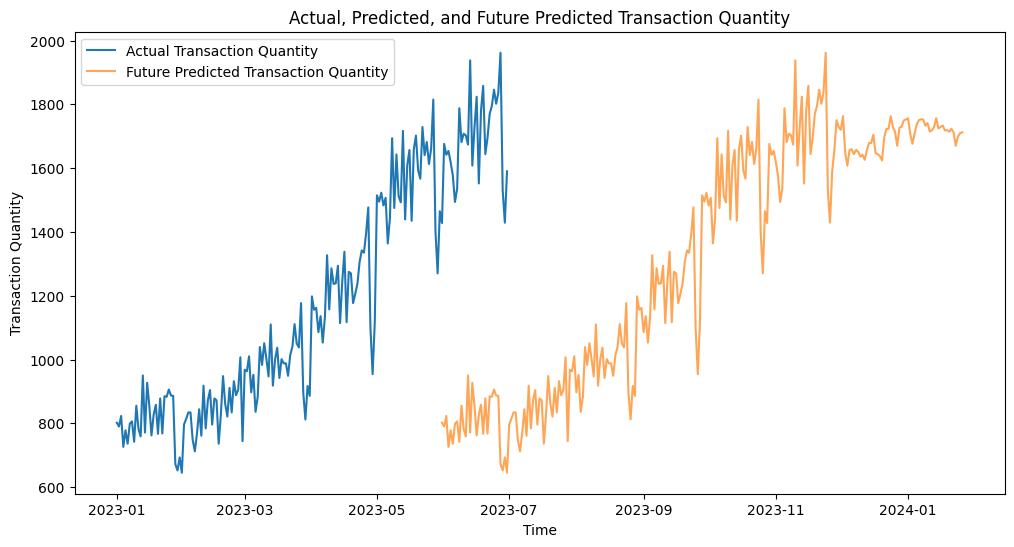

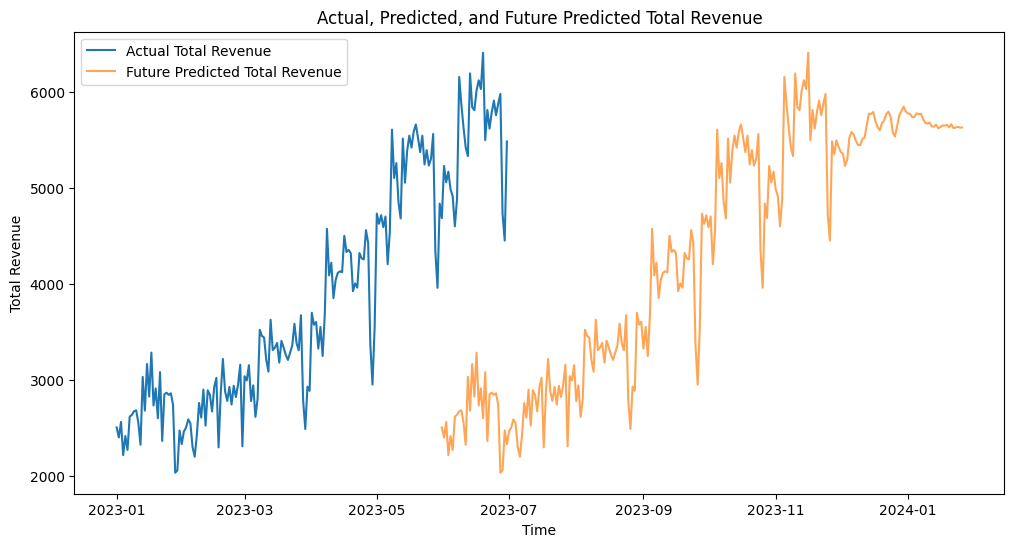

Mean Squared Error (Quantity) - Linear Regression: 10957.054033727052
Mean Squared Error (Revenue) - Linear Regression: 108776.58186677998


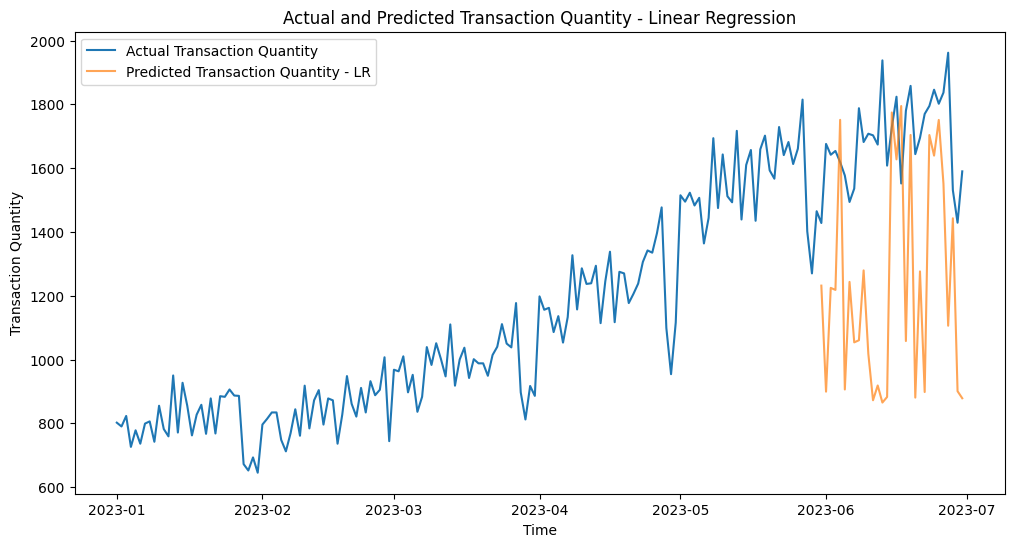

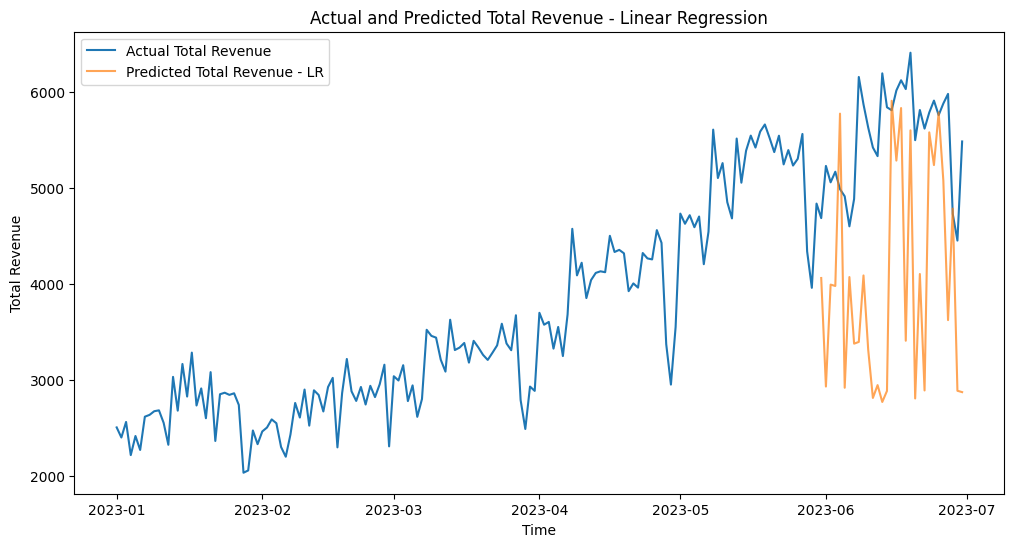

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the data
df = pd.DataFrame(data)

# Combine 'transaction_date' and 'transaction_time' into a single datetime column
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str), errors='coerce')

# Drop rows with invalid 'transaction_datetime'
df = df.dropna(subset=['transaction_datetime'])

# Set 'transaction_datetime' as index
df.set_index('transaction_datetime', inplace=True)

# Calculate 'total_revenue'
df['total_revenue'] = df['transaction_qty'] * df['unit_price']

# Resample and sum by day, selecting only the relevant numeric columns
numeric_columns = ['transaction_qty', 'total_revenue']
daily_data = df[numeric_columns].resample('D').sum()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data)

# Create features and labels
seq_length = 30  # Sequence length of 30 days
X = []
y_qty = []
y_revenue = []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i + seq_length])
    y_qty.append(scaled_data[i + seq_length, 0])
    y_revenue.append(scaled_data[i + seq_length, 1])

X = np.array(X)
y_qty = np.array(y_qty)
y_revenue = np.array(y_revenue)

# Split the data into training and testing sets
X_train, X_test, y_qty_train, y_qty_test, y_revenue_train, y_revenue_test = train_test_split(X, y_qty, y_revenue, test_size=0.2, random_state=42)

# Reshape the data to 2D for Random Forest input
X_train_reshaped = X_train.reshape((X_train.shape[0], -1))
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))

# Train Random Forest Regressor for transaction quantity
rf_qty = RandomForestRegressor(n_estimators=100, random_state=42)
rf_qty.fit(X_train_reshaped, y_qty_train)

# Train Random Forest Regressor for total revenue
rf_revenue = RandomForestRegressor(n_estimators=100, random_state=42)
rf_revenue.fit(X_train_reshaped, y_revenue_train)

# Make predictions
y_qty_pred = rf_qty.predict(X_test_reshaped)
y_revenue_pred = rf_revenue.predict(X_test_reshaped)

# Inverse transform the predictions and actual values
y_qty_test_inverse = scaler.inverse_transform(np.column_stack((y_qty_test, np.zeros_like(y_qty_test))))[:, 0]
y_revenue_test_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_test), y_revenue_test)))[:, 1]
y_qty_pred_inverse = scaler.inverse_transform(np.column_stack((y_qty_pred, np.zeros_like(y_qty_pred))))[:, 0]
y_revenue_pred_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_pred), y_revenue_pred)))[:, 1]

# Calculate the mean squared error
mse_qty = mean_squared_error(y_qty_test_inverse, y_qty_pred_inverse)
mse_revenue = mean_squared_error(y_revenue_test_inverse, y_revenue_pred_inverse)
print(f'Mean Squared Error (Quantity): {mse_qty}')
print(f'Mean Squared Error (Revenue): {mse_revenue}')

# Predict two months into the future
future_steps = 60  # Predicting 60 days into the future
last_sequence = scaled_data[-seq_length:]  # Start with the last available sequence

future_predictions_qty = []
future_predictions_revenue = []

for _ in range(future_steps):
    last_sequence_reshaped = last_sequence.reshape((1, -1))
    
    # Predict next day's transaction quantity and total revenue
    next_qty = rf_qty.predict(last_sequence_reshaped)[0]
    next_revenue = rf_revenue.predict(last_sequence_reshaped)[0]
    
    # Append the predictions to the future predictions list
    future_predictions_qty.append(next_qty)
    future_predictions_revenue.append(next_revenue)
    
    # Update the sequence by removing the oldest value and adding the new predictions
    next_values = np.array([next_qty, next_revenue]).reshape(1, -1)
    last_sequence = np.append(last_sequence[1:], next_values, axis=0)

# Inverse transform the future predictions
future_predictions_qty_inverse = scaler.inverse_transform(np.column_stack((future_predictions_qty, np.zeros_like(future_predictions_qty))))[:, 0]
future_predictions_revenue_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(future_predictions_revenue), future_predictions_revenue)))[:, 1]

# Combine the indices for plotting
historical_length = len(daily_data)
combined_index = pd.date_range(start=daily_data.index[-len(y_qty_test_inverse)], periods=historical_length + future_steps)

# Combine the actual, predicted, and future predicted values into a single series
combined_qty = np.concatenate([daily_data['transaction_qty'].values, future_predictions_qty_inverse])
combined_revenue = np.concatenate([daily_data['total_revenue'].values, future_predictions_revenue_inverse])

# Plot the actual, predicted, and future predicted values for transaction quantity
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Actual Transaction Quantity')
plt.plot(combined_index, combined_qty, label='Future Predicted Transaction Quantity', alpha=0.7)
plt.title('Actual, Predicted, and Future Predicted Transaction Quantity')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.savefig('D:/Actual_and_Future_Predicted_Transaction_Quantity_random_forest.png')
plt.show()

# Plot the actual, predicted, and future predicted values for total revenue
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Actual Total Revenue')
plt.plot(combined_index, combined_revenue, label='Future Predicted Total Revenue', alpha=0.7)
plt.title('Actual, Predicted, and Future Predicted Total Revenue')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
plt.savefig('D:/Actual_and_Future_Predicted_Total_Revenue_random_forest.png')
plt.show()

# Linear Regression with Gradient Descent
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train Linear Regression for transaction quantity
lr_qty = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)
lr_qty.fit(X_train_reshaped, y_qty_train)

# Train Linear Regression for total revenue
lr_revenue = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)
lr_revenue.fit(X_train_reshaped, y_revenue_train)

# Make predictions
y_qty_pred_lr = lr_qty.predict(X_test_reshaped)
y_revenue_pred_lr = lr_revenue.predict(X_test_reshaped)

# Inverse transform the predictions and actual values
y_qty_pred_lr_inverse = scaler.inverse_transform(np.column_stack((y_qty_pred_lr, np.zeros_like(y_qty_pred_lr))))[:, 0]
y_revenue_pred_lr_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_pred_lr), y_revenue_pred_lr)))[:, 1]

# Calculate the mean squared error
mse_qty_lr = mean_squared_error(y_qty_test_inverse, y_qty_pred_lr_inverse)
mse_revenue_lr = mean_squared_error(y_revenue_test_inverse, y_revenue_pred_lr_inverse)
print(f'Mean Squared Error (Quantity) - Linear Regression: {mse_qty_lr}')
print(f'Mean Squared Error (Revenue) - Linear Regression: {mse_revenue_lr}')

# Plot the actual, predicted, and future predicted values for transaction quantity (Linear Regression)
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Actual Transaction Quantity')
plt.plot(daily_data.index[-len(y_qty_test_inverse):], y_qty_pred_lr_inverse, label='Predicted Transaction Quantity - LR', alpha=0.7)
plt.title('Actual and Predicted Transaction Quantity - Linear Regression')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.savefig('D:/Actual_and_Predicted_Transaction_Quantity_linear_regression.png')
plt.show()

# Plot the actual, predicted, and future predicted values for total revenue (Linear Regression)
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Actual Total Revenue')
plt.plot(daily_data.index[-len(y_revenue_test_inverse):], y_revenue_pred_lr_inverse, label='Predicted Total Revenue - LR', alpha=0.7)
plt.title('Actual and Predicted Total Revenue - Linear Regression')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
plt.savefig('D:/Actual_and_Predicted_Total_Revenue_linear_regression.png')
plt.show()


Mean Squared Error (Quantity) - Linear Regression: 10957.054033727052
Mean Squared Error (Revenue) - Linear Regression: 108776.58186677998


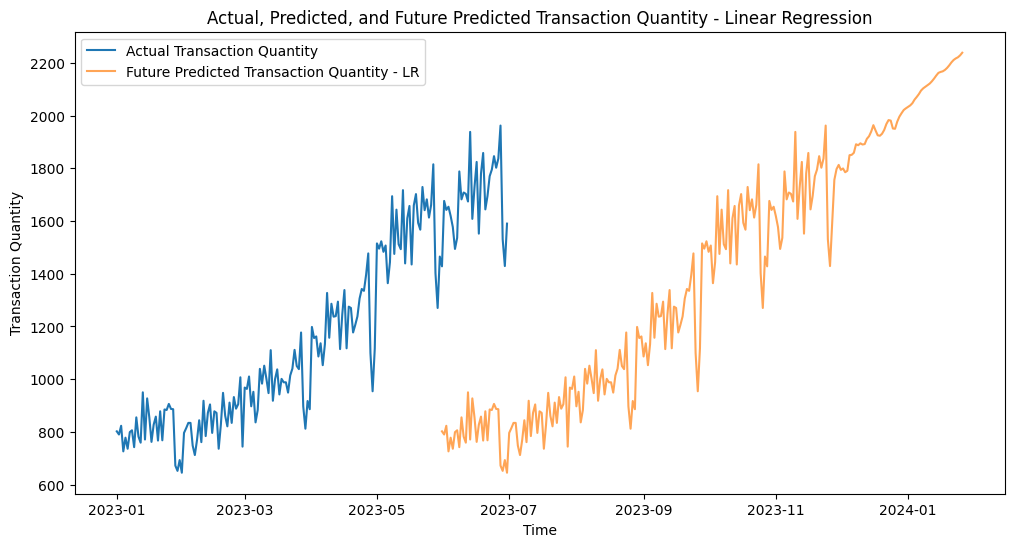

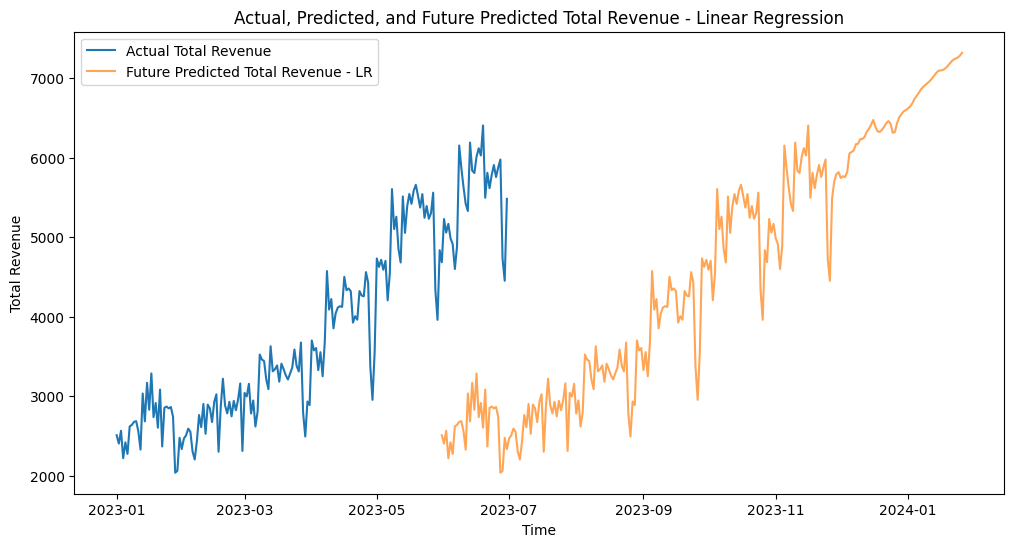

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming 'data' is a dictionary or a similar structure containing your data
df = pd.DataFrame(data)

# Combine 'transaction_date' and 'transaction_time' into a single datetime column
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str), errors='coerce')

# Drop rows with invalid 'transaction_datetime'
df = df.dropna(subset=['transaction_datetime'])

# Set 'transaction_datetime' as index
df.set_index('transaction_datetime', inplace=True)

# Calculate 'total_revenue'
df['total_revenue'] = df['transaction_qty'] * df['unit_price']

# Resample and sum by day, selecting only the relevant numeric columns
numeric_columns = ['transaction_qty', 'total_revenue']
daily_data = df[numeric_columns].resample('D').sum()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data)

# Create features and labels
seq_length = 30  # Sequence length of 30 days
X = []
y_qty = []
y_revenue = []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i + seq_length])
    y_qty.append(scaled_data[i + seq_length, 0])
    y_revenue.append(scaled_data[i + seq_length, 1])

X = np.array(X)
y_qty = np.array(y_qty)
y_revenue = np.array(y_revenue)

# Split the data into training and testing sets
X_train, X_test, y_qty_train, y_qty_test, y_revenue_train, y_revenue_test = train_test_split(X, y_qty, y_revenue, test_size=0.2, random_state=42)

# Reshape the data to 2D for Linear Regression input
X_train_reshaped = X_train.reshape((X_train.shape[0], -1))
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))

# Linear Regression with Gradient Descent
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train Linear Regression for transaction quantity
lr_qty = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)
lr_qty.fit(X_train_reshaped, y_qty_train)

# Train Linear Regression for total revenue
lr_revenue = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)
lr_revenue.fit(X_train_reshaped, y_revenue_train)

# Make predictions
y_qty_pred_lr = lr_qty.predict(X_test_reshaped)
y_revenue_pred_lr = lr_revenue.predict(X_test_reshaped)

# Inverse transform the predictions and actual values
y_qty_test_inverse = scaler.inverse_transform(np.column_stack((y_qty_test, np.zeros_like(y_qty_test))))[:, 0]
y_revenue_test_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_test), y_revenue_test)))[:, 1]
y_qty_pred_lr_inverse = scaler.inverse_transform(np.column_stack((y_qty_pred_lr, np.zeros_like(y_qty_pred_lr))))[:, 0]
y_revenue_pred_lr_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_pred_lr), y_revenue_pred_lr)))[:, 1]

# Calculate the mean squared error
mse_qty_lr = mean_squared_error(y_qty_test_inverse, y_qty_pred_lr_inverse)
mse_revenue_lr = mean_squared_error(y_revenue_test_inverse, y_revenue_pred_lr_inverse)
print(f'Mean Squared Error (Quantity) - Linear Regression: {mse_qty_lr}')
print(f'Mean Squared Error (Revenue) - Linear Regression: {mse_revenue_lr}')

# Predict two months into the future using the trained linear regression model
future_steps = 60  # Predicting 60 days into the future
last_sequence = scaled_data[-seq_length:]  # Start with the last available sequence

future_predictions_qty = []
future_predictions_revenue = []

for _ in range(future_steps):
    last_sequence_reshaped = last_sequence.reshape((1, -1))
    
    # Predict next day's transaction quantity and total revenue
    next_qty = lr_qty.predict(last_sequence_reshaped)[0]
    next_revenue = lr_revenue.predict(last_sequence_reshaped)[0]
    
    # Append the predictions to the future predictions list
    future_predictions_qty.append(next_qty)
    future_predictions_revenue.append(next_revenue)
    
    # Update the sequence by removing the oldest value and adding the new predictions
    next_values = np.array([next_qty, next_revenue]).reshape(1, -1)
    last_sequence = np.append(last_sequence[1:], next_values, axis=0)

# Inverse transform the future predictions
future_predictions_qty_inverse = scaler.inverse_transform(np.column_stack((future_predictions_qty, np.zeros_like(future_predictions_qty))))[:, 0]
future_predictions_revenue_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(future_predictions_revenue), future_predictions_revenue)))[:, 1]

# Combine the indices for plotting
historical_length = len(daily_data)
combined_index = pd.date_range(start=daily_data.index[-len(y_qty_test_inverse)], periods=historical_length + future_steps)

# Combine the actual, predicted, and future predicted values into a single series
combined_qty = np.concatenate([daily_data['transaction_qty'].values, future_predictions_qty_inverse])
combined_revenue = np.concatenate([daily_data['total_revenue'].values, future_predictions_revenue_inverse])

# Plot the actual, predicted, and future predicted values for transaction quantity (Linear Regression)
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Actual Transaction Quantity')
plt.plot(combined_index, combined_qty, label='Future Predicted Transaction Quantity - LR', alpha=0.7)
plt.title('Actual, Predicted, and Future Predicted Transaction Quantity - Linear Regression')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.savefig('D:/Actual_and_Future_Predicted_Transaction_Quantity_linear_regression.png')
plt.show()

# Plot the actual, predicted, and future predicted values for total revenue (Linear Regression)
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Actual Total Revenue')
plt.plot(combined_index, combined_revenue, label='Future Predicted Total Revenue - LR', alpha=0.7)
plt.title('Actual, Predicted, and Future Predicted Total Revenue - Linear Regression')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
plt.savefig('D:/Actual_and_Future_Predicted_Total_Revenue_linear_regression.png')
plt.show()


Mean Squared Error (Quantity) - Linear Regression: 10957.054033727052
Mean Squared Error (Revenue) - Linear Regression: 108776.58186677998
Root Mean Squared Error (Quantity) - Linear Regression: 104.67594773264321
Root Mean Squared Error (Revenue) - Linear Regression: 329.81294981668015


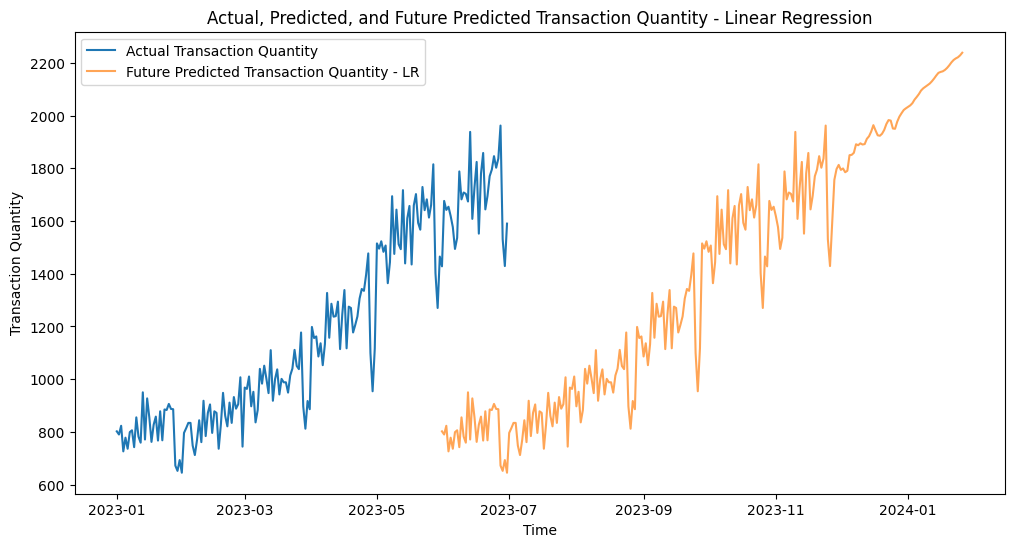

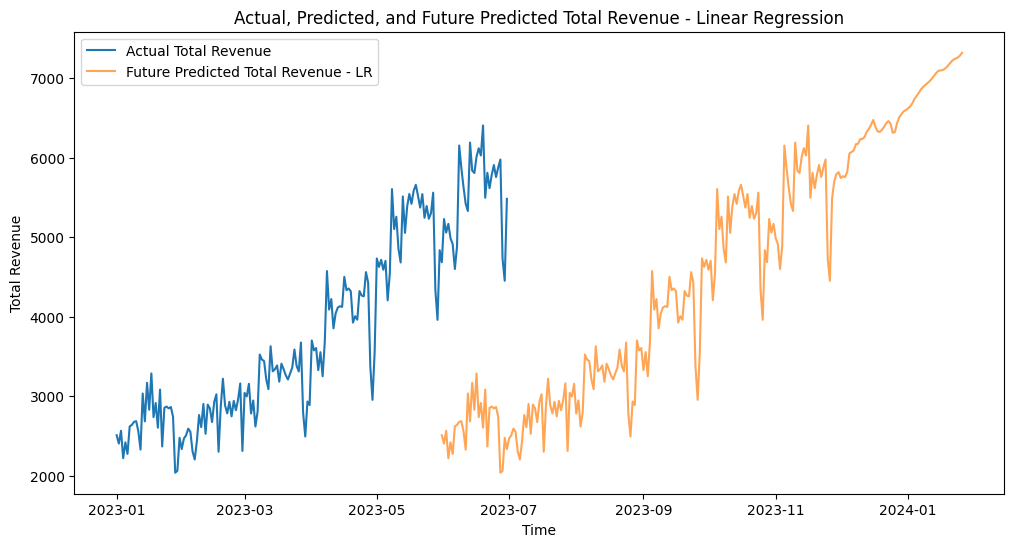

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming 'data' is a dictionary or a similar structure containing your data
df = pd.DataFrame(data)

# Combine 'transaction_date' and 'transaction_time' into a single datetime column
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str), errors='coerce')

# Drop rows with invalid 'transaction_datetime'
df = df.dropna(subset=['transaction_datetime'])

# Set 'transaction_datetime' as index
df.set_index('transaction_datetime', inplace=True)

# Calculate 'total_revenue'
df['total_revenue'] = df['transaction_qty'] * df['unit_price']

# Resample and sum by day, selecting only the relevant numeric columns
numeric_columns = ['transaction_qty', 'total_revenue']
daily_data = df[numeric_columns].resample('D').sum()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data)

# Create features and labels
seq_length = 30  # Sequence length of 30 days
X = []
y_qty = []
y_revenue = []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i + seq_length])
    y_qty.append(scaled_data[i + seq_length, 0])
    y_revenue.append(scaled_data[i + seq_length, 1])

X = np.array(X)
y_qty = np.array(y_qty)
y_revenue = np.array(y_revenue)

# Split the data into training and testing sets
X_train, X_test, y_qty_train, y_qty_test, y_revenue_train, y_revenue_test = train_test_split(X, y_qty, y_revenue, test_size=0.2, random_state=42)

# Reshape the data to 2D for Linear Regression input
X_train_reshaped = X_train.reshape((X_train.shape[0], -1))
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))

# Linear Regression with Gradient Descent
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train Linear Regression for transaction quantity
lr_qty = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)
lr_qty.fit(X_train_reshaped, y_qty_train)

# Train Linear Regression for total revenue
lr_revenue = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)
lr_revenue.fit(X_train_reshaped, y_revenue_train)

# Make predictions
y_qty_pred_lr = lr_qty.predict(X_test_reshaped)
y_revenue_pred_lr = lr_revenue.predict(X_test_reshaped)

# Inverse transform the predictions and actual values
y_qty_test_inverse = scaler.inverse_transform(np.column_stack((y_qty_test, np.zeros_like(y_qty_test))))[:, 0]
y_revenue_test_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_test), y_revenue_test)))[:, 1]
y_qty_pred_lr_inverse = scaler.inverse_transform(np.column_stack((y_qty_pred_lr, np.zeros_like(y_qty_pred_lr))))[:, 0]
y_revenue_pred_lr_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_pred_lr), y_revenue_pred_lr)))[:, 1]

# Calculate the mean squared error and root mean squared error
mse_qty_lr = mean_squared_error(y_qty_test_inverse, y_qty_pred_lr_inverse)
mse_revenue_lr = mean_squared_error(y_revenue_test_inverse, y_revenue_pred_lr_inverse)
rmse_qty_lr = np.sqrt(mse_qty_lr)
rmse_revenue_lr = np.sqrt(mse_revenue_lr)
print(f'Mean Squared Error (Quantity) - Linear Regression: {mse_qty_lr}')
print(f'Mean Squared Error (Revenue) - Linear Regression: {mse_revenue_lr}')
print(f'Root Mean Squared Error (Quantity) - Linear Regression: {rmse_qty_lr}')
print(f'Root Mean Squared Error (Revenue) - Linear Regression: {rmse_revenue_lr}')

# Predict two months into the future using the trained linear regression model
future_steps = 60  # Predicting 60 days into the future
last_sequence = scaled_data[-seq_length:]  # Start with the last available sequence

future_predictions_qty = []
future_predictions_revenue = []

for _ in range(future_steps):
    last_sequence_reshaped = last_sequence.reshape((1, -1))
    
    # Predict next day's transaction quantity and total revenue
    next_qty = lr_qty.predict(last_sequence_reshaped)[0]
    next_revenue = lr_revenue.predict(last_sequence_reshaped)[0]
    
    # Append the predictions to the future predictions list
    future_predictions_qty.append(next_qty)
    future_predictions_revenue.append(next_revenue)
    
    # Update the sequence by removing the oldest value and adding the new predictions
    next_values = np.array([next_qty, next_revenue]).reshape(1, -1)
    last_sequence = np.append(last_sequence[1:], next_values, axis=0)

# Inverse transform the future predictions
future_predictions_qty_inverse = scaler.inverse_transform(np.column_stack((future_predictions_qty, np.zeros_like(future_predictions_qty))))[:, 0]
future_predictions_revenue_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(future_predictions_revenue), future_predictions_revenue)))[:, 1]

# Combine the indices for plotting
historical_length = len(daily_data)
combined_index = pd.date_range(start=daily_data.index[-len(y_qty_test_inverse)], periods=historical_length + future_steps)

# Combine the actual, predicted, and future predicted values into a single series
combined_qty = np.concatenate([daily_data['transaction_qty'].values, future_predictions_qty_inverse])
combined_revenue = np.concatenate([daily_data['total_revenue'].values, future_predictions_revenue_inverse])

# Plot the actual, predicted, and future predicted values for transaction quantity (Linear Regression)
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Actual Transaction Quantity')
plt.plot(combined_index, combined_qty, label='Future Predicted Transaction Quantity - LR', alpha=0.7)
plt.title('Actual, Predicted, and Future Predicted Transaction Quantity - Linear Regression')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.savefig('D:/Actual_and_Future_Predicted_Transaction_Quantity_linear_regression.png')
plt.show()

# Plot the actual, predicted, and future predicted values for total revenue (Linear Regression)
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Actual Total Revenue')
plt.plot(combined_index, combined_revenue, label='Future Predicted Total Revenue - LR', alpha=0.7)
plt.title('Actual, Predicted, and Future Predicted Total Revenue - Linear Regression')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
plt.savefig('D:/Actual_and_Future_Predicted_Total_Revenue_linear_regression.png')
plt.show()


C:\Users\Abdul Majid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - loss: 0.3562 - val_loss: 0.2432
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2082 - val_loss: 0.1338
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1128 - val_loss: 0.0495
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0408 - val_loss: 0.0058
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0181 - val_loss: 0.0223
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0288 - val_loss: 0.0077
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0131 - val_loss: 0.0070
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0109 - val_loss: 0.0109
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0141 - val_loss: 0.0109
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0109 - val_loss: 0.0089
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0118 - val_loss: 0.0066
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0100 - val_l

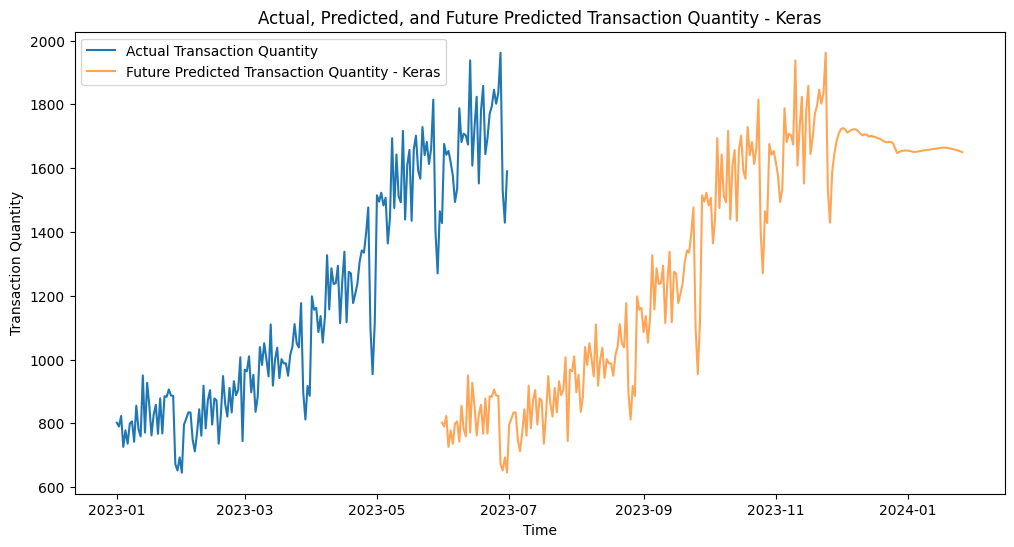

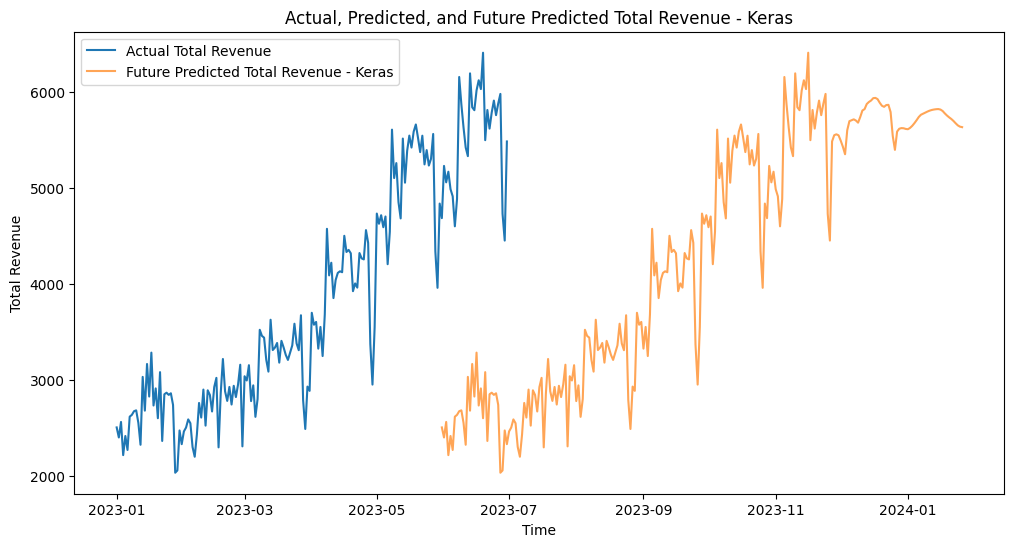

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Assuming 'data' is a dictionary or a similar structure containing your data
df = pd.DataFrame(data)

# Combine 'transaction_date' and 'transaction_time' into a single datetime column
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str), errors='coerce')

# Drop rows with invalid 'transaction_datetime'
df = df.dropna(subset=['transaction_datetime'])

# Set 'transaction_datetime' as index
df.set_index('transaction_datetime', inplace=True)

# Calculate 'total_revenue'
df['total_revenue'] = df['transaction_qty'] * df['unit_price']

# Resample and sum by day, selecting only the relevant numeric columns
numeric_columns = ['transaction_qty', 'total_revenue']
daily_data = df[numeric_columns].resample('D').sum()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data)

# Create features and labels
seq_length = 30  # Sequence length of 30 days
X = []
y_qty = []
y_revenue = []
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i + seq_length])
    y_qty.append(scaled_data[i + seq_length, 0])
    y_revenue.append(scaled_data[i + seq_length, 1])

X = np.array(X)
y_qty = np.array(y_qty)
y_revenue = np.array(y_revenue)

# Split the data into training and testing sets
X_train, X_test, y_qty_train, y_qty_test, y_revenue_train, y_revenue_test = train_test_split(X, y_qty, y_revenue, test_size=0.2, random_state=42)

# Build the LSTM model for transaction quantity
model_qty = Sequential()
model_qty.add(LSTM(50, activation='relu', input_shape=(seq_length, X.shape[2])))
model_qty.add(Dense(1))
model_qty.compile(optimizer='adam', loss='mse')

# Build the LSTM model for total revenue
model_revenue = Sequential()
model_revenue.add(LSTM(50, activation='relu', input_shape=(seq_length, X.shape[2])))
model_revenue.add(Dense(1))
model_revenue.compile(optimizer='adam', loss='mse')

# Train the models
model_qty.fit(X_train, y_qty_train, epochs=500, batch_size=32, validation_data=(X_test, y_qty_test))
model_revenue.fit(X_train, y_revenue_train, epochs=500, batch_size=32, validation_data=(X_test, y_revenue_test))

# Make predictions
y_qty_pred_keras = model_qty.predict(X_test)
y_revenue_pred_keras = model_revenue.predict(X_test)

# Inverse transform the predictions and actual values
y_qty_test_inverse = scaler.inverse_transform(np.column_stack((y_qty_test, np.zeros_like(y_qty_test))))[:, 0]
y_revenue_test_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_test), y_revenue_test)))[:, 1]
y_qty_pred_keras_inverse = scaler.inverse_transform(np.column_stack((y_qty_pred_keras, np.zeros_like(y_qty_pred_keras))))[:, 0]
y_revenue_pred_keras_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(y_revenue_pred_keras), y_revenue_pred_keras)))[:, 1]

# Calculate the mean squared error
mse_qty_keras = mean_squared_error(y_qty_test_inverse, y_qty_pred_keras_inverse)
mse_revenue_keras = mean_squared_error(y_revenue_test_inverse, y_revenue_pred_keras_inverse)
print(f'Mean Squared Error (Quantity) - Keras: {mse_qty_keras}')
print(f'Mean Squared Error (Revenue) - Keras: {mse_revenue_keras}')

# Predict two months into the future using the trained LSTM models
future_steps = 60  # Predicting 60 days into the future
last_sequence = scaled_data[-seq_length:]  # Start with the last available sequence

future_predictions_qty = []
future_predictions_revenue = []

for _ in range(future_steps):
    last_sequence_reshaped = last_sequence.reshape((1, seq_length, -1))
    
    # Predict next day's transaction quantity and total revenue
    next_qty = model_qty.predict(last_sequence_reshaped)[0]
    next_revenue = model_revenue.predict(last_sequence_reshaped)[0]
    
    # Append the predictions to the future predictions list
    future_predictions_qty.append(next_qty)
    future_predictions_revenue.append(next_revenue)
    
    # Update the sequence by removing the oldest value and adding the new predictions
    next_values = np.array([next_qty, next_revenue]).reshape(1, -1)
    last_sequence = np.append(last_sequence[1:], next_values, axis=0)

# Inverse transform the future predictions
future_predictions_qty_inverse = scaler.inverse_transform(np.column_stack((future_predictions_qty, np.zeros_like(future_predictions_qty))))[:, 0]
future_predictions_revenue_inverse = scaler.inverse_transform(np.column_stack((np.zeros_like(future_predictions_revenue), future_predictions_revenue)))[:, 1]

# Combine the indices for plotting
historical_length = len(daily_data)
combined_index = pd.date_range(start=daily_data.index[-len(y_qty_test_inverse)], periods=historical_length + future_steps)

# Combine the actual, predicted, and future predicted values into a single series
combined_qty = np.concatenate([daily_data['transaction_qty'].values, future_predictions_qty_inverse])
combined_revenue = np.concatenate([daily_data['total_revenue'].values, future_predictions_revenue_inverse])

# Plot the actual, predicted, and future predicted values for transaction quantity (Keras)
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['transaction_qty'], label='Actual Transaction Quantity')
plt.plot(combined_index, combined_qty, label='Future Predicted Transaction Quantity - Keras', alpha=0.7)
plt.title('Actual, Predicted, and Future Predicted Transaction Quantity - Keras')
plt.xlabel('Time')
plt.ylabel('Transaction Quantity')
plt.legend()
plt.savefig('D:/Actual_and_Future_Predicted_Transaction_Quantity_keras.png')
plt.show()

# Plot the actual, predicted, and future predicted values for total revenue (Keras)
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_revenue'], label='Actual Total Revenue')
plt.plot(combined_index, combined_revenue, label='Future Predicted Total Revenue - Keras', alpha=0.7)
plt.title('Actual, Predicted, and Future Predicted Total Revenue - Keras')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.legend()
plt.savefig('D:/Actual_and_Future_Predicted_Total_Revenue_keras.png')
plt.show()
